## ICU SEPSIS MONITORING PROJECT

Royal Melbourne Institue of Technology - Vietnam Saigon South Campus
<br>COSC2753 Machine Learning
<br>Nguyen Ngoc Luong - S3927460 


---
## PROBLEM OVERVIEW
<b>Intensive Care Units (ICUs) have long faced the challenge of monitoring patients for the development of sepsis.</b>

<ul>
    <li>ICUs must monitor patients for the risk of sepsis, a severe infection that can occur during ICU stays.</li><br>
    <li>The COVID-19 pandemic has increased the significance of sepsis monitoring in ICUs.</li>
</ul> 

<b>Therefore, the aim of this project is to develop a reliable model to aid the ICUs in their efford of monitoring patients during their stay to achieve the following:</b>

<ul>
    <li>Early prediction of sepsis development in ICU patients can significantly reduce health complications and optimize ICU resources, including bed availability.</li><br>
    <li>The ability to predict sepsis in ICU patients has significant benefits for both patient outcomes and resource management.</li><br>
    <li>Sepsis monitoring is a crucial aspect of ICU care, and early intervention can save lives and improve outcomes.</li>
</ul>

---
## MODULE IMPORT

Importing all modules used for this project.

In [2]:
import sklearn as sk
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# mute warning
warnings.filterwarnings('ignore')

## I - EXPLORATORY DATA ANALYSIS (EDA)
---

### Abbreviation Index
The value below represent 11 columns in the dataset, abbreviation definition are gathered from the provided README.md file.
<ul>
    <li>ID - Unique number to represent patient ID</li>
    <li>PRG - Plasma Glucose</li>
    <li>PL - Blood Work Result-1 (mu U/ml)</li>
    <li>PR - Blood Pressure (mm Hg)</li>
    <li>SK - Blood Work Result-2 (mm)</li>
    <li>TS - Blood Work Result-3 (mu U/ml)</li>
    <li>M11 - Body mass index (weight in kg/(height in m)^2</li>
    <li>PD2 - Blood Work Result-4 (mu U/ml)</li>
    <li>Age - patients age (years)</li>
    <li>Insurance - If a patient holds a valid insurance card</li>
    <li>Sepssis (value being predicted) - Positive: if a patient in ICU will develop a sepsis, and Negative: otherwise</li>
</ul>

---
### Read and convert csv files
Importing data from csv using "read_csv".

In [3]:
# Importing data
patient_train_df = pd.read_csv("Paitients_Files_Train.csv")

### Training data analysis

In [4]:
# Print data.
patient_train_df.head(10)
# The following table display sepsis information for patients.

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
5  ICU200015    5  116  74   0    0  25.6  0.201   30          1  Negative
6  ICU200016    3   78  50  32   88  31.0  0.248   26          0  Positive
7  ICU200017   10  115   0   0    0  35.3  0.134   29          1  Negative
8  ICU200018    2  197  70  45  543  30.5  0.158   53          1  Positive
9  ICU200019    8  125  96   0    0   0.0  0.232   54          1  Positive

In [5]:
# Columns and their data types.
patient_train_df.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [6]:
# Throughout checking of the dataframe for invalid datatypes.
patient_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


We can observe that the "Sepsis" column is currently an object datatype, machine learning models require numerical data to train on so thus the data will need to be preporcessed.

---
### Data preprocessing

The preprocessing process is to convert raw data into a format suitable for analysis or machine learning. In our case, the value in Sepsis is curretly an object, we will need to convert it to integer for processing.<br>

We will encode our data value for **Possitive** as **1** and **Negative** as **0**

In [7]:
# Encode data in Sepssis column
patient_train_df.replace(to_replace={'Sepssis':'Negative'}, value=0, inplace=True)
patient_train_df.replace(to_replace={'Sepssis':'Positive'}, value=1, inplace=True)

# Print data
patient_train_df.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0        1
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0        0
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1        1
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1        0
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1        1
5  ICU200015    5  116  74   0    0  25.6  0.201   30          1        0
6  ICU200016    3   78  50  32   88  31.0  0.248   26          0        1
7  ICU200017   10  115   0   0    0  35.3  0.134   29          1        0
8  ICU200018    2  197  70  45  543  30.5  0.158   53          1        1
9  ICU200019    8  125  96   0    0   0.0  0.232   54          1        1

---
Next we will need to drop **ID** and **Insurance** sunce they do not provide anything significant as a patient's ID and insurance policy have no relation with how they caught Sepsis.

In [8]:
# Removing ID and Insurance from our dataframes
patient_train_df.drop(labels=['ID', 'Insurance'], axis=1, inplace=True)

# Print data
patient_train_df.head(10)

PRG   PL  PR  SK   TS   M11    BD2  Age  Sepssis
0    6  148  72  35    0  33.6  0.627   50        1
1    1   85  66  29    0  26.6  0.351   31        0
2    8  183  64   0    0  23.3  0.672   32        1
3    1   89  66  23   94  28.1  0.167   21        0
4    0  137  40  35  168  43.1  2.288   33        1
5    5  116  74   0    0  25.6  0.201   30        0
6    3   78  50  32   88  31.0  0.248   26        1
7   10  115   0   0    0  35.3  0.134   29        0
8    2  197  70  45  543  30.5  0.158   53        1
9    8  125  96   0    0   0.0  0.232   54        1

In [114]:
# Descriptive statistics
patient_train_df.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age     Sepssis  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.347245  
std      0.337552   11.828446    0.476492  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    0.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

---
### Data visualisation

**1) Histograms**

Using histograms, we can present the skewness of each data. The **x-axis** is the range of our value, while the **y-axis** represent the frequency of the plotted value.

<Figure size 1920x1440 with 0 Axes>

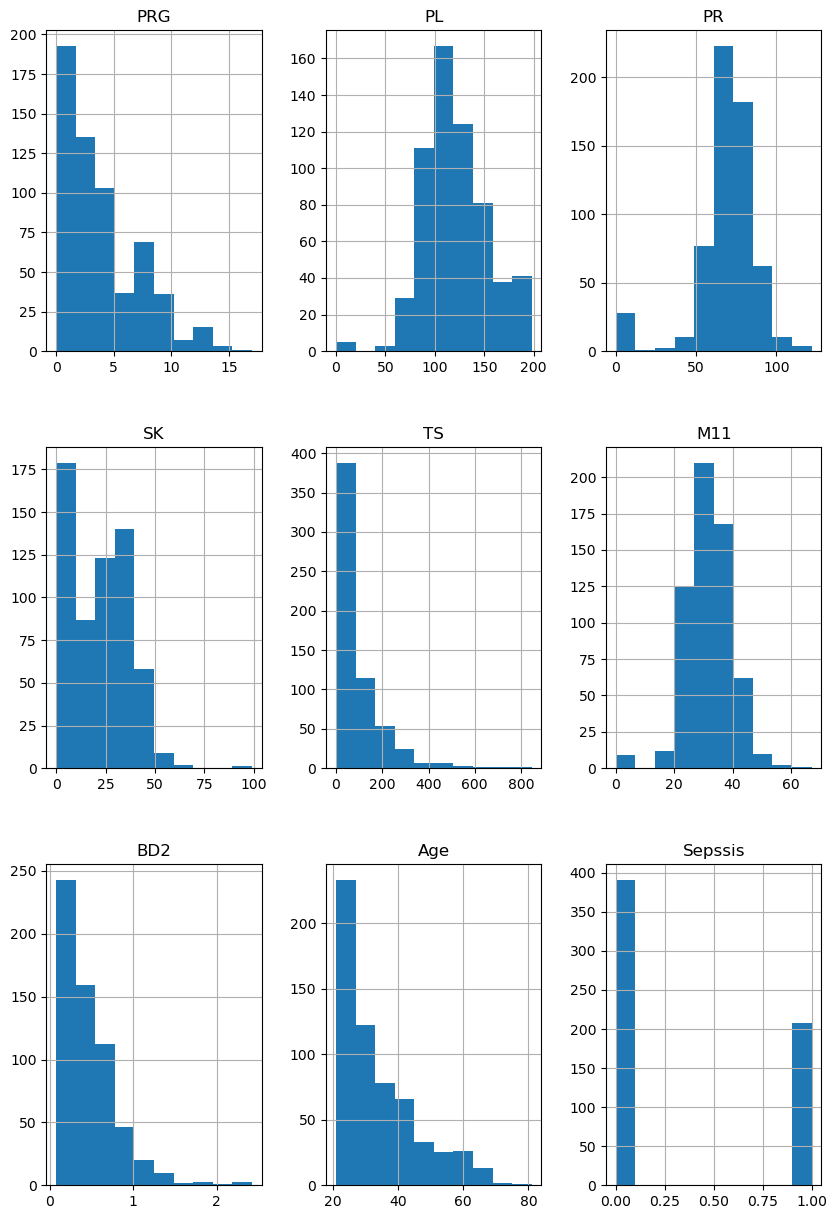

In [129]:
# Plotting histogram
plt.figure(dpi=300)
patient_train_df.hist(figsize=(10, 15), layout=(3,3))
plt.show()

<b>Conclusion.</b>

<ul>
    <li><b>PR, PL</b>, and <b>M11</b> display normal distribution. They also display unusual data as there is a value 0 that can be seen.</li><br>
    <li><b>PRG, SK, TS, BD2</b>, and <b>Age</b> are skewed. This suggests that our model may underperform in scenarios with greater <b>Age, PRG, SK, TS, </b>and<b> BD2</b>.</li><br>
    <li>We also see that in <b>Sepsis</b>, the case is at an 1:2 ratio for Possitive and Negative respectively, this might cause our model to output good prediction as we would need our data to be balanced, otherwise, the model might be biased towards the majority case. Therefore, we might need to perform some data balancing techniques such as oversampling or undersampling to ensure a balance between the two cases.</li><br>
</ul> 

**2) Scatter plot**

Using scatter plot, we can take a look about how the value of each feature varies when a patient is **Possitive** and **Negative**.

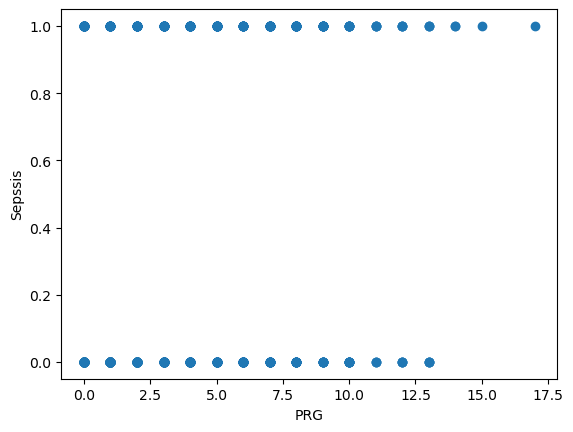

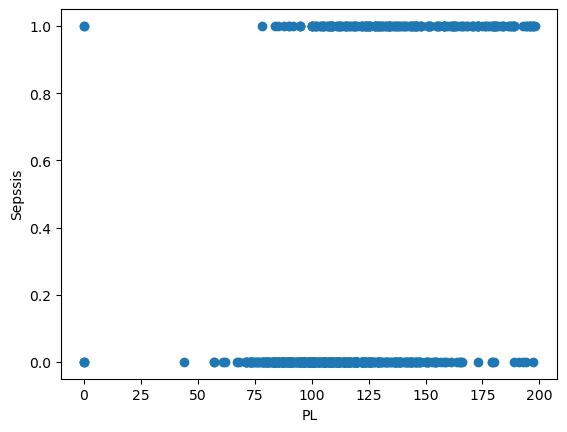

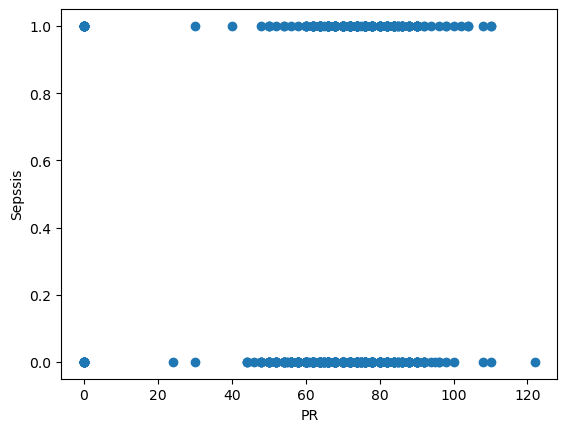

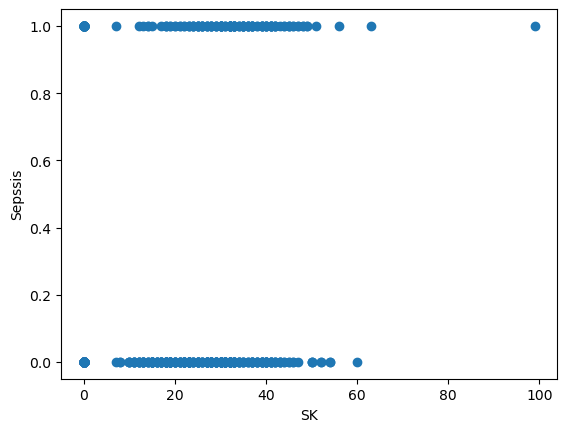

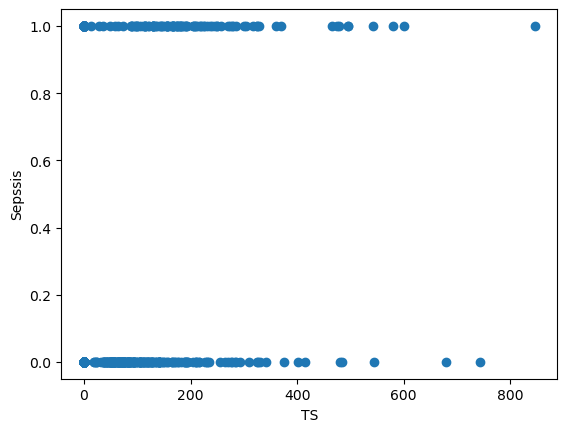

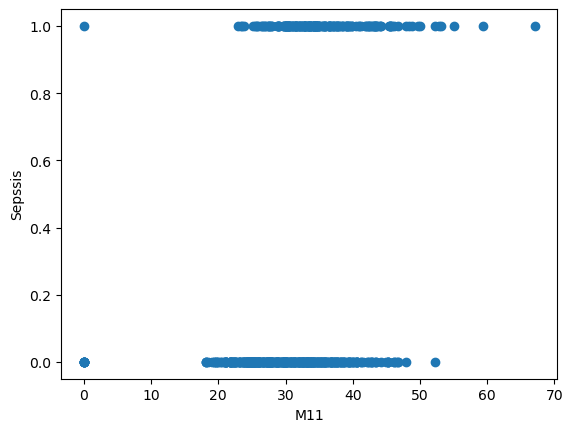

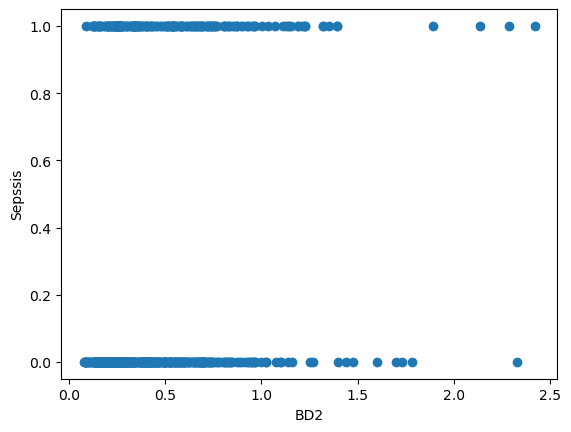

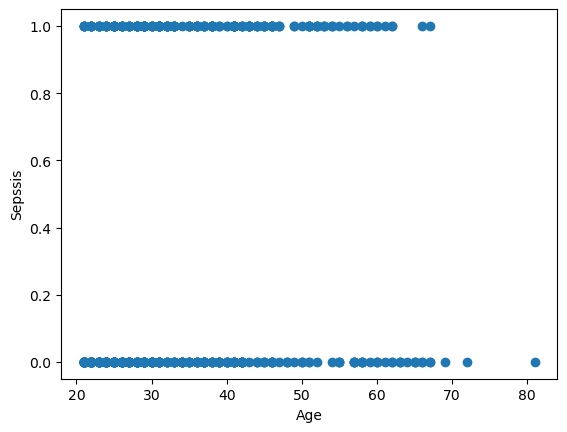

In [128]:
# List of features and columns
display_columns = list(patient_train_df.columns.drop("Sepssis").values)

# Plotting
for index, col in enumerate(display_columns):
    plt.scatter(patient_train_df[col], patient_train_df["Sepssis"])
    plt.ylabel('Sepssis')
    plt.xlabel(col)
    plt.show()

<b>Conclusion.</b>

<ul>
    <li>For now, there are no clear indications to been between value of features when a patient get <b>Sepsis</b> or not.</li><br>
    <li>But, we must also consider the possibility of outliers appearing in the scatter plot. This resulted in the Box plot, which is used to display the value distribution of each feature.</li>
</ul>

**3) Box plot**

Box plot would allow us to see if the value of each feature is distributed differently depending on **Sepsis** status. <br> <br>
If the values of a feature when Sepsis is 0 and 1 differ (y-value of boxplots do not overlap or have minimal overlap), then that characteristic may influence whether or not a patient gets Sepsis (meaning, there is a clear decision boundary).

<Figure size 1920x1440 with 0 Axes>

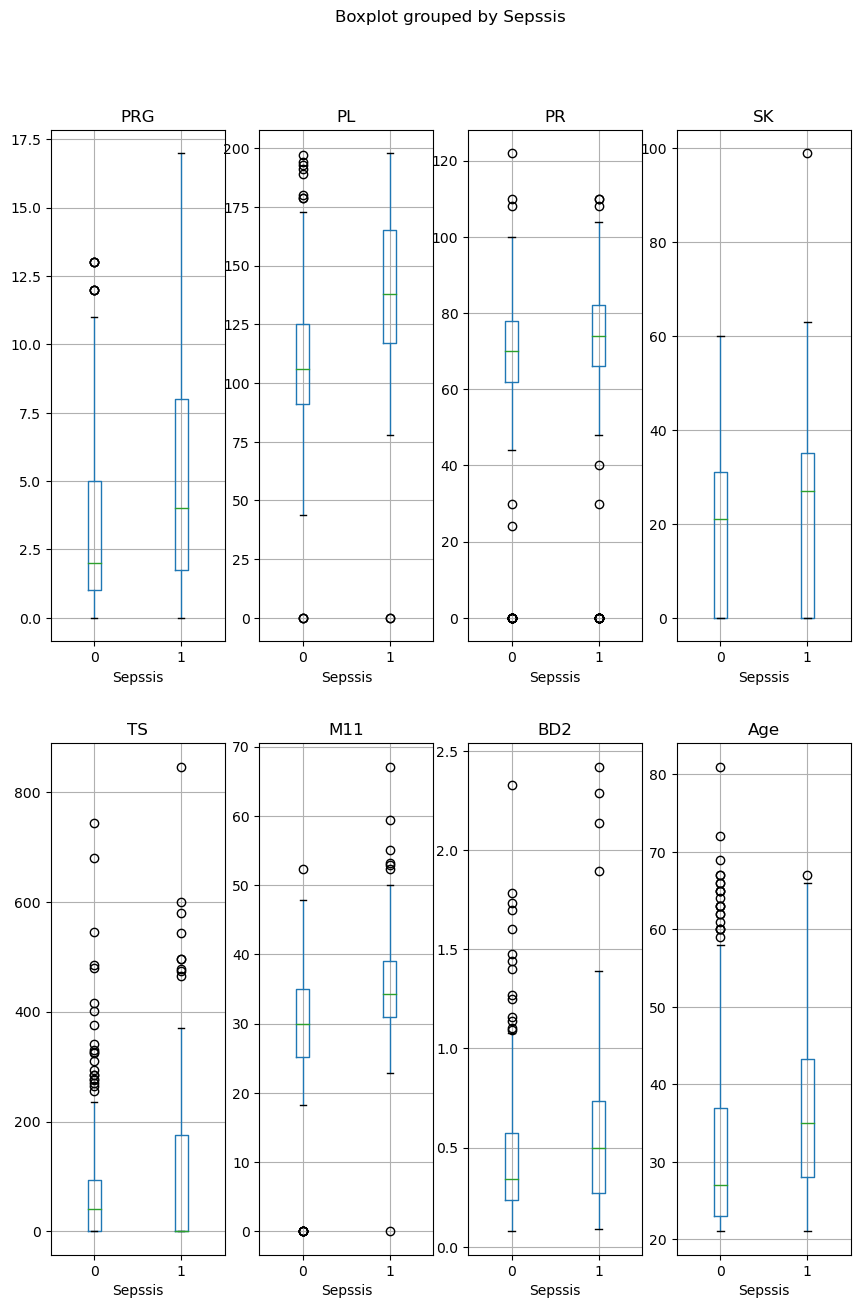

In [11]:
plt.figure(dpi=300)

# List of features and columns
display_columns = list(patient_train_df.columns.drop("Sepssis").values)

# Draw sub-plot
fig, ax = plt.subplots(2, 4, figsize=(10, 15))

# Plotting
for index, col in enumerate(display_columns):
    patient_train_df.boxplot(column=col, by="Sepssis", ax=ax[index//4][index%4])

<b>Conclusion.</b>
<ul>
    <li>We can observe a difference in the median, third quartile, and first quartile of various variables in the box plot when compared to the scatter plot.</li><br>
    <li>The majority values (first to third quartiles) of PL when a patient is Positive (1) or Negative (0) to Sepsis hardly overlap. This suggests that the value of PL is more likely to influence whether a patient gets Sepsis or not.</li><br>
    <li>The median and third quartile values for PRG, Age, and M11 characteristics are likewise noticeably different between Positive and Negative Sepsis patients, suggesting that this feature may possibly influence Sepsis results.</li><br>
    <li>We can also see that many characteristics (BD2, TS, Age) have a high number of outliers that must be considered.</li><br>
    <li>Overall, because there is no clear decision boundary (level at which a patient may be determined to have Sepsis or not) in any specific aspect, it is likely that predicting using any one feature would fail.</li><br>
</ul>


**4) Pair plot**

After determining if the value of each feature affects the outcome of Sepsis, a Pair plot can assist us in visualizing whether the value of a pair of characteristics affects the Sepsis result.

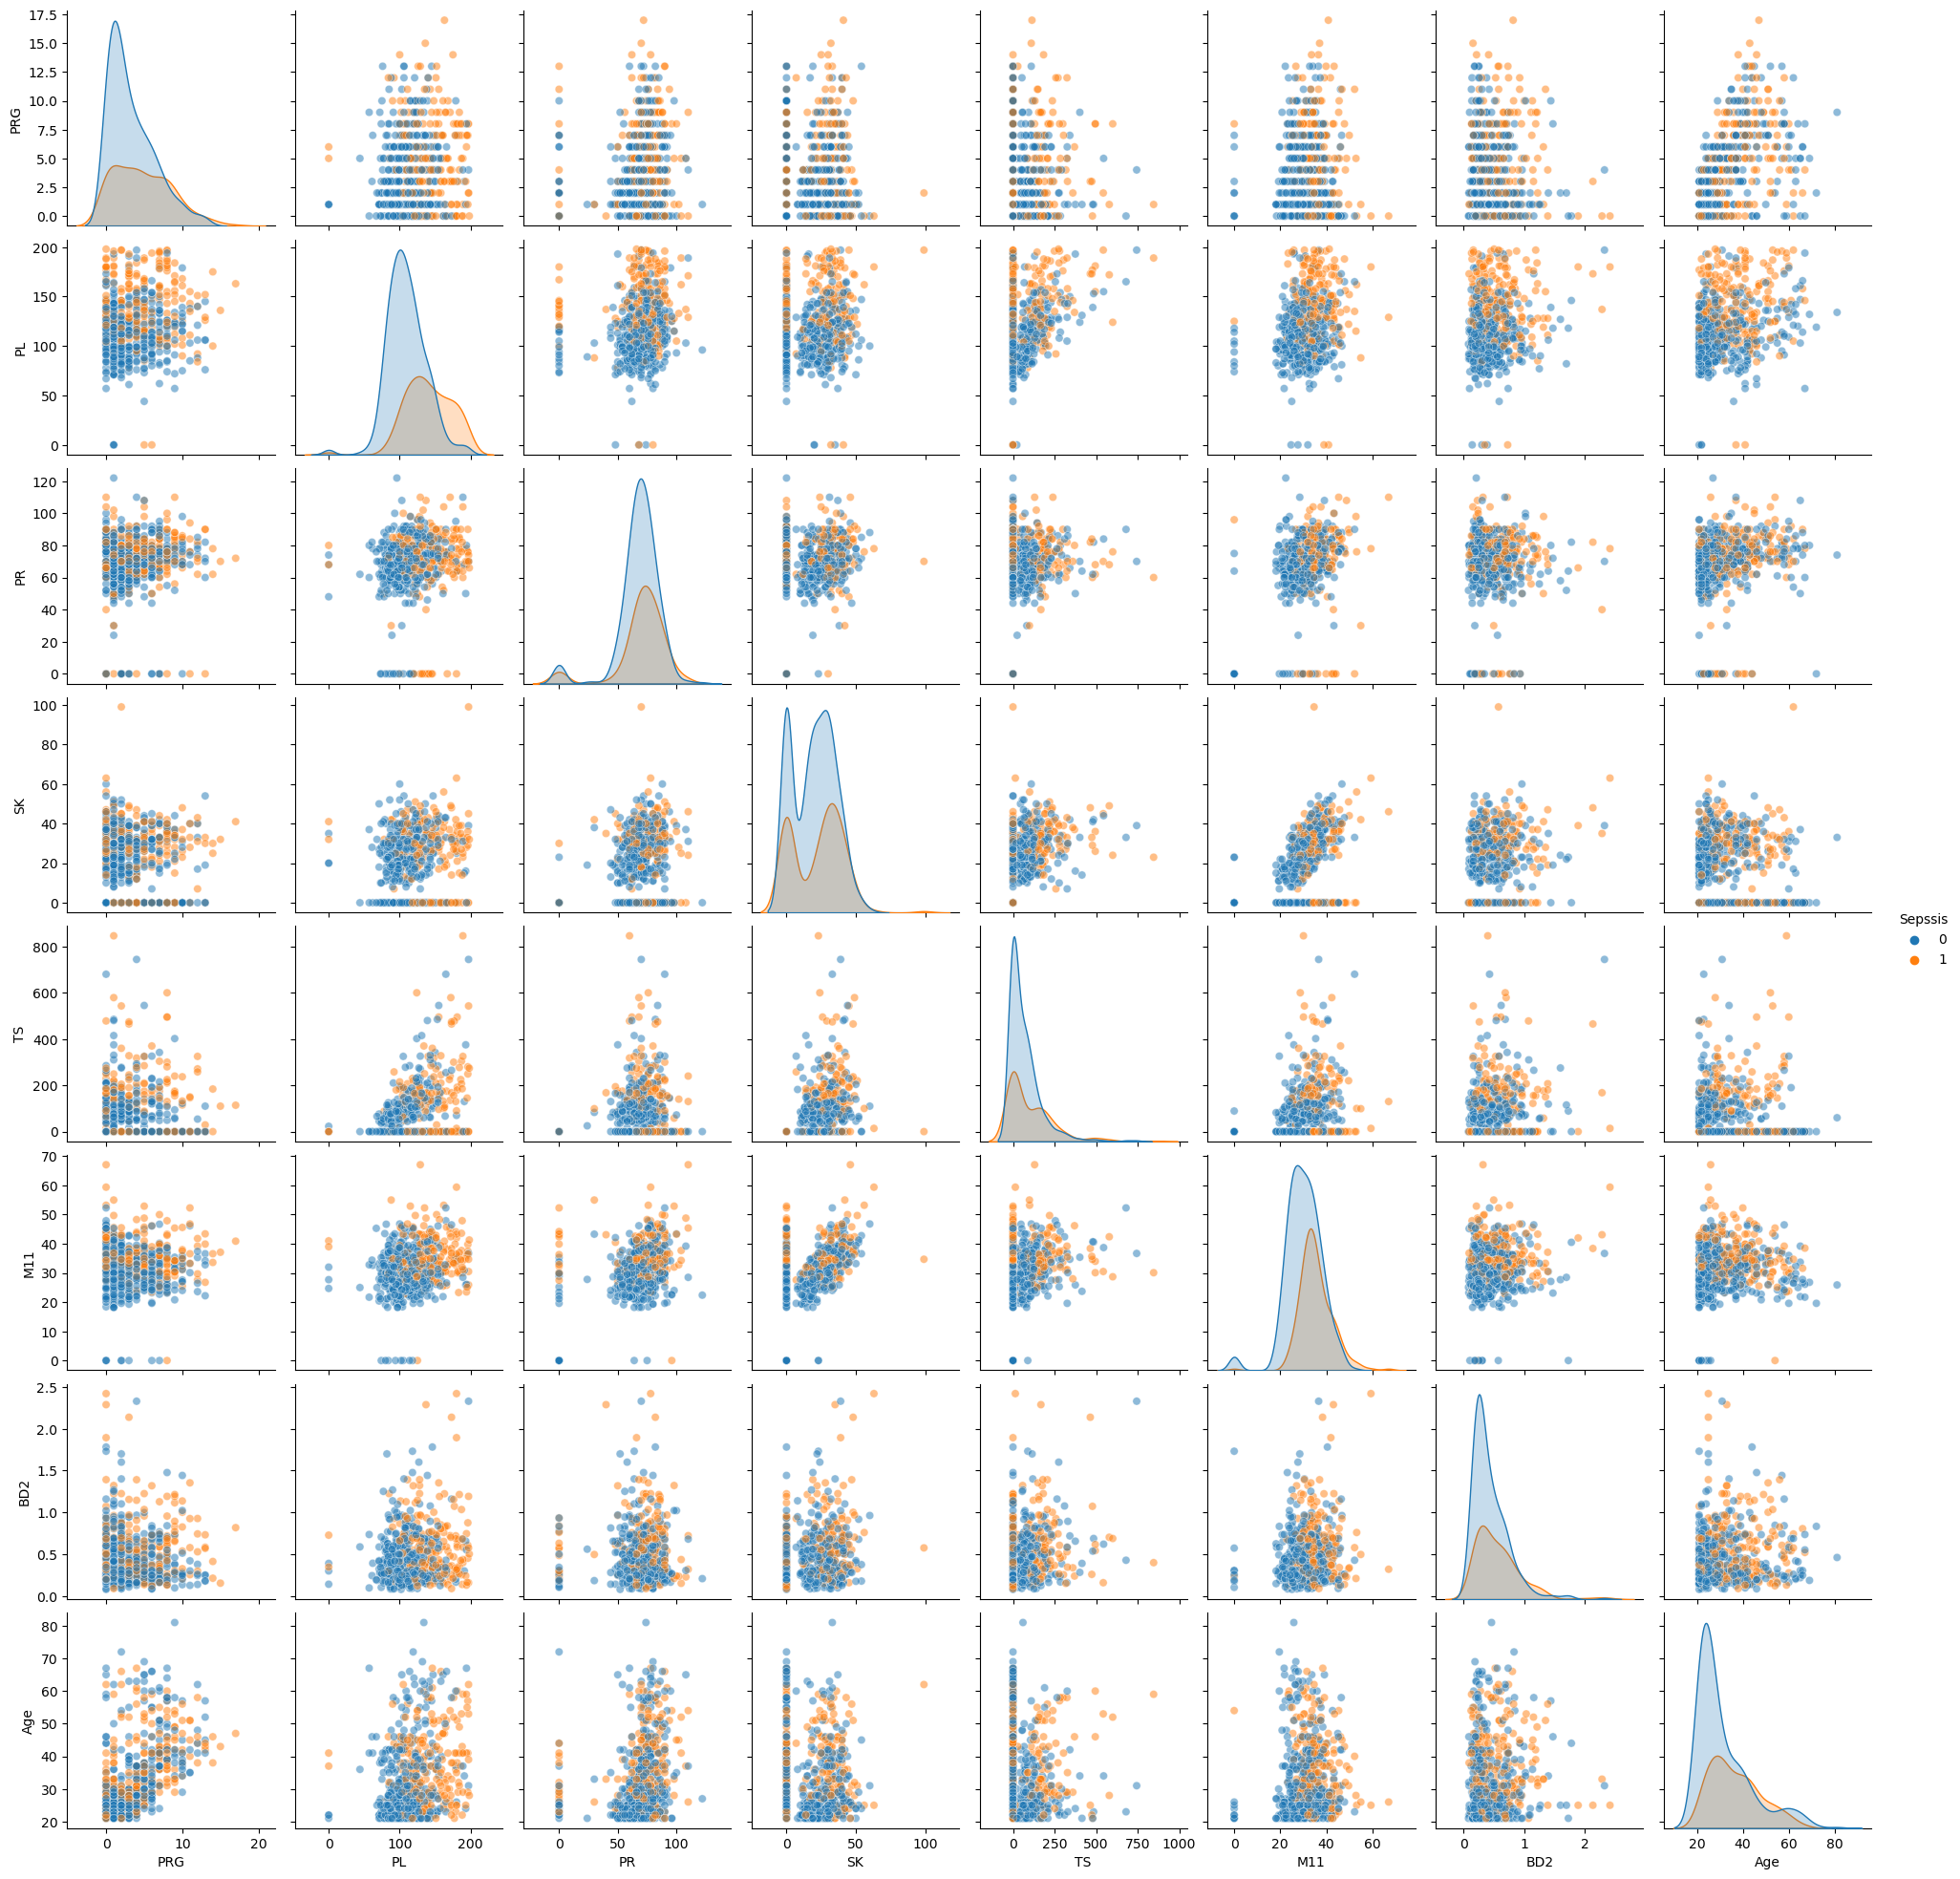

In [12]:
# Draw pair plot grouped by value of Sepssis
sns.pairplot(patient_train_df, hue="Sepssis", plot_kws={'alpha':0.5})

<b>Conclusion.</b>
<ul>
    <li>Even with two values, there is no apparent distinction between patients who are Positive (orange points) and Negative (blue points) to Sepsis (due to multiple overlaps of orange and blue points).</li><br>
    <li>There is less overlapping in the following pairs: (M11 - PL), (M11 - PRG), (M11 - PR), (SK - PL), (PL - PR) (PL - Age).</li><br>
    <li>This graph shows more separation than the previous two graphs, indicating that having many features may perform somewhat better with this dataset.</li><br>
    <li>We can also see that many characteristics (BD2, TS, Age) have a high number of outliers that must be considered.</li><br>
    <li>Because the majority of these combinations involve M11 or PL, it suggests that the combination of these characteristics with other variables may impact the outcome of Sepsis.</li><br>
</ul>

**4) Correlation Matriz**

<AxesSubplot:>

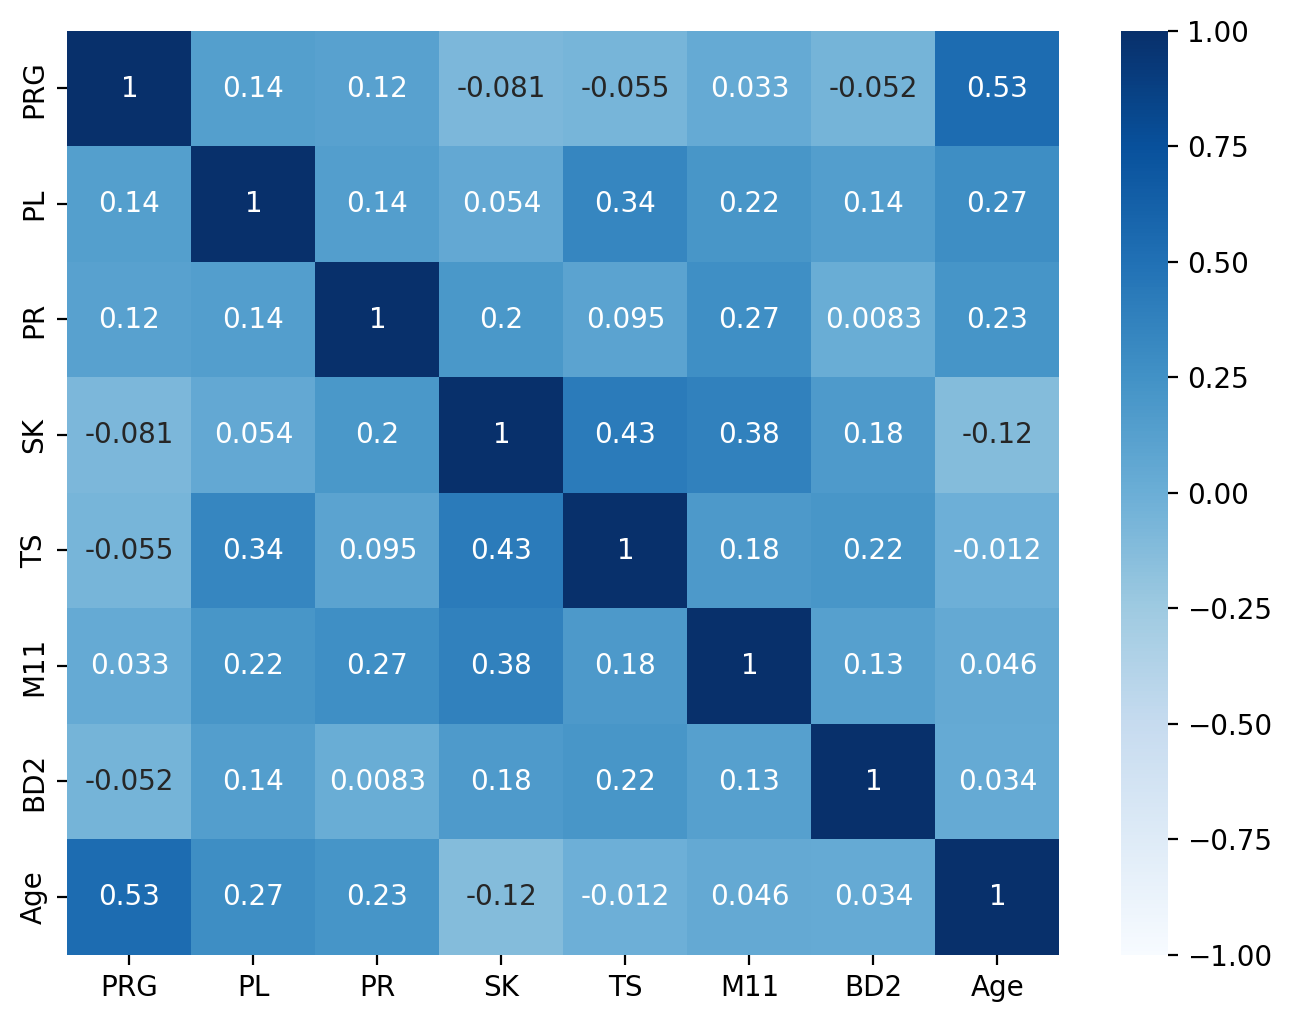

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

features = patient_train_df.columns.tolist()[:-1]
corr = patient_train_df[features].corr()

# Plotting
plt.figure(figsize=(8, 6), dpi=200)
sns.heatmap(corr,cmap="Blues",annot = True, vmin = -1, vmax=1)

<b>Conclusion.</b><br><br>
As seen in the above correlation graph, the characteristics in the dataset are not overly dependent on one another. The strongest connection is only 0.53.
<ul>
    <li><b>Age</b> and <b>PRG</b> has the strongest correlation at 0.53.</li><br>
    <li>The most important factor in determining whether a patient may develop <b>Sepsis</b> is <b>PL</b> (1).</li><br>
    <li>The majority of the characteristics are associated with Sepsis (except PR, SK). Nevertheless, they all have a modest level of connection, with PL having the strongest link with Sepsis.</li><br>
</ul>
Unfortunately, these correlation values cannot give any specific information because the datasets do not have a strong relationship. As a result, we are prepared to fit the data to machine learning models.

---
## II - APPROACHES

### Choosing a Machine Learning Model

In order to solve the problem at hand, we will be evaluating five types of supervised machine learning models, including **Linear Regression, Polynomial Regression, Logistic Regression, Decision Tree Classifier**, and **Random Forest**.

**Linear Regression** involves a first-degree function and is used to predict continuous variables. The output is the predicted value of the dependent variable (label) based on the given values of features (unseen input). **Polynomial Regression**, on the other hand, involves an nth-degree function and is also used for predicting continuous variables.

**Logistic Regression**, which uses a sigmoid function with output values ranging from 0 to 1, is utilized for predicting discrete variables (classification problems). The output from a Logistic Regression model is a binary output (either 0 or 1). **The Decision Tree Classifier** uses a tree structure of multiple nodes where each node is a decision point to split data into different branches. Data is classified to required classes when the splitting process stops (reaches the leaves). Finally, **Random Forest** combines multiple trees for classification, and each tree is constructed with a different subset of training data and features. The final classification is decided by majority voting.

Since our goal is to predict whether a patient will develop Sepsis or not, the problem falls into the category of classification problems (discrete output). Therefore, we will consider **Logistic Regression** and **Decision Tree Classifier/Random Forest** models for this problem.

During the EDA section, we have concluded that none of the features have a clear decision boundary (range of value that indicates a patient is positive for Sepsis or not) from scatter plot and box plot analysis. Even with the pair plot, which considers a pair of values, no clear separation can be seen. As a result, since most features/pair of features do not have clear separation, the performance of **Logistic Regression** and **Decision Tree Classifier/Random Forest** is likely to be close to each other. Thus, we will choose the better performing model between **Logistic Regression** and **Random Forest** as the final model.

---
### Choosing Input Features

One crucial decision we need to make is whether to use a **univariate** or **multivariate** approach for the analysis. From our EDA in the previous section, we have found that PL has the highest correlation with the occurrence of Sepsis. Therefore, it will be included as one of the features for **Logistic Regression**, regardless of the approach we take. However, for **Random Forest**, due to the nature of a decision tree where multiple features are required to improve classification accuracy, we will not test the univariate approach.

Apart from that, we will also conduct a test with all 11 features to determine which features have the most significant impact on the classification, by analyzing the coefficients for **Logistic Regression** and feature importance for **Random Forest**.
In conclusion, we will evaluate two different input scenarios to ensure that the model we select is the most effective:

    A Univariate model with only PL as the input attribute for Logistic Regression.
    A Multivariate model with all 11 features as input attributes for both Logistic Regression and Random Forest.

---
### Model evaluation methods

There are several methods to evaluate the performance of the models. For **Logistic Regression**, a **loss function** called **Log loss** is used to measure the accuracy of the model's prediction compared to the expected output. In addition, since this is a classification problem, other metrics such as **Recall, Precision, F1 score,** and **ROC AUC** can also be used to evaluate the model's performance from different perspectives (how well it classifies each class). A **Confusion matrix** is also a useful tool to visualize how the data is classified.

Given the aim of the problem statement, which is to save resources and prevent health complications, minimizing the number of **False Negatives** (patients who have Sepsis but are classified as Negative) is crucial. Therefore, the metrics that will be prioritized or maximized are **Recall** for **Positive** and **Precision** for **Negative**. **F1** score is also important to ensure a balance between the two requirements. Finally, **K-fold cross-validation**, which involves using different parts of the data for validation in each fold, will be used for model validation.

---
### Constrains for Logistic Regression and Decision Tree Classifier/ Random Forest

#### Regularization for Logistic Regression
Logistic Regression tends to overfit by maximizing weights to get the output as close to 0 or 1 as possible, as discussed on Stack Exchange [1]. To prevent this, regularization methods are applied to restrict the weights and avoid overfitting.
There are three regularization methods for Logistic Regression [2][3]:

    L1 (Lasso Regression) - some weights may become zero, resulting in feature selection. It adds the sum of absolute values of weights to the loss function and is robust against outliers[3].
    
    L2 (Ridge Regression) - all weights are non-zero, but some are very small. It adds the sum of squared values of weights to the loss function, with higher penalty for outliers[3].
    
    Early stopping, which stops the training process early to prevent overfitting.
    
However, early stopping regularization approach is not suitable for this project, as there is no clear indication of when to stop training, and it is a risky approach that can greatly affect the model output if the training is not enough.
    
Based on the "Choosing Input" section, we have decided to try out two different input features. Therefore, we will apply different regularization methods as follows:

    Univariate with PL: Since there is no need for feature selection, we will apply L2 to avoid excluding the only feature.
    Multivariate with all features: In this case, both L1 and L2 will be tested and compared since our dataset has features that are suitable for both regularization methods. Features with many outliers such as TS and BD2 might perform well with L1. However, since the dataset has few features, feature selection from L1 might affect the result.
    
#### Pruning Methods for Decision Tree Classifier/Random Forest
There are two main approaches to pruning decision trees: post-pruning and pre-pruning.
Sklearn provides the **Minimal Cost-Complexity Pruning** method for **post-pruning**, which involves tuning the **ccp_alpha** parameter to choose the best level of pruning [4].
For **pre-pruning**, Sklearn offers several tunable parameters, including **min_impurity_decrease**, **min_samples_split**, and **min_samples_leaf**. These parameters determine the minimum impurity required for a node to be split [5]. 

## III - MODEL EVALUATIONS

### 1) Prepare for training

### Training data preprocessing

Based on the EDA, it is clear that the range of data varies significantly across different features and that there is positive skewness detected in various features. To address these issues, the training data will be normalized before the training process. We can use **Normalization** adjusts the skewness of the dataset as well as the range of data, whereas scaling only adjusts the range of data. **Row normalization** is not useful when features have units and can result in information loss; therefore, **column normalization** is applied.

**Normalizatio**n is only applied to data trained with **Logistic Regression**, not **Random Forest**, because **Random Fores**t only classifies based on a threshold and normalization does not contribute to the result. Another issue identified in the EDA is the imbalance between positive and negative classes. To address this, the oversampling technique is applied, specifically **SMOTE (Synthetic Minority Oversampling Technique)**. **SMOTE** generates data points that connect from inliers to outliers to maintain the distribution of data. This method is preferred over **Random Oversampling** and **ADASYN** [6], which can introduce noise or increase the risk of overfitting.

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# by default, it would only over sample minority class which is the aim in this case
oversample = SMOTE()

# get all features
all_features = patient_train_df.drop("Sepssis", axis=1)

# get labels (Sepssis column)
label = patient_train_df["Sepssis"]

# get list of columns for traversing later on
columns = all_features.columns

# save non sampled data for comparison later on
non_sampled = all_features
non_sampled_label = label

# over sample data set
all_features, label = oversample.fit_resample(all_features, label)

# get univariate feature
uni_feature = all_features[["PL"]]

# feature for tree does not require normalization
tree_all_features = np.array(all_features)

# preprocessing each training set (normalize each feature)
non_sampled = sk.preprocessing.normalize(non_sampled, axis=0)
uni_feature = sk.preprocessing.normalize(uni_feature, axis=0)
all_features = sk.preprocessing.normalize(all_features, axis=0)

print("Size of univariate training data: ", uni_feature.shape)
print("Size of multivariate training data: ", all_features.shape)
print("Size of tree multivariate training data: ", tree_all_features.shape)

Size of univariate training data:  (782, 1)
Size of multivariate training data:  (782, 8)
Size of tree multivariate training data:  (782, 8)


---
### Set up evaluation metric

To assess the effectiveness of our machine learning model, we must develop a measure that quantifies its performance. We may utilize measures like accuracy, precision, recall, F1-score, and AUC-ROC for binary classification issues like this one.<br>

<ul>
    <li>Accuracy: measures the proportion of correct predictions over the total number of predictions.</li><br>
    <li>Precision: measures the proportion of true positives (TP) over the total number of positive predictions (TP + FP).</li><br>
    <li>Recall: measures the proportion of true positives (TP) over the total number of actual positives (TP + FN).</li><br>
    <li>F1-score: harmonic mean of precision and recall. It provides a single score that balances both precision and recall.</li><br>
    <li>AUC-ROC: measures the ability of the model to distinguish between positive and negative classes across different thresholds.</li><br>
</ul>

In [15]:
def evaluating_model(actual, prediction, tree=False, show_result=True):
    
    classification_stats = sk.metrics.classification_report(actual, prediction, zero_division=0, output_dict=True)
    
    if show_result:
        # Generate classification report
        report = sk.metrics.classification_report(actual, prediction, output_dict=True)
        print("Classification report:\n")
        print("{:<10} {:<10} {:<10} {:<10} {:<10}".format("Label", "Precision", "Recall", "F1-score", "Support"))
        for label, stats in report.items():
            if label != 'accuracy':
                print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f} {:<10}".format(label, stats['precision'], 
                                                                           stats['recall'], stats['f1-score'], 
                                                                           stats['support']))

        # Print confusion matrix
        print("\nConfusion matrix:\n")
        print(sk.metrics.confusion_matrix(actual, prediction))
        cm = sk.metrics.confusion_matrix(actual, prediction)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        # Print ROC AUC score
        print("\nROC AUC score: {:.2f}".format(sk.metrics.roc_auc_score(actual, prediction)))

        # Print log loss (if applicable)
        if not tree:
            print("\nLog loss: {:.2f}".format(sk.metrics.log_loss(actual, prediction)))

        # Add ROC AUC to classification report dictionary
        report["roc_auc"] = sk.metrics.roc_auc_score(actual, prediction)
    
    return report

---
### K-fold validation
K-fold validation is used and in this particular problem. Since the data size is quite small (782 samples) hence we will use the standard number of fold, which is **10**.

In [16]:
# Define k-fold that would split data to 10 sets
no_splits = 10
k_fold = sk.model_selection.KFold(n_splits=no_splits, shuffle=True)

---
### Ultities for training

To avoid model duplication since we will be testing multiple models, we can avoid it using this function.

In [17]:
def training_util(model, training_data, label, grid_search=None, tree=False,
                  feature_imp=True, show_result=True, show_avg=True):

    # array storing metrics each fold to calculate average
    p_f1 = np.array([])
    n_f1 = np.array([])
    p_recall = np.array([])
    n_recall = np.array([])
    p_precision = np.array([])
    n_precision = np.array([])
    accuracy = np.array([])
    roc_auc = np.array([])
    
    # count which fold being assessed
    fold_counter = 1
    
    for train_index, validate_index in k_fold.split(training_data, label):
        # further splitting data to train and validate data for cross validation
        train_x = training_data[train_index]
        validate_x = training_data[validate_index]
        train_y = label[train_index]
        validate_y = label[validate_index]
        
        # print fold counter
        print(f"\n>>FOLD {fold_counter}/{no_splits}")
        fold_counter += 1
        
        # feed training data to model
        model.fit(train_x, train_y)
        
        # make prediction using model
        prediction = model.predict(validate_x)
        
        if show_result:
            # header if result needed to be printed out
            print("\nResult of model")
            result = evaluating_model(validate_y, prediction, tree=tree, show_result=show_result)
            
            # save f1, recall, precision, accuracy result
            p_f1 = np.append(p_f1, result["1"]["f1-score"])
            n_f1 = np.append(n_f1, result["0"]["f1-score"])
            p_recall = np.append(p_recall, result["1"]["recall"])
            n_recall = np.append(n_recall, result["0"]["recall"])
            p_precision = np.append(p_precision, result["1"]["precision"])
            n_precision = np.append(n_precision, result["0"]["precision"])
            accuracy = np.append(accuracy, result["accuracy"])
            roc_auc = np.append(roc_auc, result["roc_auc"])
        
        # check if grid search object is passed (tuning is applied or not)
        if grid_search is not None:
            # fine tuning parameters to get the best ones
            grid_result = grid_search.fit(train_x, train_y)
            print("best params: ", grid_search.best_params_)
            
            if show_result:
                # predicted with tuned model
                optimized_pred = grid_result.predict(validate_x)
                
                # print result of tuned model
                print("\nResult of optimized model")
                evaluating_model(validate_y, optimized_pred, tree=tree, show_result=show_result)
        
        # print important features if required
        if feature_imp:
            if tree:
                for index, value in enumerate(model.feature_importances_):
                    print(f"Feature {index}: {value}")
            else:
                for index, value in enumerate(model.coef_[0]):
                    print(f"Feature {index}: {value}")
        print("----"*15)
    print("Completed validation")

        # print average result if required
    if show_result and show_avg:
        print("\nAverage Result:")
        print(f"Positive F1-score: {np.mean(p_f1):.4f}")
        print(f"Negative F1-score: {np.mean(n_f1):.4f}")
        print(f"Positive Recall: {np.mean(p_recall):.4f}")
        print(f"Negative Recall: {np.mean(n_recall):.4f}")
        print(f"Positive Precision: {np.mean(p_precision):.4f}")
        print(f"Negative Precision: {np.mean(n_precision):.4f}")
        print(f"Accuracy: {np.mean(accuracy):.4f}")
        print(f"ROC AUC Score: {np.mean(roc_auc):.4f}")

---
### 2) Initial model evaluation

### Evaluate with different features
For a fair evaluation, all logistic regression will have the same parameter: C=100, solver="saga", class_weight="balanced", max_iter=200 (suggested by sklearn for imbalanced class)

### Importance of oversampling
Because oversampling is an optional strategy, a comparison would be performed to demonstrate why it is required in certain circumstances.
A comparison of the same Logistic Regression model with non-sampled data vs sampled data would be done to explain why oversampling is required in this scenario.

Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.72       0.75       72        
1          0.63       0.71       0.67       48        
macro avg  0.71       0.72       0.71       120       
weighted avg 0.72       0.72       0.72       120       

Confusion matrix:

[[52 20]
 [14 34]]


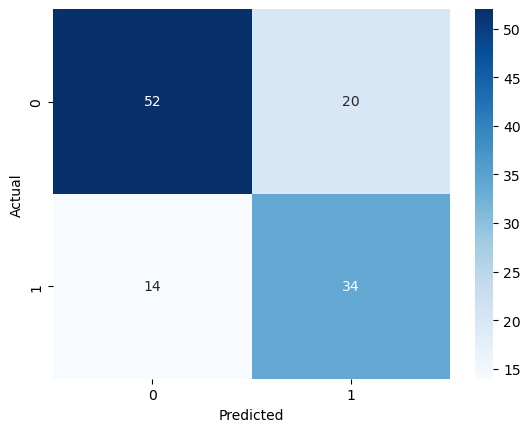


ROC AUC score: 0.72

Log loss: 9.79
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.82       0.75       77        
1          0.79       0.66       0.72       80        
macro avg  0.75       0.74       0.74       157       
weighted avg 0.75       0.74       0.74       157       

Confusion matrix:

[[63 14]
 [27 53]]


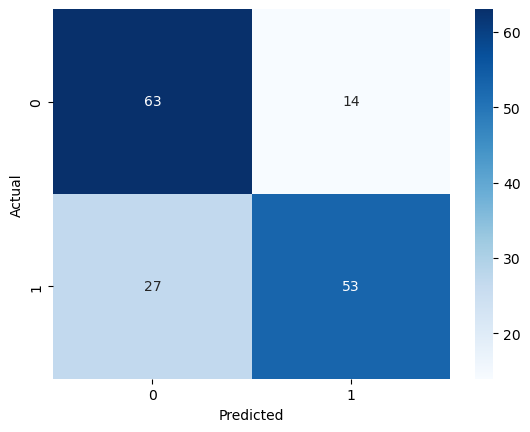


ROC AUC score: 0.74

Log loss: 9.02


In [18]:
# logistics regression model with class_weight balanced
lr_sample = sk.linear_model.LogisticRegression(C=100, solver="saga", class_weight="balanced", max_iter=200)

# split train and validation data for non sampled data
x_train, x_val, y_train, y_val = sk.model_selection.train_test_split(non_sampled, non_sampled_label, 
                                                                     test_size=0.2, shuffle=True)

# fit to model
lr_sample.fit(x_train, y_train)
non_sampled_pred = lr_sample.predict(x_val)

# evaluate model with un-sampled data
evaluating_model(y_val, non_sampled_pred)

# split train and validation data for sampled data
x_train, x_val, y_train, y_val = sk.model_selection.train_test_split(all_features, label, test_size=0.2, shuffle=True)
lr_sample.fit(x_train, y_train)
sampled_pred = lr_sample.predict(x_val)

# evaluate model with over-sampled data
evaluating_model(y_val, sampled_pred);

---
While balancing the class weights can assist improve the classifier's performance on unbalanced datasets, it may not always be enough to solve the problem. Oversampling can be a beneficial strategy in circumstances when the class imbalance is substantial to increase the classifier's capacity to accurately identify the minority class.

### Logistic Regression

### a) Univariate Logistics Regresssion


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.83       0.79       42        
1          0.78       0.68       0.72       37        
macro avg  0.76       0.75       0.76       79        
weighted avg 0.76       0.76       0.76       79        

Confusion matrix:

[[35  7]
 [12 25]]


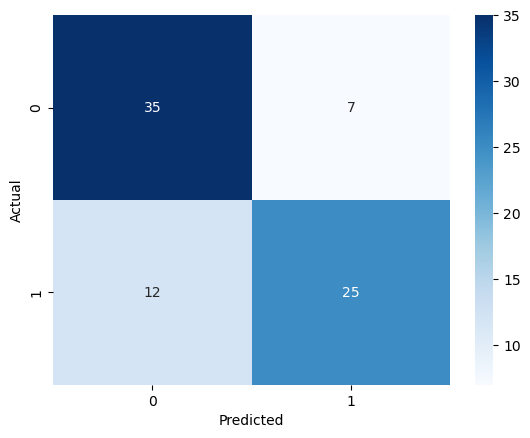


ROC AUC score: 0.75

Log loss: 8.31
Feature 0: 65.22493660945032
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.63       0.76       0.69       29        
1          0.84       0.74       0.79       50        
macro avg  0.73       0.75       0.74       79        
weighted avg 0.76       0.75       0.75       79        

Confusion matrix:

[[22  7]
 [13 37]]


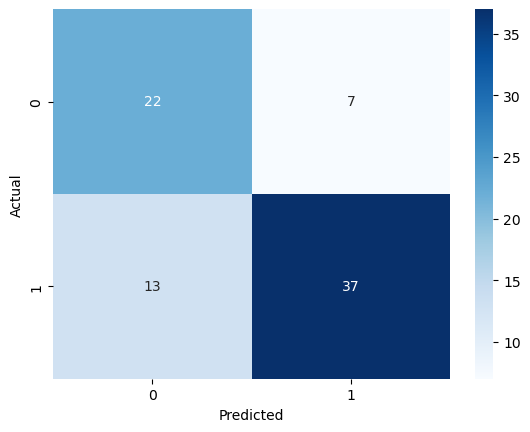


ROC AUC score: 0.75

Log loss: 8.74
Feature 0: 65.33488974961266
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.77       0.79       0.78       38        
1          0.79       0.78       0.78       40        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[30  8]
 [ 9 31]]


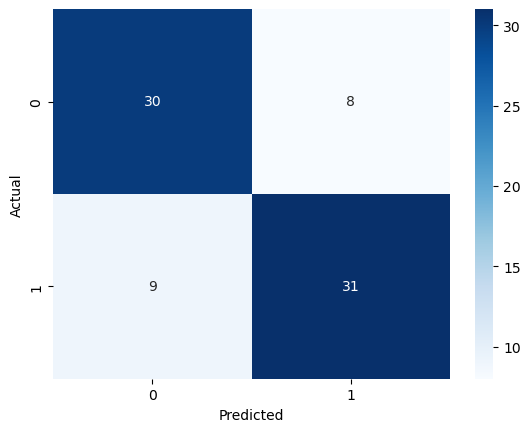


ROC AUC score: 0.78

Log loss: 7.53
Feature 0: 64.306837693163
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.75       0.73       0.74       45        
1          0.65       0.67       0.66       33        
macro avg  0.70       0.70       0.70       78        
weighted avg 0.71       0.71       0.71       78        

Confusion matrix:

[[33 12]
 [11 22]]


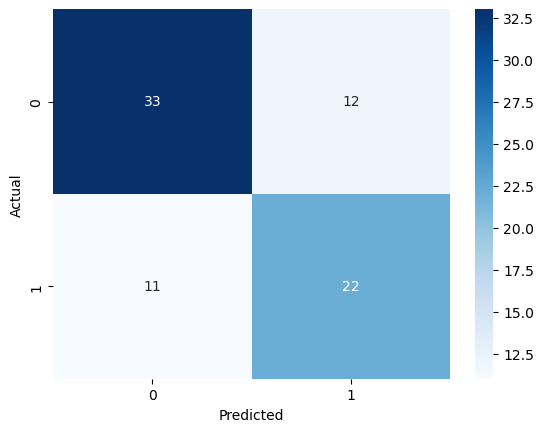


ROC AUC score: 0.70

Log loss: 10.18
Feature 0: 64.73417000946976
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.60       0.71       0.65       41        
1          0.60       0.49       0.54       37        
macro avg  0.60       0.60       0.59       78        
weighted avg 0.60       0.60       0.60       78        

Confusion matrix:

[[29 12]
 [19 18]]


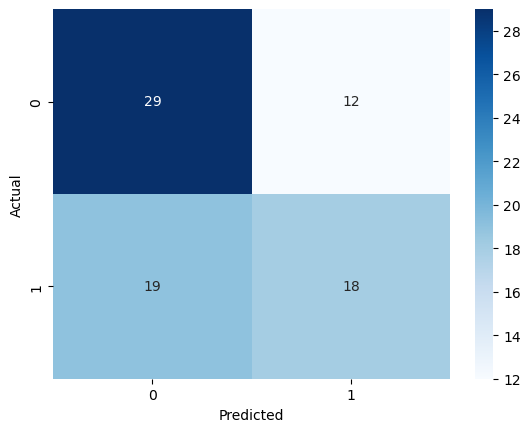


ROC AUC score: 0.60

Log loss: 13.73
Feature 0: 67.52037283755264
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.73       0.72       41        
1          0.69       0.68       0.68       37        
macro avg  0.70       0.70       0.70       78        
weighted avg 0.70       0.71       0.70       78        

Confusion matrix:

[[30 11]
 [12 25]]


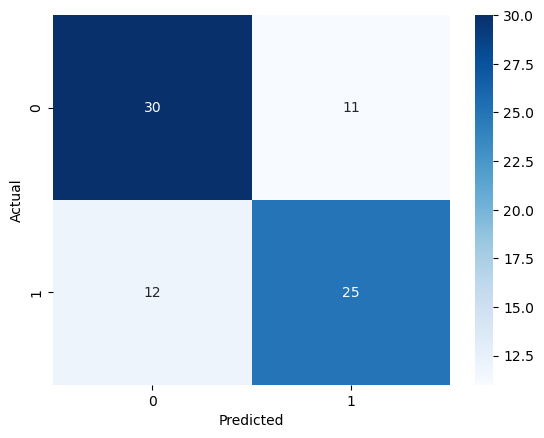


ROC AUC score: 0.70

Log loss: 10.18
Feature 0: 66.82579337462917
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.57       0.78       0.66       36        
1          0.72       0.50       0.59       42        
macro avg  0.65       0.64       0.63       78        
weighted avg 0.65       0.63       0.62       78        

Confusion matrix:

[[28  8]
 [21 21]]


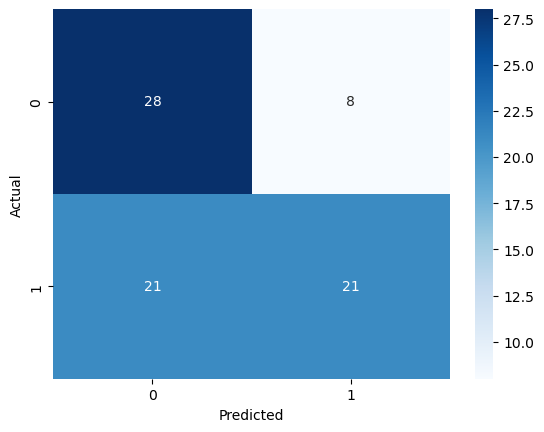


ROC AUC score: 0.64

Log loss: 12.84
Feature 0: 66.92178620527521
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.70       0.70       40        
1          0.68       0.68       0.68       38        
macro avg  0.69       0.69       0.69       78        
weighted avg 0.69       0.69       0.69       78        

Confusion matrix:

[[28 12]
 [12 26]]


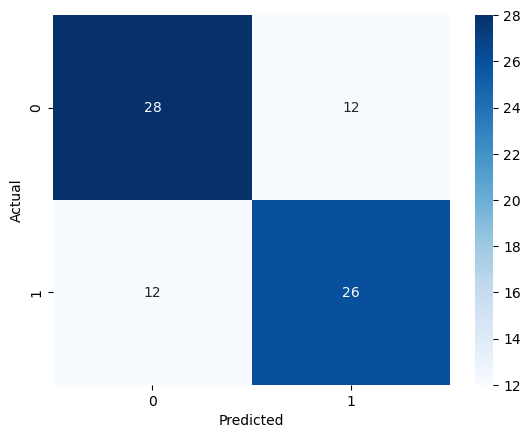


ROC AUC score: 0.69

Log loss: 10.63
Feature 0: 67.55169872618256
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.67       0.85       0.75       39        
1          0.79       0.59       0.68       39        
macro avg  0.73       0.72       0.71       78        
weighted avg 0.73       0.72       0.71       78        

Confusion matrix:

[[33  6]
 [16 23]]


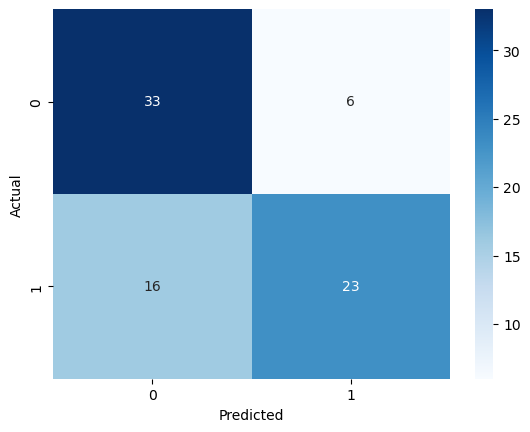


ROC AUC score: 0.72

Log loss: 9.74
Feature 0: 66.20286285281844
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.80       0.75       40        
1          0.76       0.66       0.70       38        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[32  8]
 [13 25]]


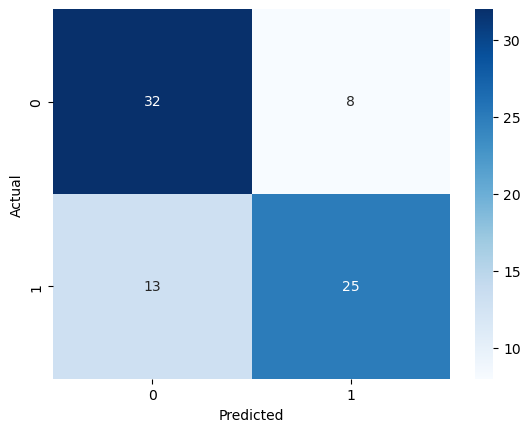


ROC AUC score: 0.73

Log loss: 9.30
Feature 0: 65.53934982172548
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.6832
Negative F1-score: 0.7231
Positive Recall: 0.6451
Negative Recall: 0.7678
Positive Precision: 0.7318
Negative Precision: 0.6867
Accuracy: 0.7070
ROC AUC Score: 0.7065


In [19]:
import warnings
# mute warning
warnings.filterwarnings('ignore')

# test uni_variate model
uni_model = sk.linear_model.LogisticRegression(C=100, penalty="l2", solver="saga", class_weight="balanced", max_iter=200)
training_util(uni_model, uni_feature, label, show_result=True, feature_imp=True)

---
### Analysis and conclusion

<ul>
    <li>The model's performance appears to be slightly inconsistent based on the results of the 10-fold cross-validation.</li><br>
    <li>The accuracy and recall values for each label also vary somewhat between folds, demonstrating that the model's ability to predict each class reliably is not constant across all folds.</li><br>
    <li>Overall, the model's weighted average F1-score over all folds is around 70%, suggesting that its performance is adequate but not extraordinary. The log loss values are also slightly elevated, indicating that the model's predictions are not particularly confident.</li><br>
    <li>Without further information about the dataset and the specific problem being addressed, it's impossible to draw firm judgments about the model's effectiveness, however based on these findings, it looks that the model might benefit from more optimization or fine-tuning.</li>
</ul>


---
### b) Polynomial Univariate Logistics Regresssion

As our previous Linear model didnot not shown great results, we will test to see if the polynomal univariate would help us yield better result. <br><br>
We can create a graph comparing the performance of the model (training and validation) as the polynomial degree would be used as a reference to determine an appropriate degree. The degree chosen is one with a low difference between training and validation and a high value for both.

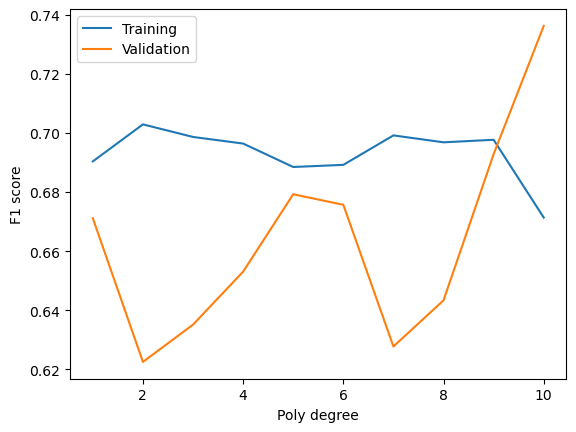

In [94]:
train_f1 = list()    # list to store train F1 scores
val_f1 = list()      # list to store validation F1 scores
poly_degree = np.arange(1, 11, 1)  # degrees of polynomial features to test

for i in poly_degree:
    poly_feature = PolynomialFeatures(i)   # create polynomial feature transformer
    
    uni_poly_feature = poly_feature.fit_transform(uni_feature)   # transform features to polynomial features
    uni_poly_model = sk.linear_model.LogisticRegression(C=100, penalty='l2', solver="saga", 
                                                        class_weight="balanced", max_iter=200)
    
    # split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(uni_feature, label, test_size=0.2, shuffle=True)
    
    uni_poly_model.fit(x_train, y_train)   # fit the model on train data
    
    train_pred = uni_poly_model.predict(x_train)   # make predictions on train data
    train_f1.append(f1_score(train_pred, y_train))   # calculate and store train F1 score
    
    test_pred = uni_poly_model.predict(x_test)   # make predictions on test data
    val_f1.append(f1_score(test_pred, y_test))   # calculate and store validation F1 score

# plot F1 score for train and validation data set as poly degree increases
plt.plot([deg for deg in poly_degree], [tp for tp in train_f1])
plt.plot([deg for deg in poly_degree], [vp for vp in val_f1])

plt.ylabel("F1 score")
plt.xlabel("Poly degree")
plt.legend(["Training", "Validation"])
plt.show()


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.66       0.72       0.69       43        
1          0.62       0.56       0.59       36        
macro avg  0.64       0.64       0.64       79        
weighted avg 0.64       0.65       0.64       79        

Confusion matrix:

[[31 12]
 [16 20]]


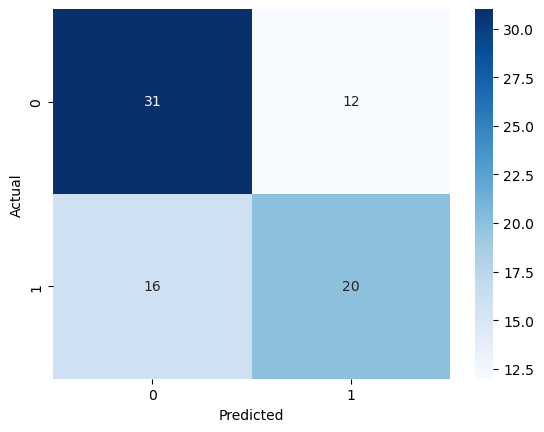


ROC AUC score: 0.64

Log loss: 12.24
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.79       0.76       42        
1          0.74       0.68       0.70       37        
macro avg  0.73       0.73       0.73       79        
weighted avg 0.73       0.73       0.73       79        

Confusion matrix:

[[33  9]
 [12 25]]


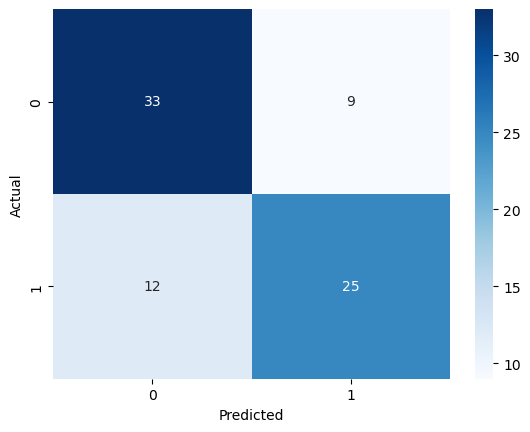


ROC AUC score: 0.73

Log loss: 9.18
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.58       0.85       0.69       33        
1          0.83       0.56       0.67       45        
macro avg  0.71       0.70       0.68       78        
weighted avg 0.73       0.68       0.68       78        

Confusion matrix:

[[28  5]
 [20 25]]


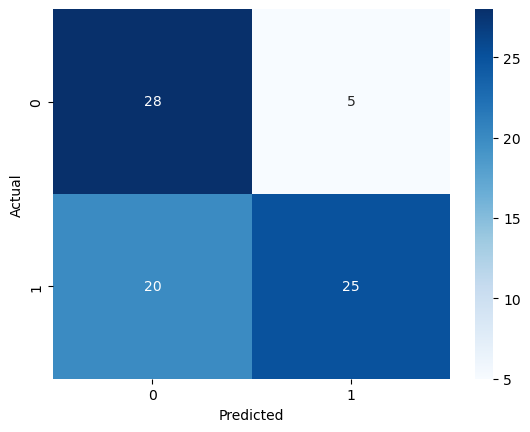


ROC AUC score: 0.70

Log loss: 11.07
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.67       0.70       43        
1          0.63       0.69       0.66       35        
macro avg  0.68       0.68       0.68       78        
weighted avg 0.68       0.68       0.68       78        

Confusion matrix:

[[29 14]
 [11 24]]


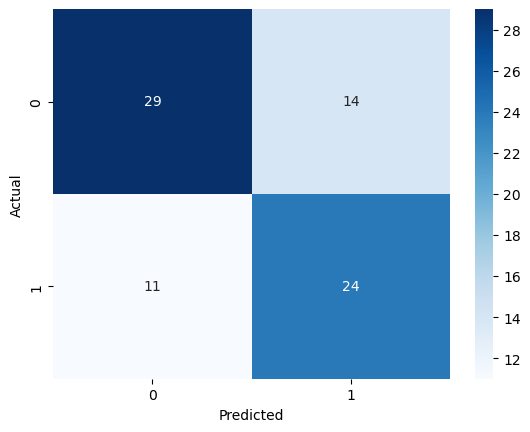


ROC AUC score: 0.68

Log loss: 11.07
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.71       0.72       38        
1          0.73       0.75       0.74       40        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[27 11]
 [10 30]]


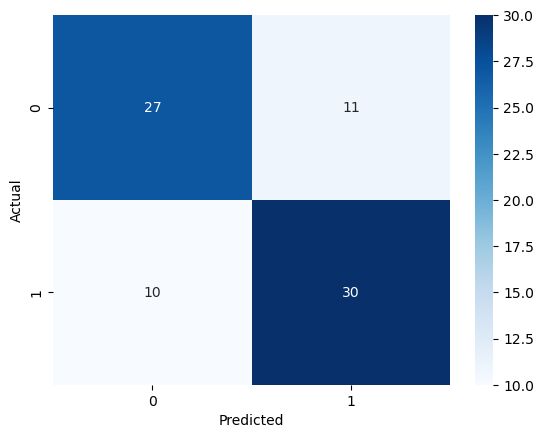


ROC AUC score: 0.73

Log loss: 9.30
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.80       0.76       35        
1          0.82       0.74       0.78       43        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[28  7]
 [11 32]]


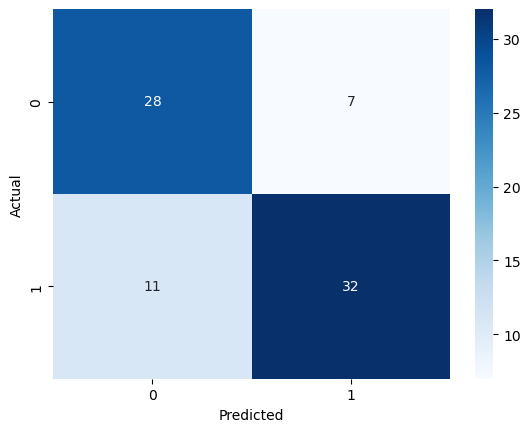


ROC AUC score: 0.77

Log loss: 7.97
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.60       0.75       0.67       36        
1          0.73       0.57       0.64       42        
macro avg  0.66       0.66       0.65       78        
weighted avg 0.67       0.65       0.65       78        

Confusion matrix:

[[27  9]
 [18 24]]


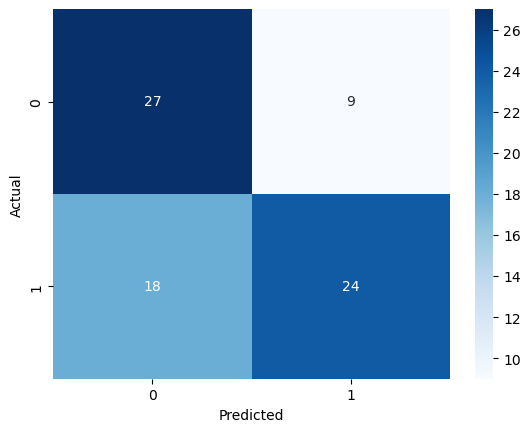


ROC AUC score: 0.66

Log loss: 11.96
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.74       0.73       39        
1          0.74       0.72       0.73       39        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[29 10]
 [11 28]]


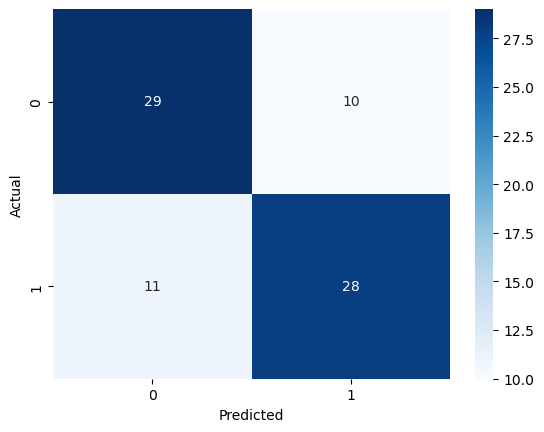


ROC AUC score: 0.73

Log loss: 9.30
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.69       0.81       0.75       42        
1          0.72       0.58       0.65       36        
macro avg  0.71       0.70       0.70       78        
weighted avg 0.71       0.71       0.70       78        

Confusion matrix:

[[34  8]
 [15 21]]


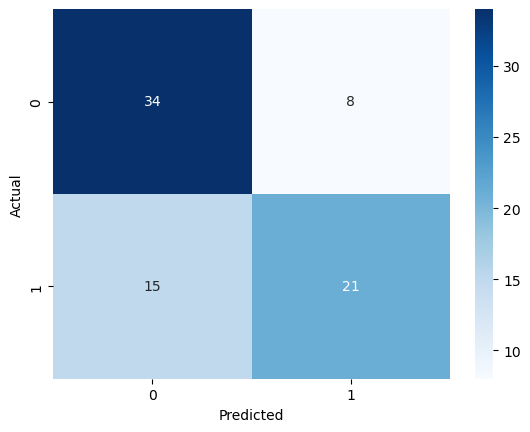


ROC AUC score: 0.70

Log loss: 10.18
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.80       0.74       40        
1          0.75       0.63       0.69       38        
macro avg  0.72       0.72       0.71       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[32  8]
 [14 24]]


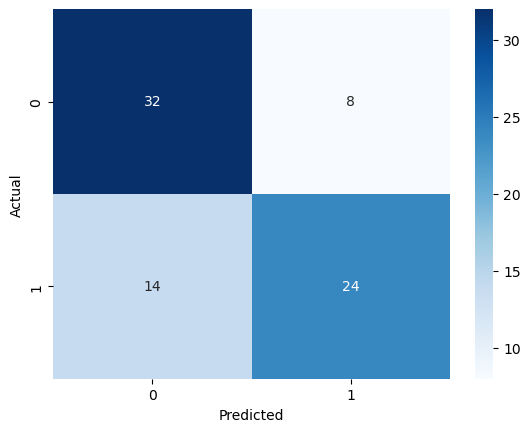


ROC AUC score: 0.72

Log loss: 9.74
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.6837
Negative F1-score: 0.7207
Positive Recall: 0.6471
Negative Recall: 0.7643
Positive Precision: 0.7316
Negative Precision: 0.6863
Accuracy: 0.7046
ROC AUC Score: 0.7057


In [21]:
poly_feature = PolynomialFeatures(5)
uni_poly_feature = poly_feature.fit_transform(uni_feature)
uni_poly_model = sk.linear_model.LogisticRegression(C=100, penalty='l2', solver="saga", class_weight="balanced", max_iter=200)
training_util(uni_poly_model, uni_poly_feature, label, feature_imp=False, show_avg=True, show_result=True)

---
### Analysis and conclusion

<ul>
    <li>The model appears to have modest performance based on the results of the 10-fold cross-validation. Precision and recall ratings were reasonably stable between folds.</li><br>
    <li>The ROC AUC score was likewise pretty stable among folds, demonstrating that the model can fairly effectively discriminate between the positive and negative classifications. The log loss measure, on the other hand, varied more considerably between folds.</li><br>
    <li>Overall, the model appears to work well, although there is always space for improvement. It may be worthwhile to investigate other methods or to attempt to tweak the hyperparameters of the existing model to see if performance can be improved.</li>
</ul>


---
### c) Multivariate Logistics Regression

As shown in the **Polynomial Univariate Logistics Regresssion** section, there are benefits and drawbacks to both L1 and L2 in this dataset. As a result, a comparison between L1 and L2 would be carried out.

#### L1 Regularization


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.85       0.83       0.84       42        
1          0.82       0.84       0.83       37        
macro avg  0.83       0.84       0.84       79        
weighted avg 0.84       0.84       0.84       79        

Confusion matrix:

[[35  7]
 [ 6 31]]


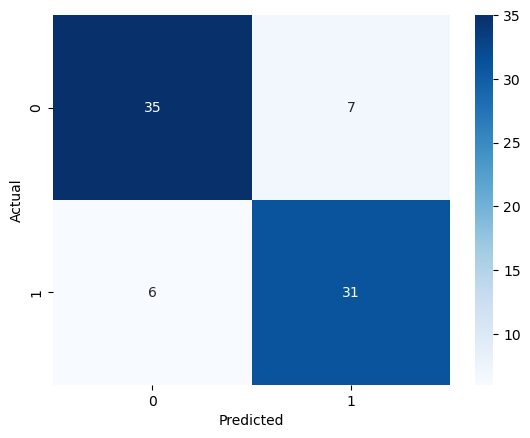


ROC AUC score: 0.84

Log loss: 5.68
Feature 0: 16.62692616932672
Feature 1: 108.61174672324637
Feature 2: -14.491104453121501
Feature 3: -2.599792493135718
Feature 4: -1.0566355382199852
Feature 5: 81.24488731488336
Feature 6: 18.82116420464174
Feature 7: 9.633345501203737
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.75       0.81       0.78       48        
1          0.67       0.58       0.62       31        
macro avg  0.71       0.70       0.70       79        
weighted avg 0.72       0.72       0.72       79        

Confusion matrix:

[[39  9]
 [13 18]]


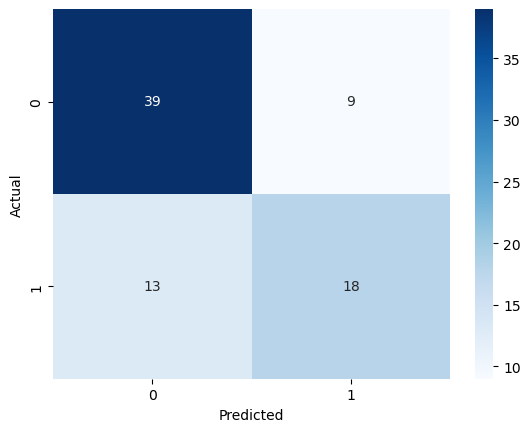


ROC AUC score: 0.70

Log loss: 9.62
Feature 0: 16.4249858559081
Feature 1: 114.81942919575563
Feature 2: -17.133676908258476
Feature 3: -2.7716459851608137
Feature 4: -1.7851983637569533
Feature 5: 88.0269724487515
Feature 6: 22.001771863447434
Feature 7: 12.131737341812611
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.76       0.74       41        
1          0.71       0.68       0.69       37        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[31 10]
 [12 25]]


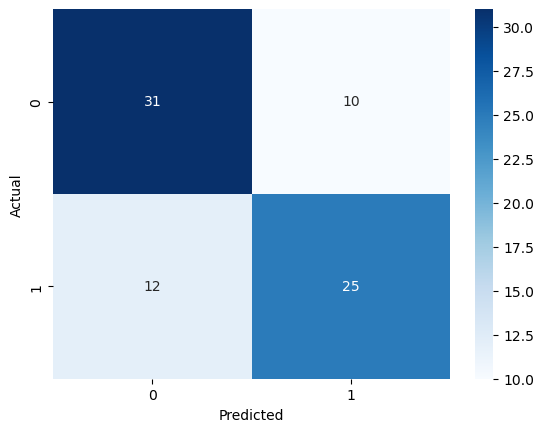


ROC AUC score: 0.72

Log loss: 9.74
Feature 0: 15.669813141909838
Feature 1: 109.54165081085709
Feature 2: -19.54570666018762
Feature 3: -2.7134587455976353
Feature 4: -0.546158488210611
Feature 5: 88.80841774389191
Feature 6: 21.041308896157346
Feature 7: 9.717431269928015
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.68       0.69       34        
1          0.76       0.77       0.76       44        
macro avg  0.73       0.72       0.73       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[23 11]
 [10 34]]


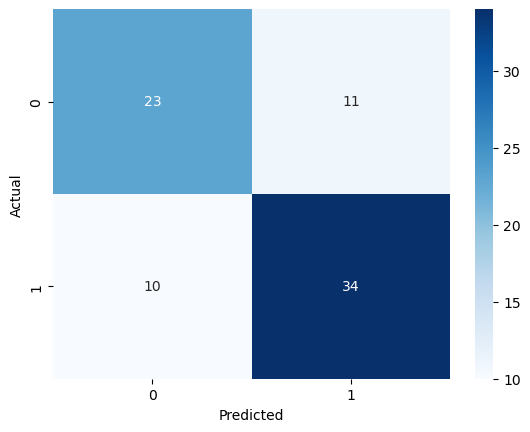


ROC AUC score: 0.72

Log loss: 9.30
Feature 0: 14.978887194105221
Feature 1: 111.8262514052209
Feature 2: -20.206059216509228
Feature 3: -2.1374579983733937
Feature 4: -0.12709064262529213
Feature 5: 82.34040925134279
Feature 6: 21.600752342547842
Feature 7: 11.819531730170356
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.79       0.77       39        
1          0.78       0.72       0.75       39        
macro avg  0.76       0.76       0.76       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[31  8]
 [11 28]]


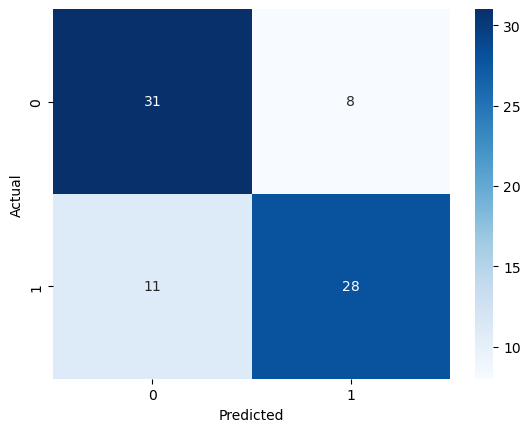


ROC AUC score: 0.76

Log loss: 8.41
Feature 0: 13.017445239100166
Feature 1: 118.3201929769964
Feature 2: -17.814861109844117
Feature 3: -4.904366397442114
Feature 4: -1.2255012034890211
Feature 5: 86.7556769065547
Feature 6: 17.74876264995311
Feature 7: 15.086276501031973
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.68       0.73       40        
1          0.70       0.82       0.76       38        
macro avg  0.75       0.75       0.74       78        
weighted avg 0.75       0.74       0.74       78        

Confusion matrix:

[[27 13]
 [ 7 31]]


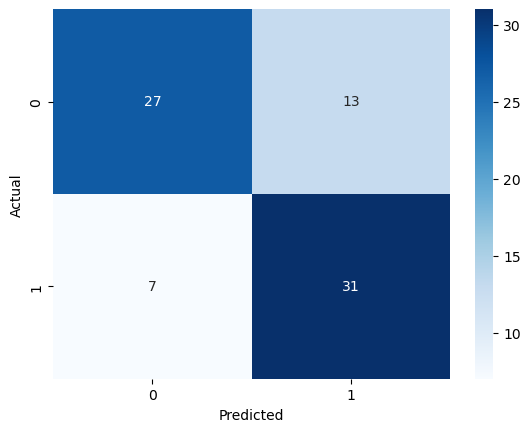


ROC AUC score: 0.75

Log loss: 8.86
Feature 0: 15.616036411827617
Feature 1: 110.95399053500012
Feature 2: -19.13925497310773
Feature 3: -3.005224081642994
Feature 4: -1.2779337282035645
Feature 5: 85.06386037789339
Feature 6: 16.736073761896847
Feature 7: 19.655648394103693
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.69       0.76       0.72       41        
1          0.70       0.62       0.66       37        
macro avg  0.69       0.69       0.69       78        
weighted avg 0.69       0.69       0.69       78        

Confusion matrix:

[[31 10]
 [14 23]]


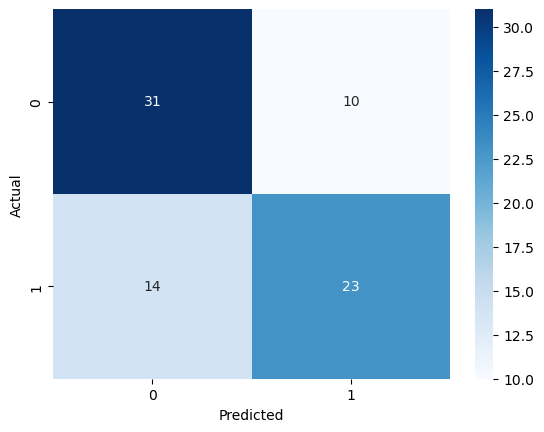


ROC AUC score: 0.69

Log loss: 10.63
Feature 0: 13.909935546272077
Feature 1: 114.42316636924147
Feature 2: -16.966177966413206
Feature 3: -1.1747972788186276
Feature 4: 0.31023610453719913
Feature 5: 86.85421569349639
Feature 6: 21.58255074452407
Feature 7: 14.127828028375719
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.67       0.78       0.72       36        
1          0.78       0.67       0.72       42        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.73       0.72       0.72       78        

Confusion matrix:

[[28  8]
 [14 28]]


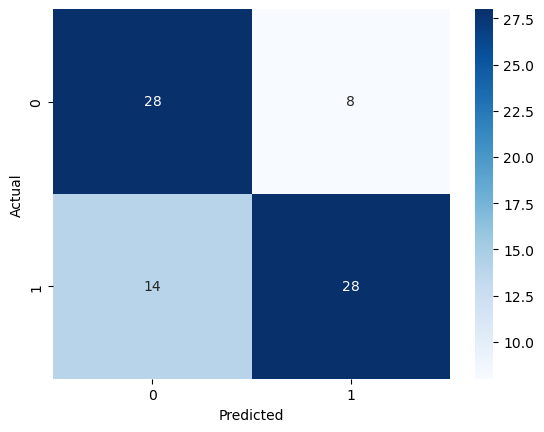


ROC AUC score: 0.72

Log loss: 9.74
Feature 0: 15.520894808846387
Feature 1: 107.56411898485892
Feature 2: -18.737106610417186
Feature 3: -1.0200074002919388
Feature 4: 0.4848075745098692
Feature 5: 89.82528330057524
Feature 6: 16.040985985750194
Feature 7: 15.413755738387378
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.77       0.77       0.77       35        
1          0.81       0.81       0.81       43        
macro avg  0.79       0.79       0.79       78        
weighted avg 0.79       0.79       0.79       78        

Confusion matrix:

[[27  8]
 [ 8 35]]


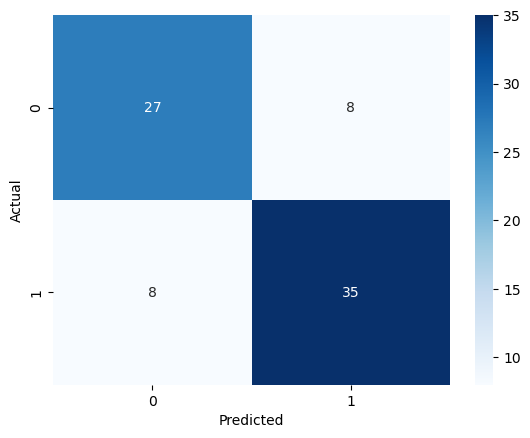


ROC AUC score: 0.79

Log loss: 7.08
Feature 0: 15.463720932209997
Feature 1: 114.78582967180459
Feature 2: -17.325439348550358
Feature 3: -1.7803854748008083
Feature 4: -0.4178325915446451
Feature 5: 85.8132658106844
Feature 6: 18.13242520102077
Feature 7: 12.47509149396752
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.74       0.73       35        
1          0.79       0.77       0.78       43        
macro avg  0.75       0.76       0.75       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[26  9]
 [10 33]]


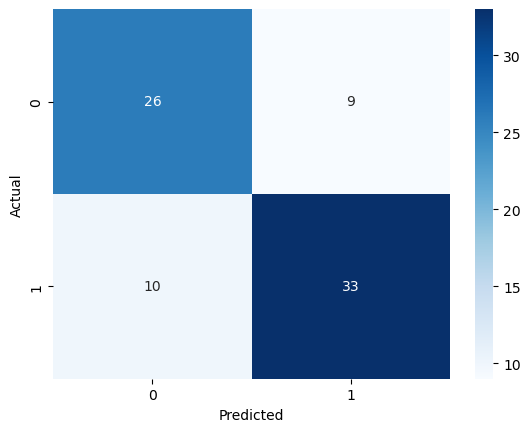


ROC AUC score: 0.76

Log loss: 8.41
Feature 0: 15.024161671485937
Feature 1: 110.22740447694731
Feature 2: -19.29628756007833
Feature 3: 2.6561531323972205
Feature 4: -1.0087791850827954
Feature 5: 83.06434326481381
Feature 6: 17.867670805430183
Feature 7: 16.90708456983486
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7374
Negative F1-score: 0.7486
Positive Recall: 0.7270
Negative Recall: 0.7596
Positive Precision: 0.7509
Negative Precision: 0.7403
Accuracy: 0.7467
ROC AUC Score: 0.7433


In [22]:
# Test all feature model
allfea_model = sk.linear_model.LogisticRegression(C=100, penalty='l1', solver="saga", class_weight="balanced", max_iter=200)

# Cycle through 10 K-Fold validation
training_util(allfea_model, all_features, label, feature_imp=True, show_result=True)

#### L2 Regularization


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.64       0.76       0.69       33        
1          0.80       0.70       0.74       46        
macro avg  0.72       0.73       0.72       79        
weighted avg 0.73       0.72       0.72       79        

Confusion matrix:

[[25  8]
 [14 32]]


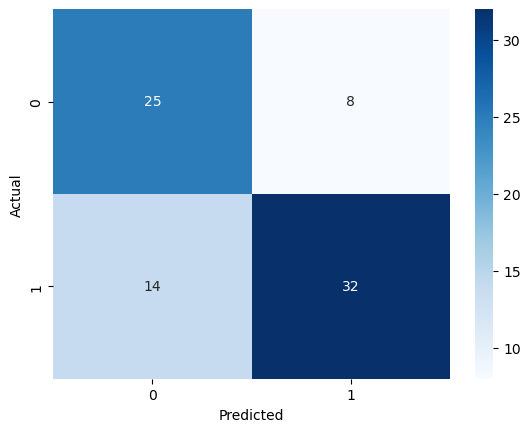


ROC AUC score: 0.73

Log loss: 9.62
Feature 0: 14.514397500987716
Feature 1: 52.249143011805245
Feature 2: -8.573317188066156
Feature 3: 0.758130383304293
Feature 4: 4.86101791224872
Feature 5: 37.374531584053166
Feature 6: 14.854973224608095
Feature 7: 14.050692038374601
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.88       0.83       41        
1          0.85       0.74       0.79       38        
macro avg  0.82       0.81       0.81       79        
weighted avg 0.81       0.81       0.81       79        

Confusion matrix:

[[36  5]
 [10 28]]


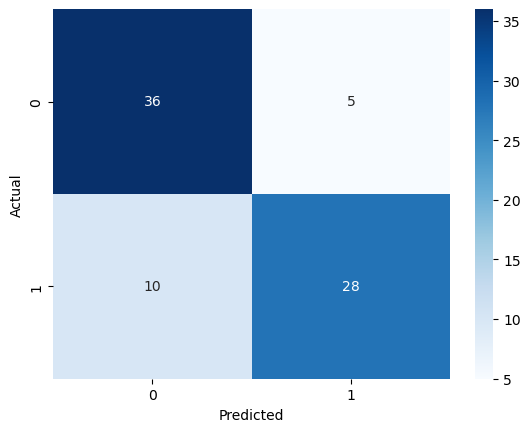


ROC AUC score: 0.81

Log loss: 6.56
Feature 0: 13.127373731675734
Feature 1: 55.49146661905447
Feature 2: -3.0698116646211133
Feature 3: -1.4098399887882396
Feature 4: 4.937659040509409
Feature 5: 38.36741047159767
Feature 6: 13.370054237256399
Feature 7: 11.390321101295179
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.65       0.68       40        
1          0.67       0.74       0.70       38        
macro avg  0.69       0.69       0.69       78        
weighted avg 0.70       0.69       0.69       78        

Confusion matrix:

[[26 14]
 [10 28]]


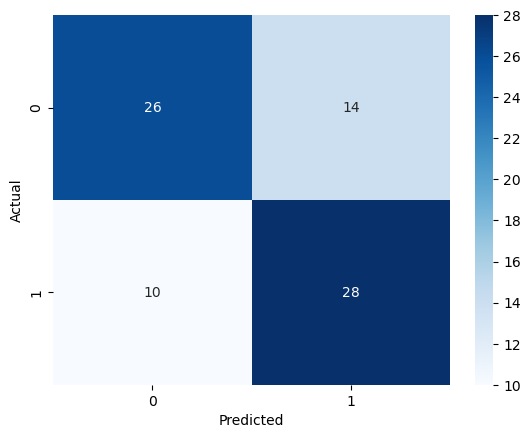


ROC AUC score: 0.69

Log loss: 10.63
Feature 0: 12.769504604137135
Feature 1: 55.60259521793372
Feature 2: -5.323026698203119
Feature 3: -1.7761000150417317
Feature 4: 7.560575015274957
Feature 5: 39.30951621041966
Feature 6: 17.200370925560176
Feature 7: 11.291490010198377
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.81       0.78       42        
1          0.76       0.69       0.72       36        
macro avg  0.76       0.75       0.75       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[34  8]
 [11 25]]


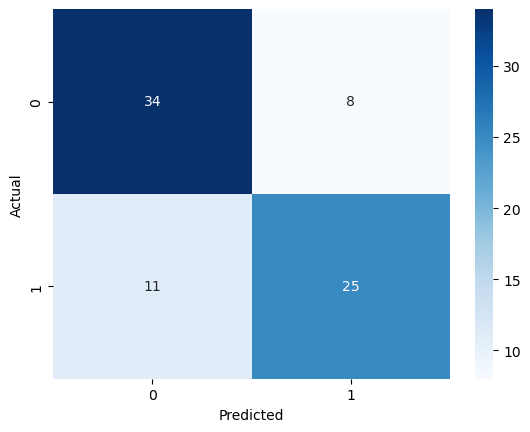


ROC AUC score: 0.75

Log loss: 8.41
Feature 0: 13.351116448038304
Feature 1: 55.08459968410894
Feature 2: -5.05713184237414
Feature 3: -1.1742411190057445
Feature 4: 5.624996886759886
Feature 5: 38.35532293983659
Feature 6: 14.392093054778291
Feature 7: 10.283118320468375
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.60       0.70       0.65       30        
1          0.79       0.71       0.75       48        
macro avg  0.70       0.70       0.70       78        
weighted avg 0.72       0.71       0.71       78        

Confusion matrix:

[[21  9]
 [14 34]]


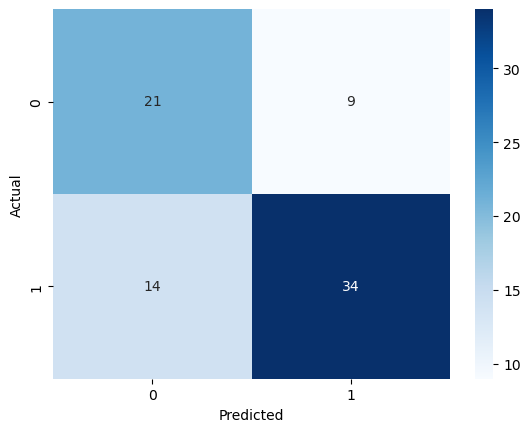


ROC AUC score: 0.70

Log loss: 10.18
Feature 0: 13.218197489797577
Feature 1: 54.160773760396445
Feature 2: -5.203517474701993
Feature 3: -1.671180453393908
Feature 4: 6.700731432284708
Feature 5: 37.1307519402625
Feature 6: 14.731467802764259
Feature 7: 10.383163921753303
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.89       0.78       36        
1          0.88       0.67       0.76       42        
macro avg  0.79       0.78       0.77       78        
weighted avg 0.79       0.77       0.77       78        

Confusion matrix:

[[32  4]
 [14 28]]


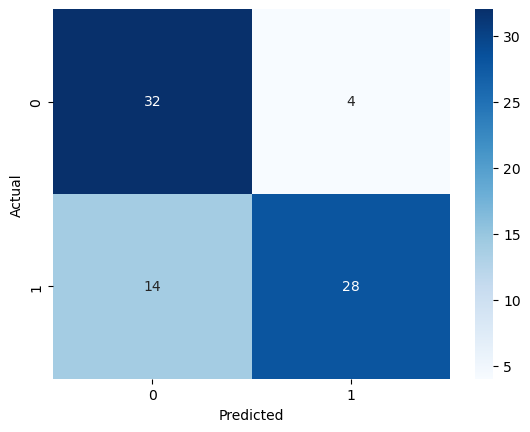


ROC AUC score: 0.78

Log loss: 7.97
Feature 0: 13.363344982332247
Feature 1: 53.47381726120633
Feature 2: -5.565972775701619
Feature 3: -0.8376166968699128
Feature 4: 5.218649933641236
Feature 5: 39.26400750836582
Feature 6: 14.465362454742474
Feature 7: 11.340331637883523
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.80       0.77       46        
1          0.68       0.59       0.63       32        
macro avg  0.71       0.70       0.70       78        
weighted avg 0.71       0.72       0.71       78        

Confusion matrix:

[[37  9]
 [13 19]]


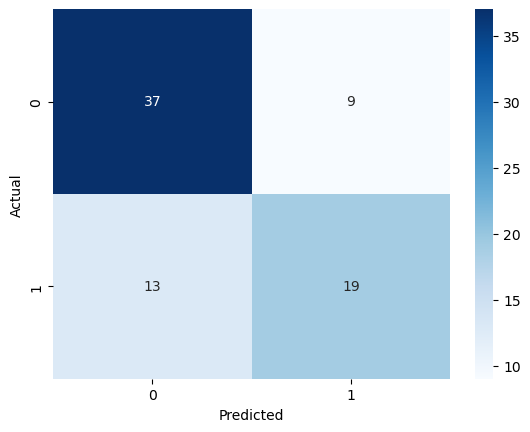


ROC AUC score: 0.70

Log loss: 9.74
Feature 0: 10.902269285152501
Feature 1: 56.907153948982526
Feature 2: -5.042192934019084
Feature 3: 0.875388382438939
Feature 4: 4.734183364562582
Feature 5: 38.06550843431901
Feature 6: 17.246222174251493
Feature 7: 11.404069973161475
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.77       0.73       0.75       41        
1          0.72       0.76       0.74       37        
macro avg  0.74       0.74       0.74       78        
weighted avg 0.74       0.74       0.74       78        

Confusion matrix:

[[30 11]
 [ 9 28]]


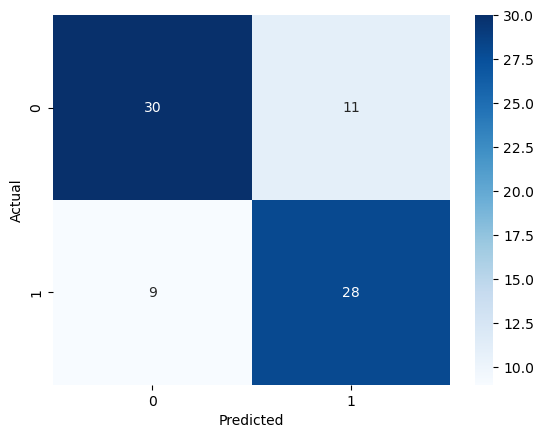


ROC AUC score: 0.74

Log loss: 8.86
Feature 0: 14.174408962239553
Feature 1: 51.65935779488461
Feature 2: -5.735310697435879
Feature 3: -0.35233215433016624
Feature 4: 4.665546738444659
Feature 5: 38.435108528965756
Feature 6: 16.48353791416909
Feature 7: 11.707731920468508
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.69       0.74       42        
1          0.69       0.81       0.74       36        
macro avg  0.75       0.75       0.74       78        
weighted avg 0.75       0.74       0.74       78        

Confusion matrix:

[[29 13]
 [ 7 29]]


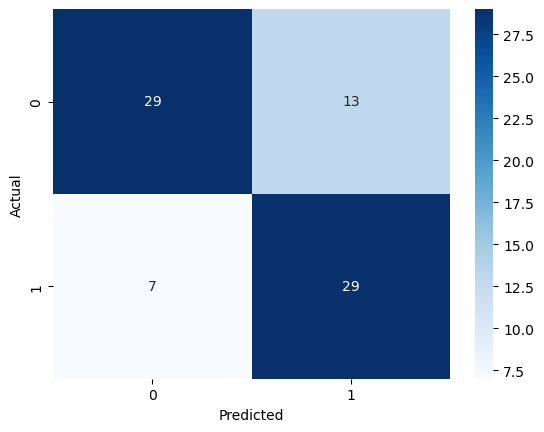


ROC AUC score: 0.75

Log loss: 8.86
Feature 0: 12.77090765939997
Feature 1: 53.50703489806925
Feature 2: -6.192671384745615
Feature 3: -2.2728673397129513
Feature 4: 5.208928814378097
Feature 5: 39.46366420881336
Feature 6: 16.681413935573612
Feature 7: 15.764893189842978
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.57       0.63       40        
1          0.62       0.74       0.67       38        
macro avg  0.66       0.66       0.65       78        
weighted avg 0.66       0.65       0.65       78        

Confusion matrix:

[[23 17]
 [10 28]]


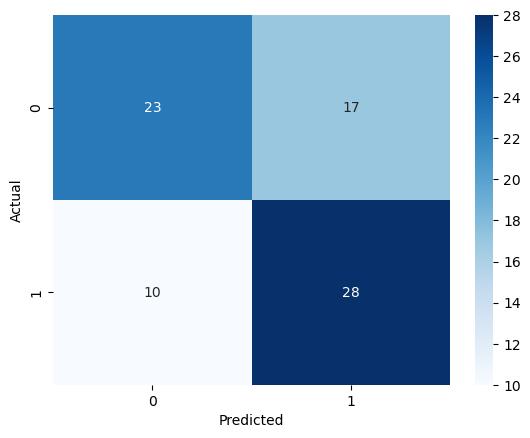


ROC AUC score: 0.66

Log loss: 11.96
Feature 0: 12.776022003821588
Feature 1: 55.65660307449812
Feature 2: -8.735857071030452
Feature 3: -1.425341885215019
Feature 4: 5.006876584543453
Feature 5: 38.17665845729077
Feature 6: 13.865918217361218
Feature 7: 16.12805387705707
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7250
Negative F1-score: 0.7309
Positive Recall: 0.7132
Negative Recall: 0.7486
Positive Precision: 0.7448
Negative Precision: 0.7209
Accuracy: 0.7314
ROC AUC Score: 0.7309


In [23]:
# Test all feature model
all_fea_model = sk.linear_model.LogisticRegression(C=100, penalty='l2', solver="saga", class_weight="balanced", max_iter=200)

# Cycle through 10 K-Fold validation
training_util(all_fea_model, all_features, label, feature_imp=True, show_result=True)

---
### Analysis and conclusion

<ul>
    <li>According to our findings, switching from univariate to multivariate models resulted in a small rise in all indicators. This implies that the additional elements help to improve the accuracy of the findings.</li><br>
    <li>Our EDA section indicated that PL (feature 2) had the highest coefficient and importance. However, we did not observe any significantly smaller coefficients, and since our dataset is small, we decided not to carry out any feature selection.</li><br>
    <li>When we compared L1 and L2 regularization approaches, we discovered that L1 regularization did not result in any features being set to zero exactly, suggesting that feature selection was unnecessary. Although all regularization approaches performed similarly, L1 regularization produced a slightly higher ROC AUC value, indicating a better balance of positive and negative rates.</li><br>
</ul>

---
### d) Polynomial Multivariate Logistic Regression

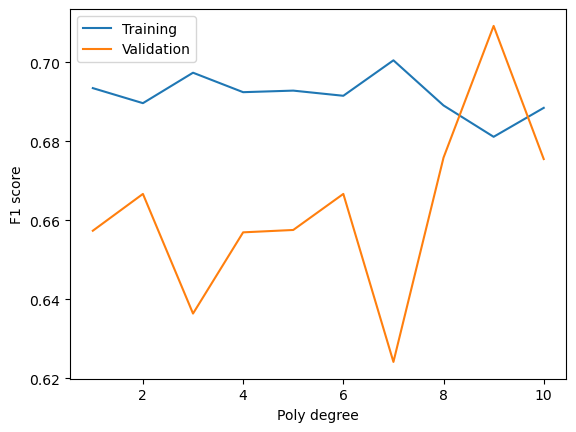

In [88]:
train_f1 = list()    # list to store train F1 scores
val_f1 = list()      # list to store validation F1 scores
poly_degree = np.arange(1, 11, 1)  # degrees of polynomial features to test

for i in poly_degree:
    poly_feature = PolynomialFeatures(i)   # create polynomial feature transformer
    
    uni_poly_feature = poly_feature.fit_transform(uni_feature)   # transform features to polynomial features
    uni_poly_model = sk.linear_model.LogisticRegression(C=100, penalty='l2', solver="saga", 
                                                        class_weight="balanced", max_iter=200)
    
    # split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(uni_feature, label, test_size=0.2, shuffle=True)  
    uni_poly_model.fit(x_train, y_train)   # fit the model on train data
    
    train_pred = uni_poly_model.predict(x_train)   # make predictions on train data
    train_f1.append(f1_score(train_pred, y_train))   # calculate and store train F1 score
    
    test_pred = uni_poly_model.predict(x_test)   # make predictions on test data
    val_f1.append(f1_score(test_pred, y_test))   # calculate and store validation F1 score

# plot F1 score for train and validation data set as poly degree increases
plt.plot([deg for deg in poly_degree], [tp for tp in train_f1])
plt.plot([deg for deg in poly_degree], [vp for vp in val_f1])

plt.ylabel("F1 score")
plt.xlabel("Poly degree")
plt.legend(["Training", "Validation"])
plt.show()


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.63       0.67       0.65       39        
1          0.66       0.62       0.64       40        
macro avg  0.65       0.65       0.65       79        
weighted avg 0.65       0.65       0.65       79        

Confusion matrix:

[[26 13]
 [15 25]]


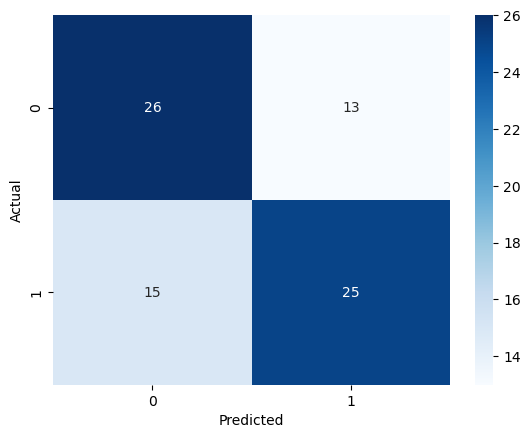


ROC AUC score: 0.65

Log loss: 12.24
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.82       0.76       38        
1          0.80       0.68       0.74       41        
macro avg  0.75       0.75       0.75       79        
weighted avg 0.75       0.75       0.75       79        

Confusion matrix:

[[31  7]
 [13 28]]


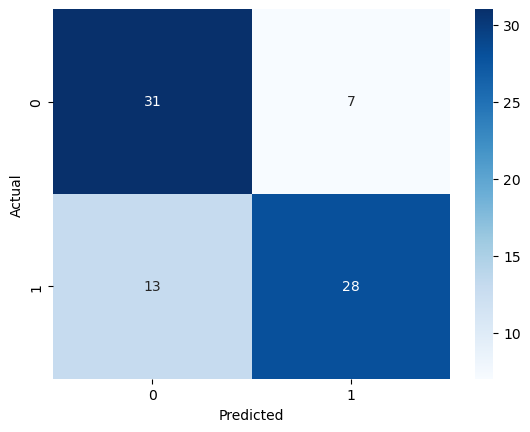


ROC AUC score: 0.75

Log loss: 8.74
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.75       0.73       36        
1          0.78       0.74       0.76       42        
macro avg  0.74       0.74       0.74       78        
weighted avg 0.75       0.74       0.74       78        

Confusion matrix:

[[27  9]
 [11 31]]


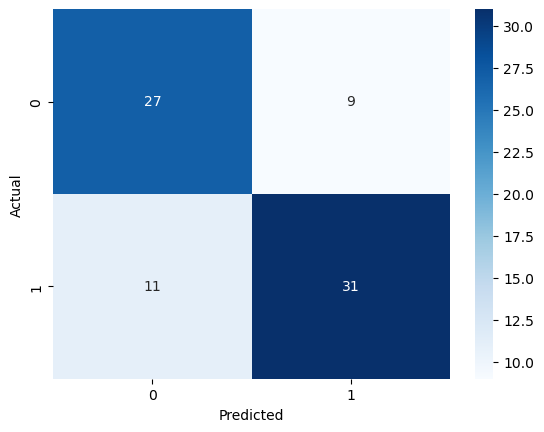


ROC AUC score: 0.74

Log loss: 8.86
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.70       0.76       40        
1          0.73       0.84       0.78       38        
macro avg  0.78       0.77       0.77       78        
weighted avg 0.78       0.77       0.77       78        

Confusion matrix:

[[28 12]
 [ 6 32]]


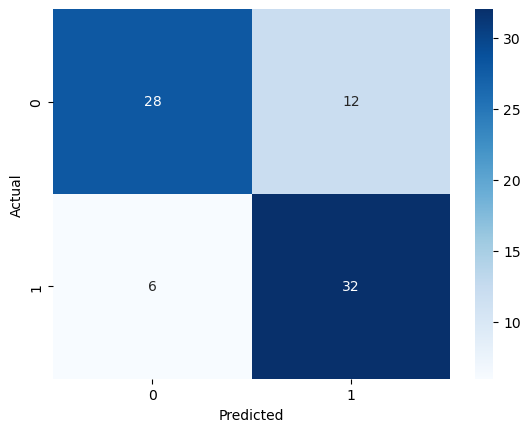


ROC AUC score: 0.77

Log loss: 7.97
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.81       0.75       36        
1          0.81       0.71       0.76       42        
macro avg  0.76       0.76       0.76       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[29  7]
 [12 30]]


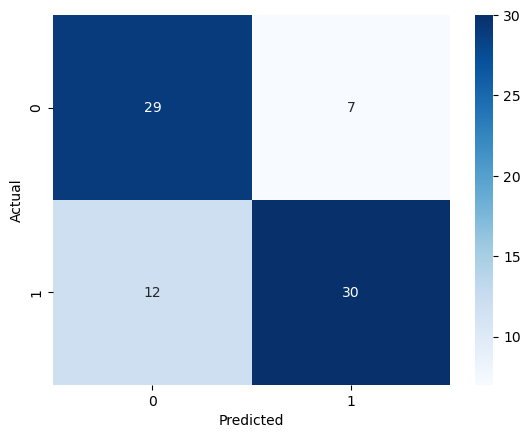


ROC AUC score: 0.76

Log loss: 8.41
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.90       0.82       39        
1          0.88       0.72       0.79       39        
macro avg  0.82       0.81       0.81       78        
weighted avg 0.82       0.81       0.81       78        

Confusion matrix:

[[35  4]
 [11 28]]


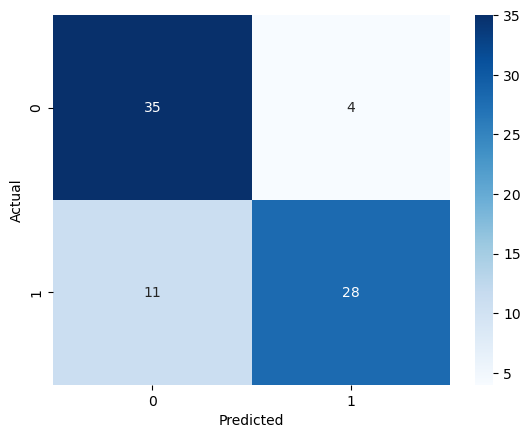


ROC AUC score: 0.81

Log loss: 6.64
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.72       0.76       43        
1          0.69       0.77       0.73       35        
macro avg  0.74       0.75       0.74       78        
weighted avg 0.75       0.74       0.74       78        

Confusion matrix:

[[31 12]
 [ 8 27]]


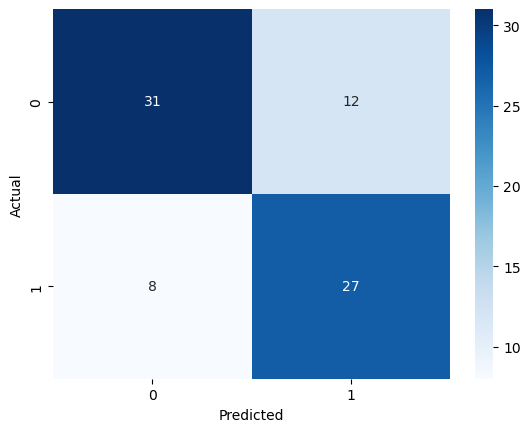


ROC AUC score: 0.75

Log loss: 8.86
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.67       0.74       0.70       43        
1          0.63       0.54       0.58       35        
macro avg  0.65       0.64       0.64       78        
weighted avg 0.65       0.65       0.65       78        

Confusion matrix:

[[32 11]
 [16 19]]


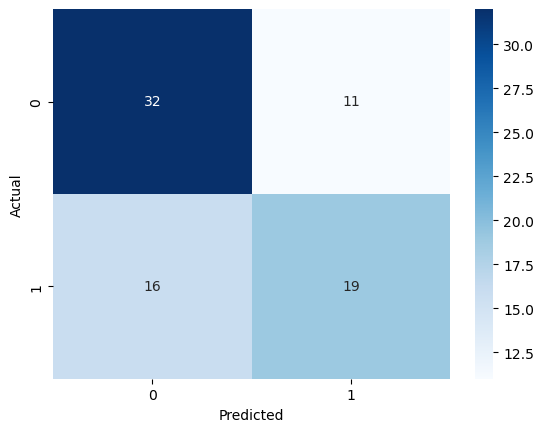


ROC AUC score: 0.64

Log loss: 11.96
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.81       0.77       36        
1          0.82       0.76       0.79       42        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.79       0.78       0.78       78        

Confusion matrix:

[[29  7]
 [10 32]]


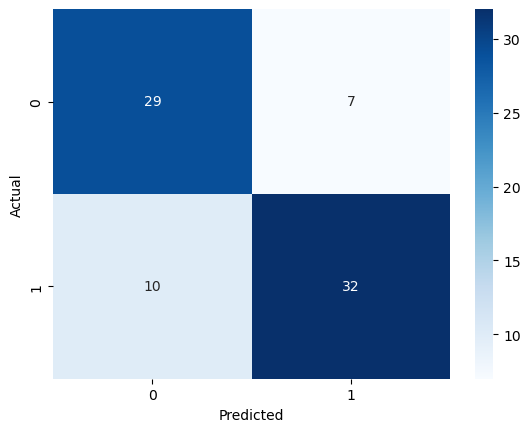


ROC AUC score: 0.78

Log loss: 7.53
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.90       0.68       0.78       41        
1          0.72       0.92       0.81       37        
macro avg  0.81       0.80       0.79       78        
weighted avg 0.82       0.79       0.79       78        

Confusion matrix:

[[28 13]
 [ 3 34]]


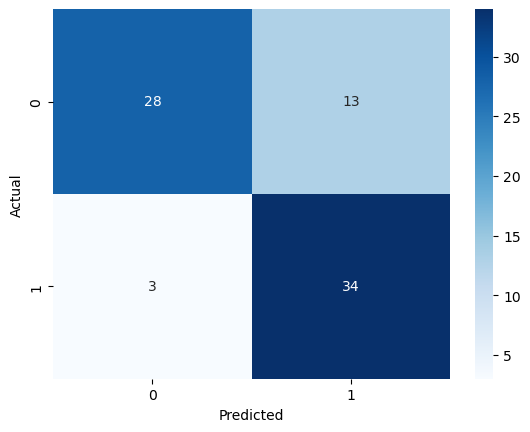


ROC AUC score: 0.80

Log loss: 7.09
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7377
Negative F1-score: 0.7480
Positive Recall: 0.7315
Negative Recall: 0.7589
Positive Precision: 0.7516
Negative Precision: 0.7449
Accuracy: 0.7444
ROC AUC Score: 0.7452


In [25]:
poly_feature = PolynomialFeatures(3)
poly_multi_feature = poly_feature.fit_transform(all_features)

poly_multi_model = sk.linear_model.LogisticRegression(C=100, penalty='l1', solver="saga", class_weight="balanced", max_iter=200)

training_util(poly_multi_model, poly_multi_feature, label, show_result=True, feature_imp=False)

---
### Analysis and conclusion

<ul>
    <li>As seen, there is no significant improvement in the metrics when Polynomial features are included, thus it is not worth complicating the model to increase performance in this situation, so we will move on to our next model.</li>
</ul>

---
### e) Random Forest


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.69       0.72       36        
1          0.76       0.81       0.79       43        
macro avg  0.76       0.75       0.76       79        
weighted avg 0.76       0.76       0.76       79        

Confusion matrix:

[[25 11]
 [ 8 35]]


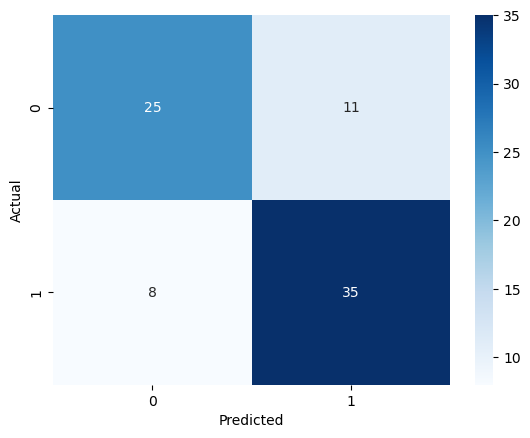


ROC AUC score: 0.75
Feature 0: 0.0629365233639068
Feature 1: 0.2752020550888067
Feature 2: 0.0042243079551414235
Feature 3: 0.052082261576350285
Feature 4: 0.10373985386211074
Feature 5: 0.22787838933755838
Feature 6: 0.1137172728521278
Feature 7: 0.1602193359639978
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.79       0.79       38        
1          0.80       0.80       0.80       41        
macro avg  0.80       0.80       0.80       79        
weighted avg 0.80       0.80       0.80       79        

Confusion matrix:

[[30  8]
 [ 8 33]]


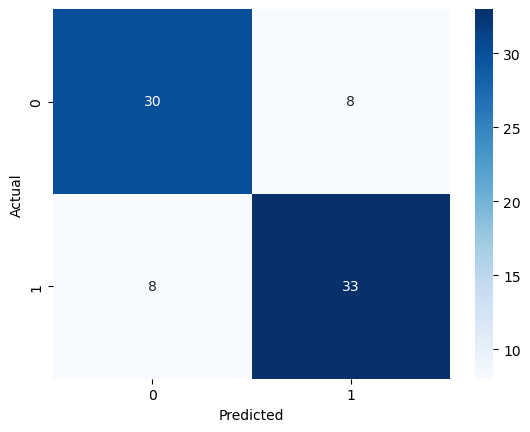


ROC AUC score: 0.80
Feature 0: 0.09363684173727492
Feature 1: 0.28817813773624434
Feature 2: 0.01843047024578457
Feature 3: 0.02389766453880288
Feature 4: 0.0841938390999036
Feature 5: 0.20122725759035068
Feature 6: 0.07196462856454859
Feature 7: 0.21847116048709048
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.69       0.84       0.76       37        
1          0.82       0.66       0.73       41        
macro avg  0.75       0.75       0.74       78        
weighted avg 0.76       0.74       0.74       78        

Confusion matrix:

[[31  6]
 [14 27]]


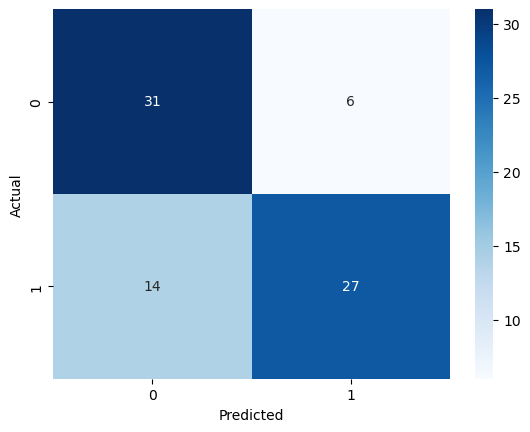


ROC AUC score: 0.75
Feature 0: 0.06653390454715749
Feature 1: 0.27931374264756353
Feature 2: 0.03518350043787636
Feature 3: 0.04458008393675548
Feature 4: 0.06650220328461981
Feature 5: 0.16110748862569793
Feature 6: 0.11067278822142335
Feature 7: 0.2361062882989061
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.66       0.70       38        
1          0.71       0.80       0.75       40        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[25 13]
 [ 8 32]]


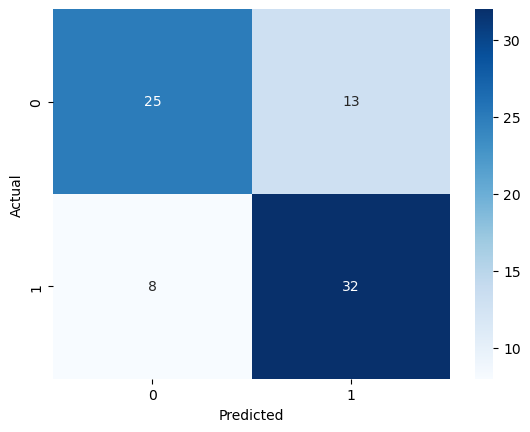


ROC AUC score: 0.73
Feature 0: 0.03502235960871006
Feature 1: 0.24195743791632257
Feature 2: 0.027579824925253734
Feature 3: 0.05422930064873192
Feature 4: 0.10637846242596785
Feature 5: 0.2545211513285494
Feature 6: 0.09421841701908498
Feature 7: 0.18609304612737954
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.72       0.75       39        
1          0.74       0.79       0.77       39        
macro avg  0.76       0.76       0.76       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[28 11]
 [ 8 31]]


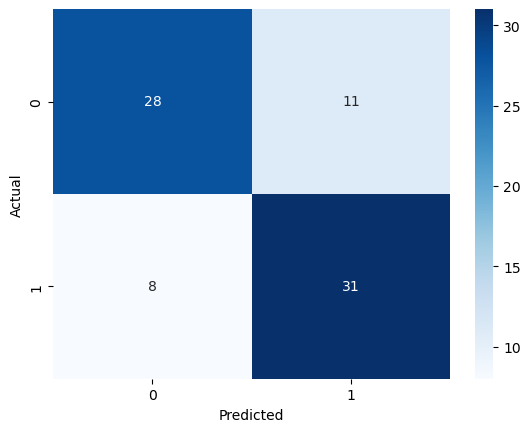


ROC AUC score: 0.76
Feature 0: 0.06117253175006499
Feature 1: 0.3132923205737784
Feature 2: 0.07796231824775139
Feature 3: 0.02316080281670918
Feature 4: 0.06036603419267928
Feature 5: 0.16637648571502703
Feature 6: 0.07069903515104953
Feature 7: 0.2269704715529401
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.86       0.77       0.81       39        
1          0.79       0.87       0.83       39        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.82       0.82       0.82       78        

Confusion matrix:

[[30  9]
 [ 5 34]]


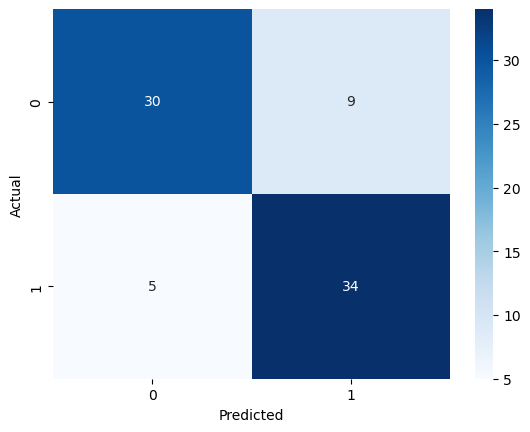


ROC AUC score: 0.82
Feature 0: 0.05940938693468961
Feature 1: 0.3525311832002032
Feature 2: 0.03672253498292652
Feature 3: 0.03303374164518517
Feature 4: 0.0863104794175054
Feature 5: 0.2012335359220679
Feature 6: 0.03279496941874172
Feature 7: 0.19796416847868045
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.77       0.73       0.75       41        
1          0.72       0.76       0.74       37        
macro avg  0.74       0.74       0.74       78        
weighted avg 0.74       0.74       0.74       78        

Confusion matrix:

[[30 11]
 [ 9 28]]


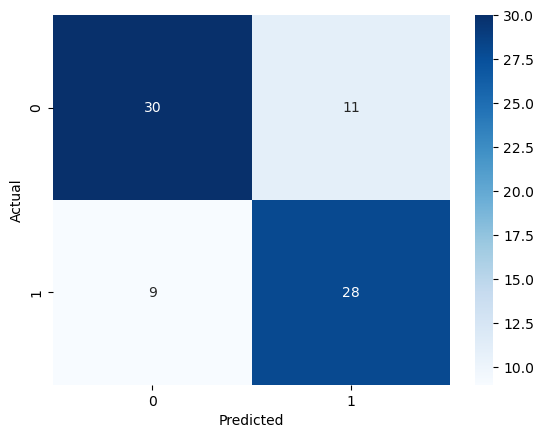


ROC AUC score: 0.74
Feature 0: 0.06195020095234556
Feature 1: 0.34535749976770136
Feature 2: 0.002789108895638061
Feature 3: 0.011509364494832855
Feature 4: 0.056251392022287725
Feature 5: 0.20213142056752414
Feature 6: 0.10324748939044756
Feature 7: 0.21676352390922277
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.82       0.80       39        
1          0.81       0.77       0.79       39        
macro avg  0.80       0.79       0.79       78        
weighted avg 0.80       0.79       0.79       78        

Confusion matrix:

[[32  7]
 [ 9 30]]


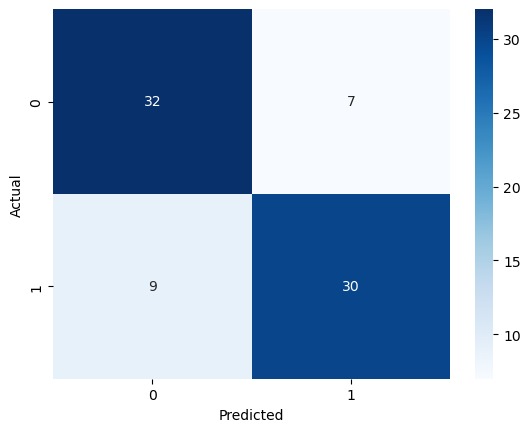


ROC AUC score: 0.79
Feature 0: 0.03510275770744627
Feature 1: 0.2706379497744745
Feature 2: 0.0029244665842492242
Feature 3: 0.01722846790509552
Feature 4: 0.11638626566039542
Feature 5: 0.2392295106690588
Feature 6: 0.09174620302723595
Feature 7: 0.22674437867204444
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.67       0.70       0.68       40        
1          0.67       0.63       0.65       38        
macro avg  0.67       0.67       0.67       78        
weighted avg 0.67       0.67       0.67       78        

Confusion matrix:

[[28 12]
 [14 24]]


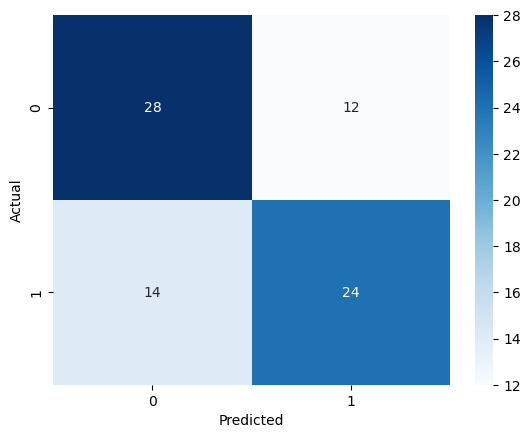


ROC AUC score: 0.67
Feature 0: 0.03835538190253464
Feature 1: 0.3709268936537374
Feature 2: 0.027184416086811308
Feature 3: 0.03094787333831663
Feature 4: 0.08455692594631432
Feature 5: 0.230948954694319
Feature 6: 0.0670883317316712
Feature 7: 0.14999122264629544
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.89       0.75       0.81       44        
1          0.73       0.88       0.80       34        
macro avg  0.81       0.82       0.81       78        
weighted avg 0.82       0.81       0.81       78        

Confusion matrix:

[[33 11]
 [ 4 30]]


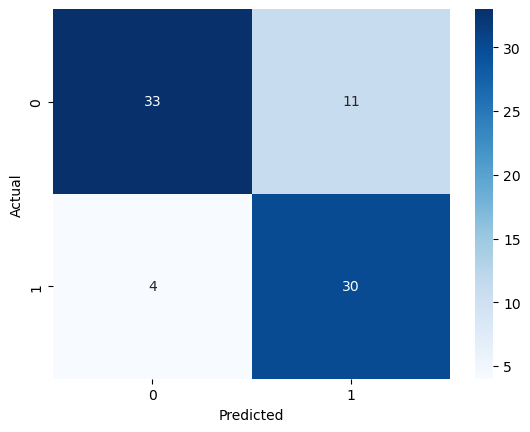


ROC AUC score: 0.82
Feature 0: 0.07634651586577214
Feature 1: 0.3434238148348585
Feature 2: 0.020980233754177728
Feature 3: 0.012609915610204015
Feature 4: 0.07166149043015628
Feature 5: 0.21967856434354752
Feature 6: 0.09671386819318104
Feature 7: 0.15858559696810284
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7644
Negative F1-score: 0.7580
Positive Recall: 0.7784
Negative Recall: 0.7469
Positive Precision: 0.7551
Negative Precision: 0.7737
Accuracy: 0.7621
ROC AUC Score: 0.7627


In [26]:
rf_model = RandomForestClassifier(ccp_alpha = 0.01, class_weight = "balanced", min_samples_split = 0.4)
training_util(rf_model, tree_all_features, label, tree=True, feature_imp=True, show_result=True, show_avg=True)

---
### Analysis and conclusion

<ul>
    <li>So far, Random Forest have the best averaged performance across all metrics with all metrics scoring high above 70 with one reaching 80%.</li>
    <li>F1s and ROC AUC average score are likewise much greater than the other, indicating that the positive/negative rate balance is maintained.</li>
    <li>Most notably, both positive recall and negative accuracy are reasonably good (low False Negative across all folds), which is the goal of this model.</li>
    <li>So far, Random Forest have the best averaged performance across all metrics with all metrics scoring high above 70 with one reaching 80%.</li>
</ul>
From the performance results from all models being evaluated, we can conclude that Random Forest and Logistics Regression with Multivariate features and L1 regularization are the top-performing models so far. It would be a good idea to focus on tuning and comparing these models to see which one performs the best. <br><br>
For Random Forest, we could try adjusting hyperparameters such as the number of trees, the maximum depth of each tree, and the number of features considered at each split. For Logistics Regression with Multivariate features and L1 regularization, we could try adjusting the regularization strength and the solver algorithm.

---
## IV - TUNING
We decided in the previous part that **Random Forest** and **L1, Multivariate, Logistic Regression** produce the best results among the models evaluated, thus these are the models we would utilize and aim to enhance by tuning.

---
### Applied Method

The tuning method employed in this case is Grid Search, which is an exhaustive algorithm. According to Gianluca Malato's paper, Grid Search tests every possible combination of parameter values and returns the best-performing combination[7]. If running Grid Search on all parameters simultaneously is computationally expensive, multiple Grid Searches will be performed on subsets of parameters. When the recommended values from Grid Search exhibit significant variations or do not enhance the model's performance compared to the default model, the range of tested parameters will be adjusted. To achieve this, a graph depicting the performance changes as the parameter value varies will be plotted.

### A) Tuning logistics regression
Tuning range

For Logistic Regression model, the following parameters are tunable (definition from sklearn documentation[8])
>**C** - Inverse of regularization strength, meaning that the smaller the value, the more penalized the model is.<br>
>**max_iter** - the maximum number of iterations taken for solvers to converge

In [34]:
# Define the range of lambda values for regularization strength
lambda_range = np.logspace(-5, 1, num=25)

# Define the range of C values which is the inverse of regularization strength
C_range = 1/lambda_range

# Define the range of maximum iterations
max_iter = np.arange(100, 1000, 50)

---
#### 1. Tuning C value


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.78       0.73       36        
1          0.79       0.70       0.74       43        
macro avg  0.74       0.74       0.73       79        
weighted avg 0.74       0.73       0.73       79        

Confusion matrix:

[[28  8]
 [13 30]]


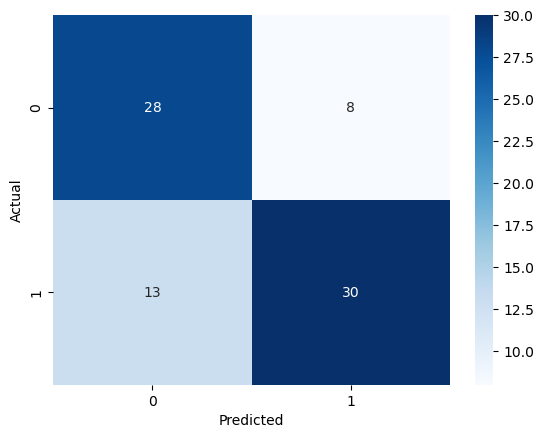


ROC AUC score: 0.74

Log loss: 9.18
best params:  {'C': 56234.1325190349}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.78       0.73       36        
1          0.79       0.70       0.74       43        
macro avg  0.74       0.74       0.73       79        
weighted avg 0.74       0.73       0.73       79        

Confusion matrix:

[[28  8]
 [13 30]]


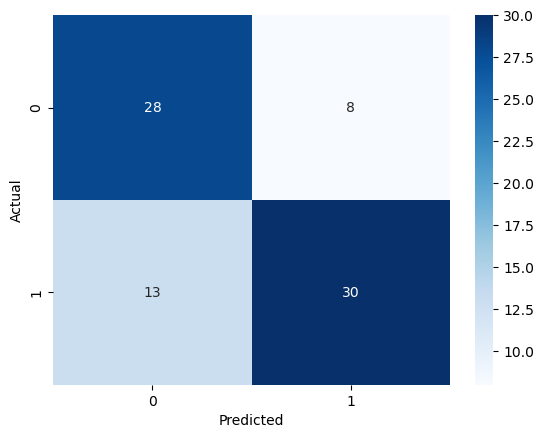


ROC AUC score: 0.74

Log loss: 9.18
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.71       0.75       42        
1          0.71       0.78       0.74       37        
macro avg  0.75       0.75       0.75       79        
weighted avg 0.75       0.75       0.75       79        

Confusion matrix:

[[30 12]
 [ 8 29]]


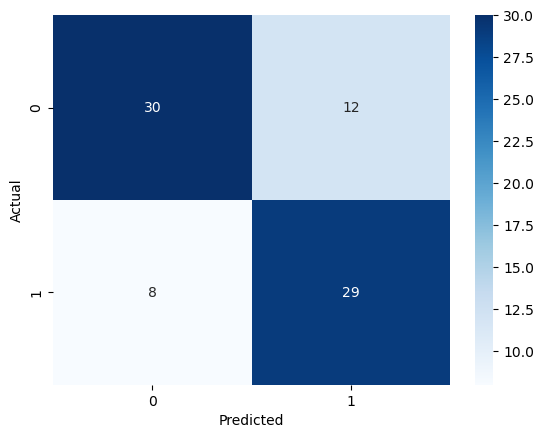


ROC AUC score: 0.75

Log loss: 8.74
best params:  {'C': 99999.99999999999}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.69       0.74       42        
1          0.70       0.81       0.75       37        
macro avg  0.75       0.75       0.75       79        
weighted avg 0.76       0.75       0.75       79        

Confusion matrix:

[[29 13]
 [ 7 30]]


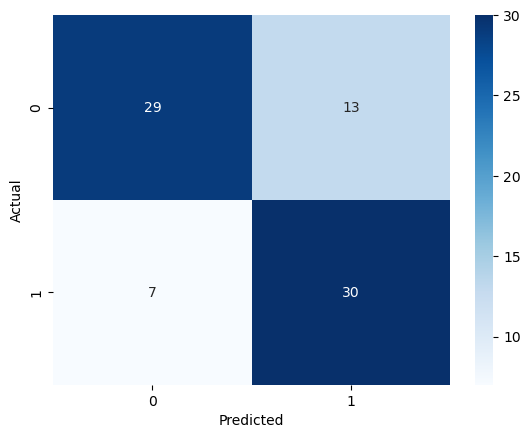


ROC AUC score: 0.75

Log loss: 8.74
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.84       0.80       0.82       40        
1          0.80       0.84       0.82       38        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.82       0.82       0.82       78        

Confusion matrix:

[[32  8]
 [ 6 32]]


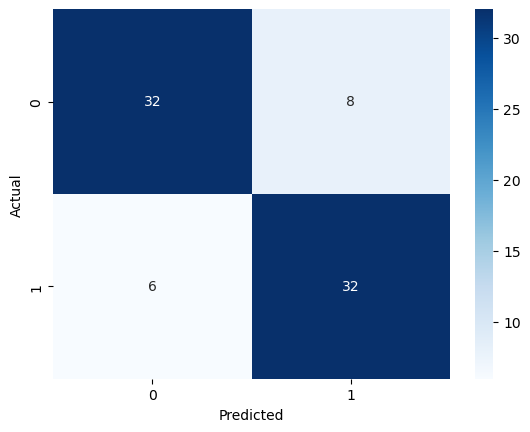


ROC AUC score: 0.82

Log loss: 6.20
best params:  {'C': 17782.79410038923}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.80       0.81       40        
1          0.79       0.82       0.81       38        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[32  8]
 [ 7 31]]


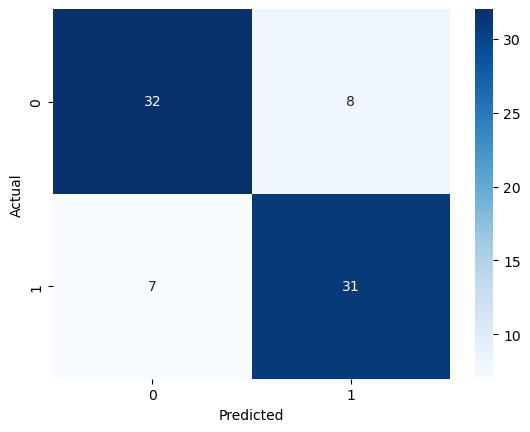


ROC AUC score: 0.81

Log loss: 6.64
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.86       0.82       36        
1          0.87       0.79       0.82       42        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.83       0.82       0.82       78        

Confusion matrix:

[[31  5]
 [ 9 33]]


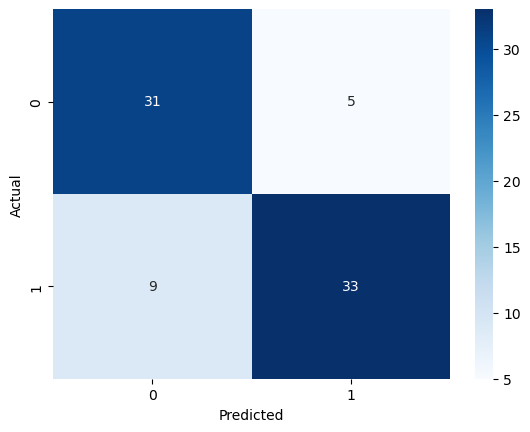


ROC AUC score: 0.82

Log loss: 6.20
best params:  {'C': 56234.1325190349}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.86       0.82       36        
1          0.87       0.79       0.82       42        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.83       0.82       0.82       78        

Confusion matrix:

[[31  5]
 [ 9 33]]


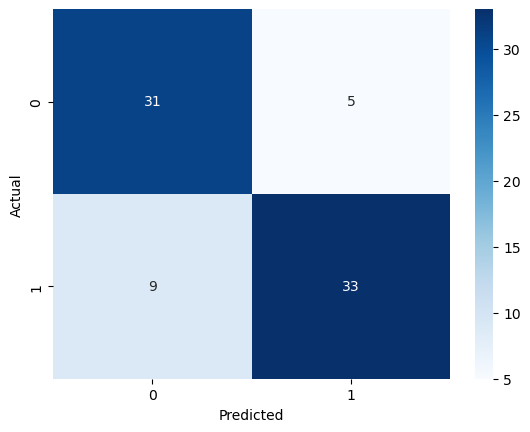


ROC AUC score: 0.82

Log loss: 6.20
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.76       0.72       42        
1          0.68       0.58       0.63       36        
macro avg  0.68       0.67       0.67       78        
weighted avg 0.68       0.68       0.68       78        

Confusion matrix:

[[32 10]
 [15 21]]


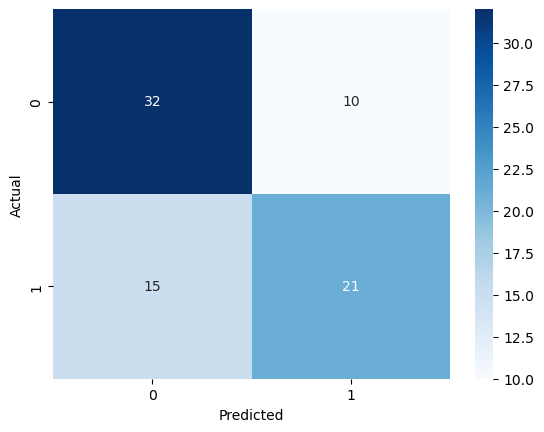


ROC AUC score: 0.67

Log loss: 11.07
best params:  {'C': 56.2341325190349}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.69       0.79       0.73       42        
1          0.70       0.58       0.64       36        
macro avg  0.69       0.68       0.68       78        
weighted avg 0.69       0.69       0.69       78        

Confusion matrix:

[[33  9]
 [15 21]]


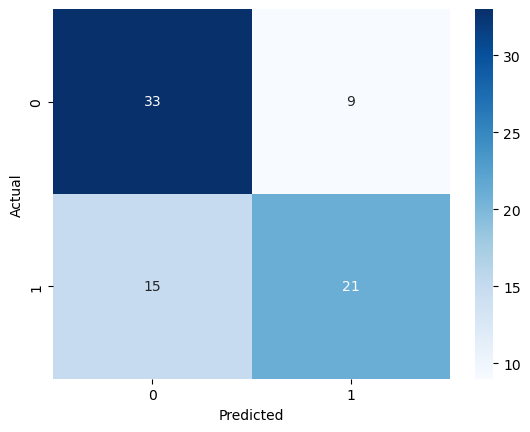


ROC AUC score: 0.68

Log loss: 10.63
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.77       0.80       39        
1          0.79       0.85       0.81       39        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[30  9]
 [ 6 33]]


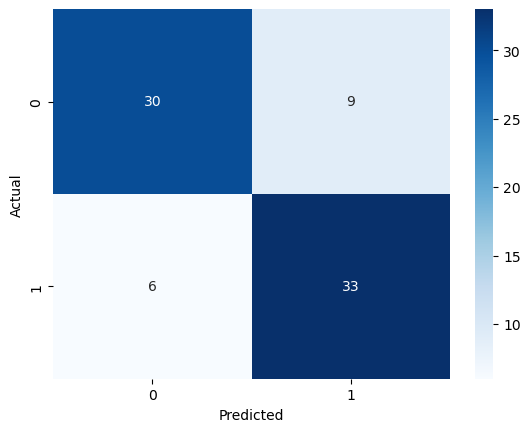


ROC AUC score: 0.81

Log loss: 6.64
best params:  {'C': 31.622776601683796}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.77       0.79       39        
1          0.78       0.82       0.80       39        
macro avg  0.80       0.79       0.79       78        
weighted avg 0.80       0.79       0.79       78        

Confusion matrix:

[[30  9]
 [ 7 32]]


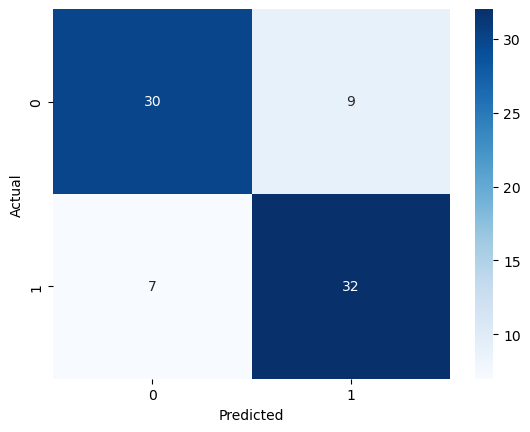


ROC AUC score: 0.79

Log loss: 7.08
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.76       0.77       41        
1          0.74       0.78       0.76       37        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[31 10]
 [ 8 29]]


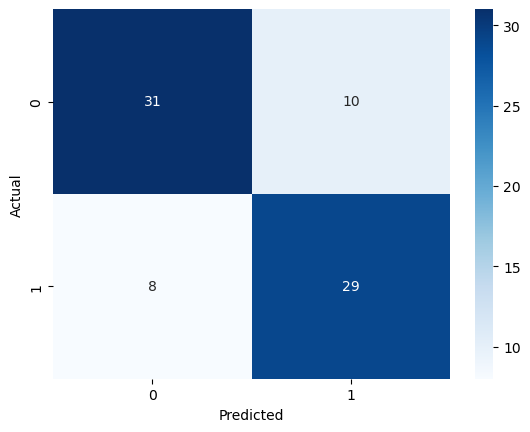


ROC AUC score: 0.77

Log loss: 7.97
best params:  {'C': 10.0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.76       0.78       41        
1          0.75       0.81       0.78       37        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[31 10]
 [ 7 30]]


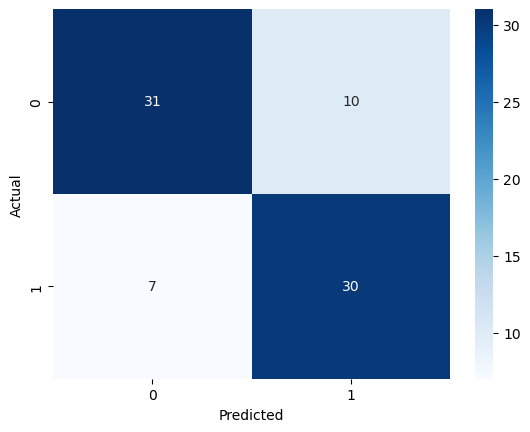


ROC AUC score: 0.78

Log loss: 7.53
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.64       0.79       0.71       38        
1          0.74       0.57       0.65       40        
macro avg  0.69       0.68       0.68       78        
weighted avg 0.69       0.68       0.68       78        

Confusion matrix:

[[30  8]
 [17 23]]


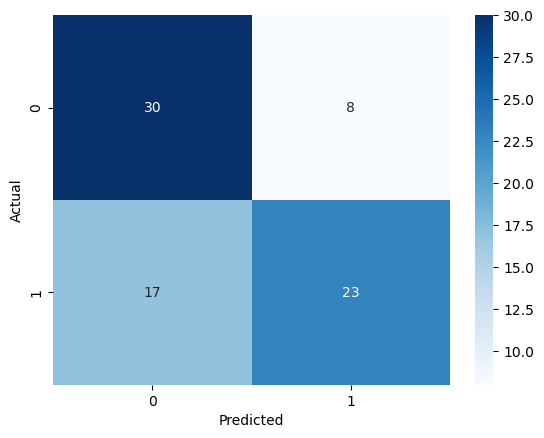


ROC AUC score: 0.68

Log loss: 11.07
best params:  {'C': 31.622776601683796}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.64       0.79       0.71       38        
1          0.74       0.57       0.65       40        
macro avg  0.69       0.68       0.68       78        
weighted avg 0.69       0.68       0.68       78        

Confusion matrix:

[[30  8]
 [17 23]]


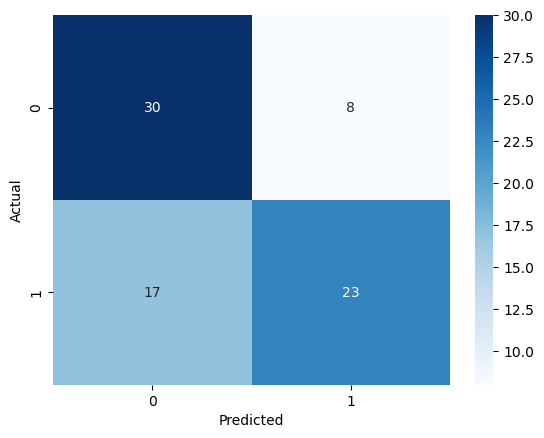


ROC AUC score: 0.68

Log loss: 11.07
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.79       0.80       42        
1          0.76       0.78       0.77       36        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[33  9]
 [ 8 28]]


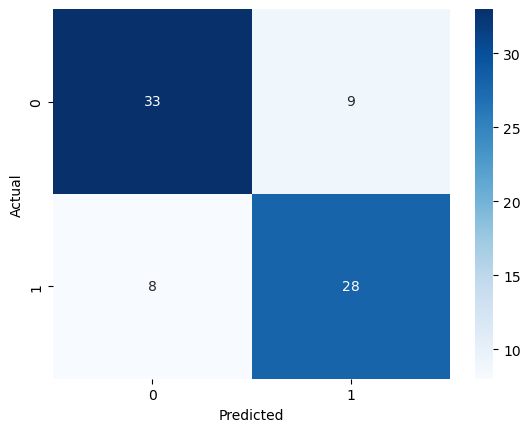


ROC AUC score: 0.78

Log loss: 7.53
best params:  {'C': 56.2341325190349}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.81       0.81       42        
1          0.78       0.78       0.78       36        
macro avg  0.79       0.79       0.79       78        
weighted avg 0.79       0.79       0.79       78        

Confusion matrix:

[[34  8]
 [ 8 28]]


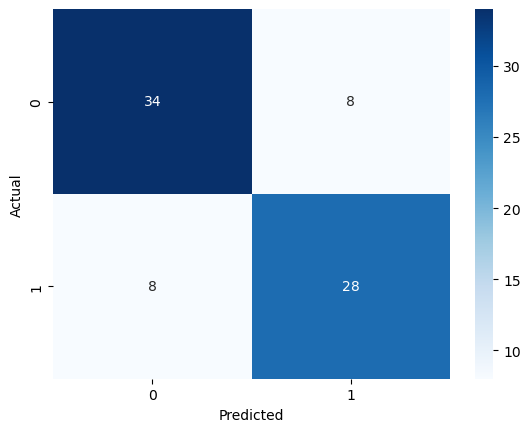


ROC AUC score: 0.79

Log loss: 7.08
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.61       0.71       0.66       35        
1          0.73       0.63       0.68       43        
macro avg  0.67       0.67       0.67       78        
weighted avg 0.68       0.67       0.67       78        

Confusion matrix:

[[25 10]
 [16 27]]


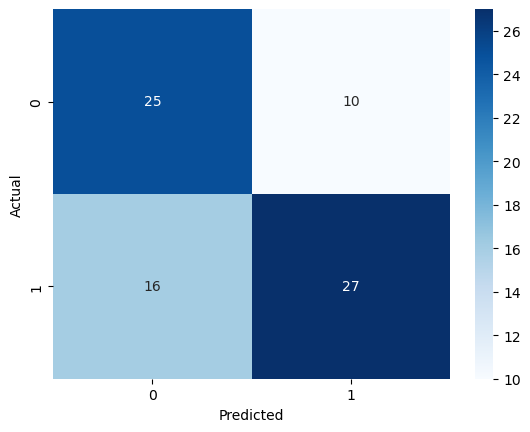


ROC AUC score: 0.67

Log loss: 11.51
best params:  {'C': 56.2341325190349}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.62       0.74       0.68       35        
1          0.75       0.63       0.68       43        
macro avg  0.68       0.69       0.68       78        
weighted avg 0.69       0.68       0.68       78        

Confusion matrix:

[[26  9]
 [16 27]]


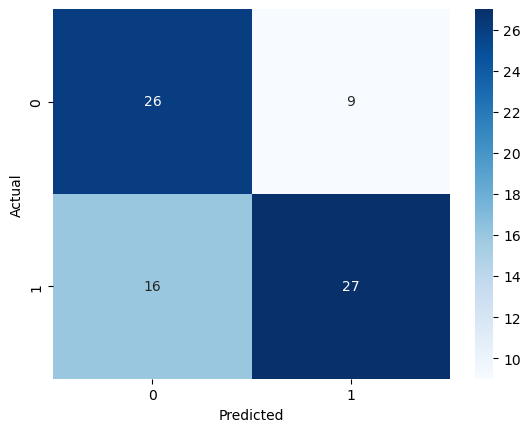


ROC AUC score: 0.69

Log loss: 11.07
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7425
Negative F1-score: 0.7567
Positive Recall: 0.7303
Negative Recall: 0.7730
Positive Precision: 0.7600
Negative Precision: 0.7451
Accuracy: 0.7507
ROC AUC Score: 0.7517


In [37]:
lr_model = sk.linear_model.LogisticRegression(C=100,penalty="l1", solver="saga", class_weight="balanced", max_iter=200)

param_range_map = {"C": C_range}

grid_search = sk.model_selection.GridSearchCV(lr_model, param_range_map)
training_util(lr_model, all_features, label, grid_search=grid_search, feature_imp=False, show_avg=True)

Looking at the proposed parameters, it appears that the suggested average C for most folds is approximately **41813.24**, therefore that is the number utilized.

---
#### 2. Choosing Max Iteration value


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.64       0.73       0.68       37        
1          0.73       0.64       0.68       42        
macro avg  0.69       0.69       0.68       79        
weighted avg 0.69       0.68       0.68       79        

Confusion matrix:

[[27 10]
 [15 27]]


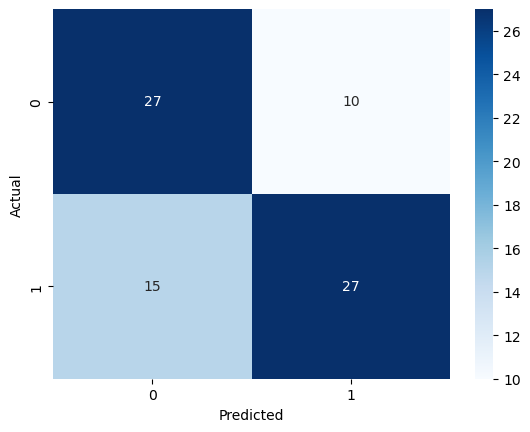


ROC AUC score: 0.69

Log loss: 10.93
best params:  {'max_iter': 200}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.64       0.73       0.68       37        
1          0.73       0.64       0.68       42        
macro avg  0.69       0.69       0.68       79        
weighted avg 0.69       0.68       0.68       79        

Confusion matrix:

[[27 10]
 [15 27]]


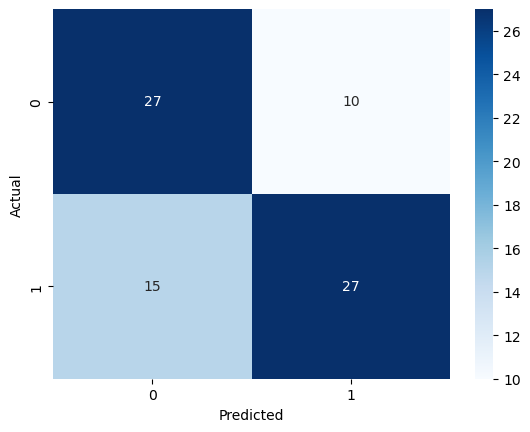


ROC AUC score: 0.69

Log loss: 10.93
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.86       0.69       0.77       45        
1          0.67       0.85       0.75       34        
macro avg  0.77       0.77       0.76       79        
weighted avg 0.78       0.76       0.76       79        

Confusion matrix:

[[31 14]
 [ 5 29]]


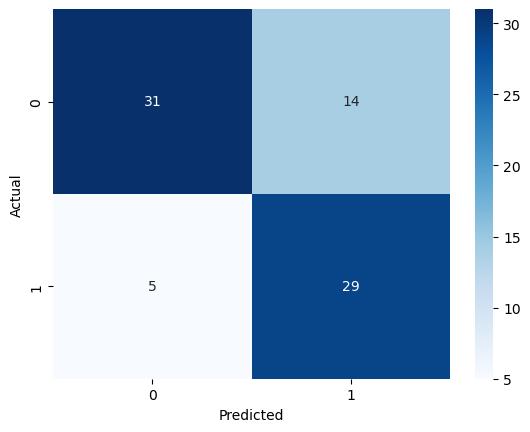


ROC AUC score: 0.77

Log loss: 8.31
best params:  {'max_iter': 600}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.86       0.69       0.77       45        
1          0.67       0.85       0.75       34        
macro avg  0.77       0.77       0.76       79        
weighted avg 0.78       0.76       0.76       79        

Confusion matrix:

[[31 14]
 [ 5 29]]


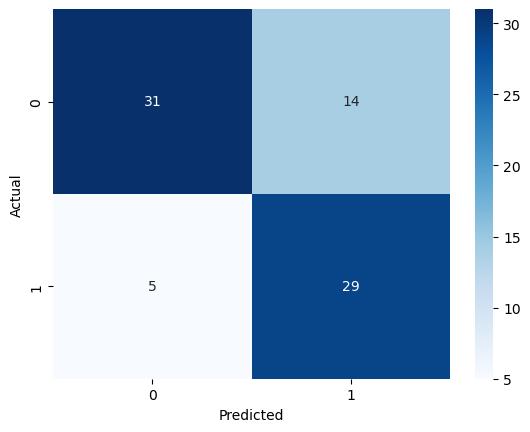


ROC AUC score: 0.77

Log loss: 8.31
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.71       0.75       42        
1          0.70       0.78       0.74       36        
macro avg  0.74       0.75       0.74       78        
weighted avg 0.75       0.74       0.74       78        

Confusion matrix:

[[30 12]
 [ 8 28]]


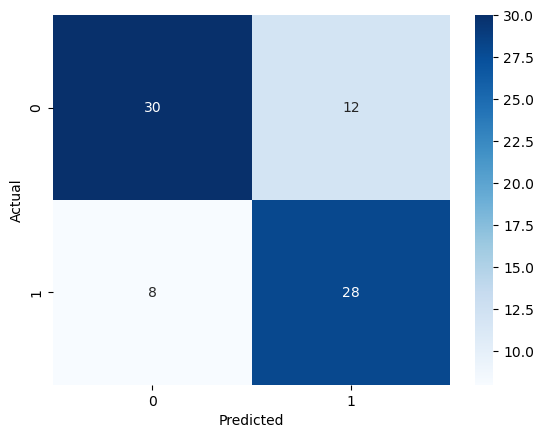


ROC AUC score: 0.75

Log loss: 8.86
best params:  {'max_iter': 150}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.69       0.73       42        
1          0.68       0.78       0.73       36        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.74       0.73       0.73       78        

Confusion matrix:

[[29 13]
 [ 8 28]]


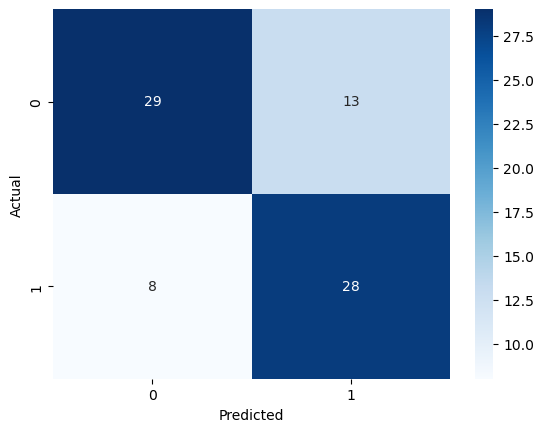


ROC AUC score: 0.73

Log loss: 9.30
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.70       0.69       37        
1          0.72       0.71       0.72       41        
macro avg  0.70       0.71       0.70       78        
weighted avg 0.71       0.71       0.71       78        

Confusion matrix:

[[26 11]
 [12 29]]


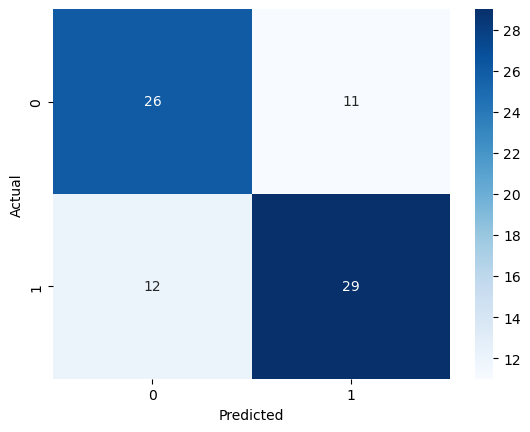


ROC AUC score: 0.71

Log loss: 10.18
best params:  {'max_iter': 250}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.70       0.69       37        
1          0.72       0.71       0.72       41        
macro avg  0.70       0.71       0.70       78        
weighted avg 0.71       0.71       0.71       78        

Confusion matrix:

[[26 11]
 [12 29]]


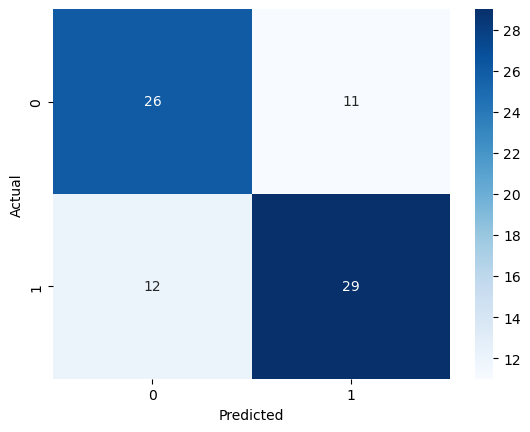


ROC AUC score: 0.71

Log loss: 10.18
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.76       0.72       37        
1          0.76       0.68       0.72       41        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[28  9]
 [13 28]]


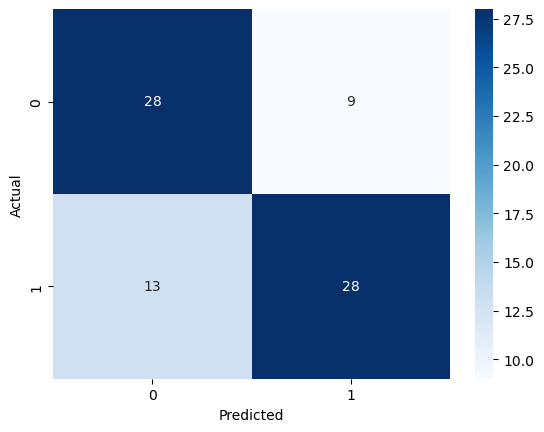


ROC AUC score: 0.72

Log loss: 9.74
best params:  {'max_iter': 300}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.68       0.76       0.72       37        
1          0.76       0.68       0.72       41        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[28  9]
 [13 28]]


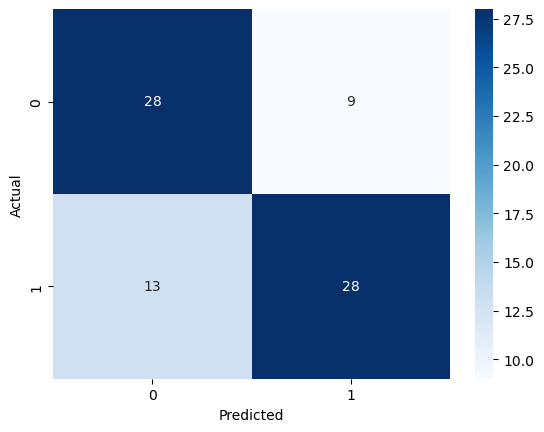


ROC AUC score: 0.72

Log loss: 9.74
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.90       0.85       42        
1          0.87       0.75       0.81       36        
macro avg  0.84       0.83       0.83       78        
weighted avg 0.84       0.83       0.83       78        

Confusion matrix:

[[38  4]
 [ 9 27]]


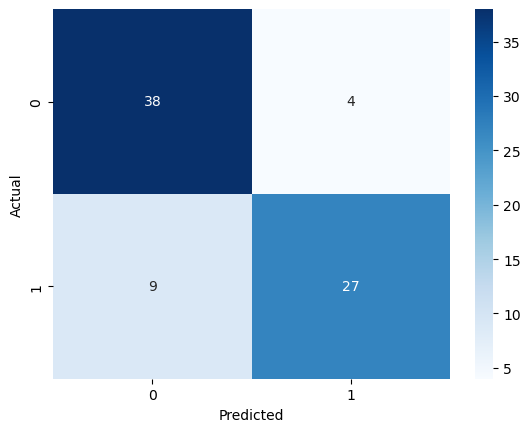


ROC AUC score: 0.83

Log loss: 5.76
best params:  {'max_iter': 200}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.90       0.85       42        
1          0.87       0.75       0.81       36        
macro avg  0.84       0.83       0.83       78        
weighted avg 0.84       0.83       0.83       78        

Confusion matrix:

[[38  4]
 [ 9 27]]


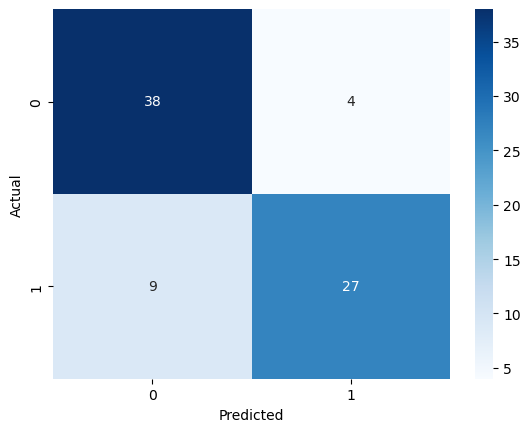


ROC AUC score: 0.83

Log loss: 5.76
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.76       0.74       42        
1          0.71       0.67       0.69       36        
macro avg  0.72       0.71       0.71       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[32 10]
 [12 24]]


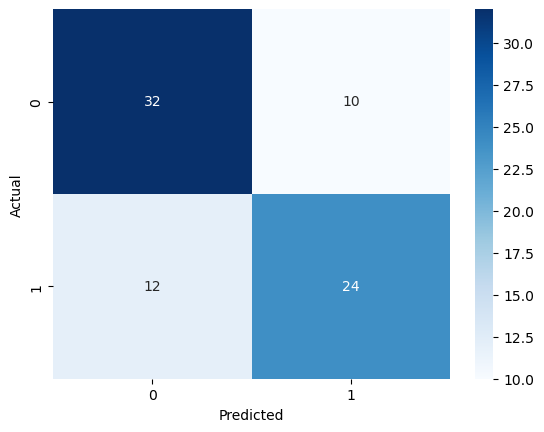


ROC AUC score: 0.71

Log loss: 9.74
best params:  {'max_iter': 200}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.76       0.74       42        
1          0.71       0.67       0.69       36        
macro avg  0.72       0.71       0.71       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[32 10]
 [12 24]]


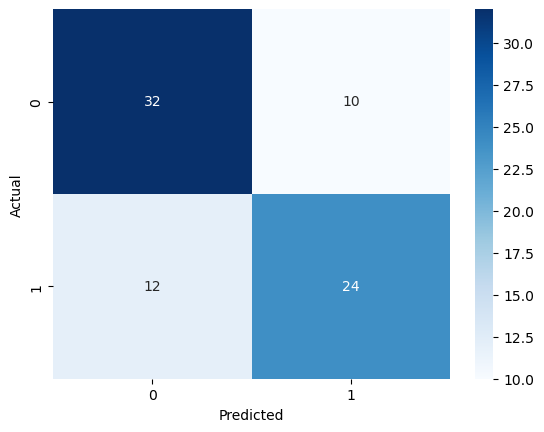


ROC AUC score: 0.71

Log loss: 9.74
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.81       0.76       36        
1          0.82       0.74       0.78       42        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[29  7]
 [11 31]]


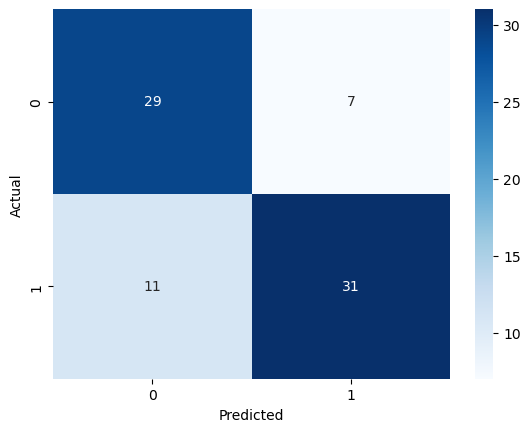


ROC AUC score: 0.77

Log loss: 7.97
best params:  {'max_iter': 400}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.81       0.76       36        
1          0.82       0.74       0.78       42        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[29  7]
 [11 31]]


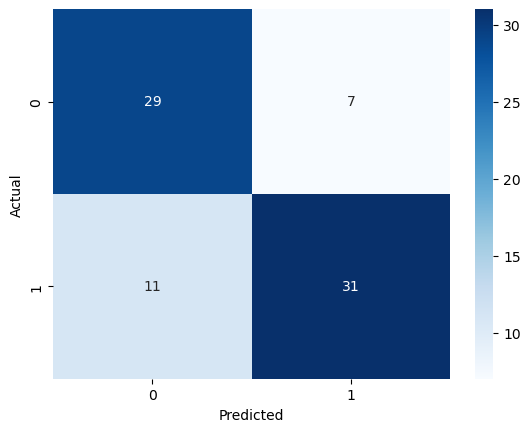


ROC AUC score: 0.77

Log loss: 7.97
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.78       0.79       37        
1          0.81       0.83       0.82       41        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[29  8]
 [ 7 34]]


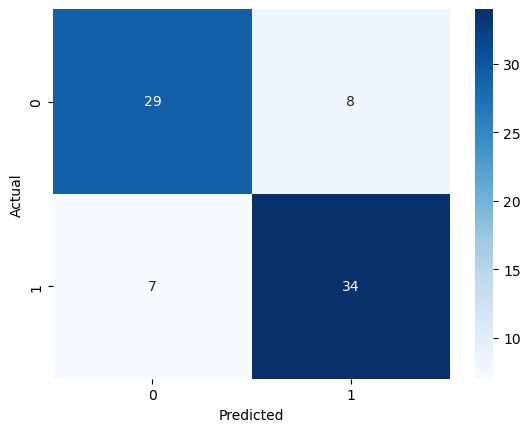


ROC AUC score: 0.81

Log loss: 6.64
best params:  {'max_iter': 250}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.78       0.79       37        
1          0.81       0.83       0.82       41        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[29  8]
 [ 7 34]]


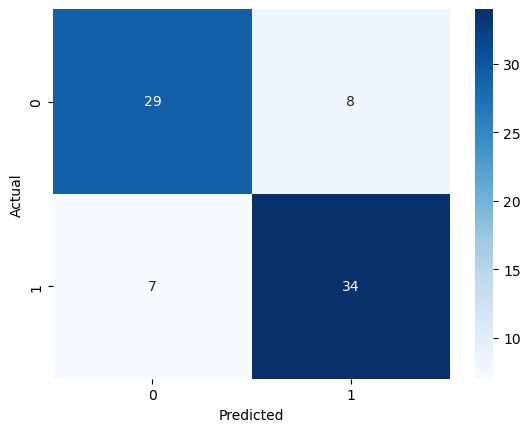


ROC AUC score: 0.81

Log loss: 6.64
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.83       0.77       36        
1          0.83       0.71       0.77       42        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.78       0.77       0.77       78        

Confusion matrix:

[[30  6]
 [12 30]]


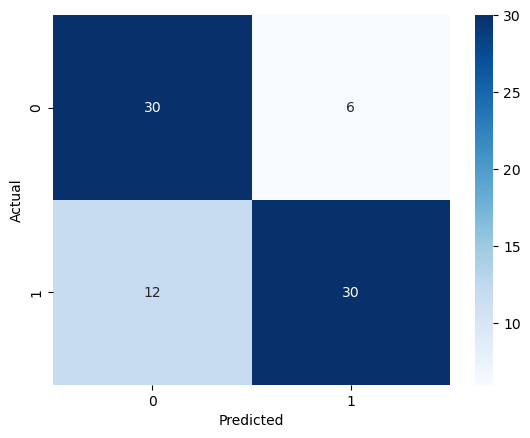


ROC AUC score: 0.77

Log loss: 7.97
best params:  {'max_iter': 400}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.86       0.78       36        
1          0.85       0.69       0.76       42        
macro avg  0.78       0.78       0.77       78        
weighted avg 0.78       0.77       0.77       78        

Confusion matrix:

[[31  5]
 [13 29]]


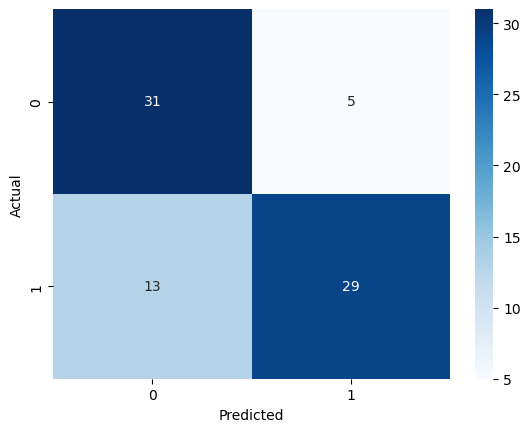


ROC AUC score: 0.78

Log loss: 7.97
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7463
Negative F1-score: 0.7535
Positive Recall: 0.7362
Negative Recall: 0.7682
Positive Precision: 0.7621
Negative Precision: 0.7441
Accuracy: 0.7507
ROC AUC Score: 0.7522


In [38]:
lr_model = sk.linear_model.LogisticRegression(C=41813.24,penalty="l1", solver="saga", class_weight="balanced", max_iter=200)

param_range_map = {"max_iter": max_iter}

grid_search = sk.model_selection.GridSearchCV(lr_model,param_range_map)
training_util(lr_model, all_features, label, grid_search=grid_search, feature_imp=False, show_avg=True)

### Analysis and conclusion

There are little to no differences in the results of the tuned model (optimal model) and the model without tuning (default model). As a result, in this example, it is possible to conclude that the model's performance is the best in the iteration range of 100 - 350. 350 is used to ensure that all coefficients converge.

---
#### 3. Evaluate finalized Logistic Regression model

We will be using **41813.24** for C, and **350** for max_iter.


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.67       0.73       43        
1          0.67       0.81       0.73       36        
macro avg  0.74       0.74       0.73       79        
weighted avg 0.75       0.73       0.73       79        

Confusion matrix:

[[29 14]
 [ 7 29]]


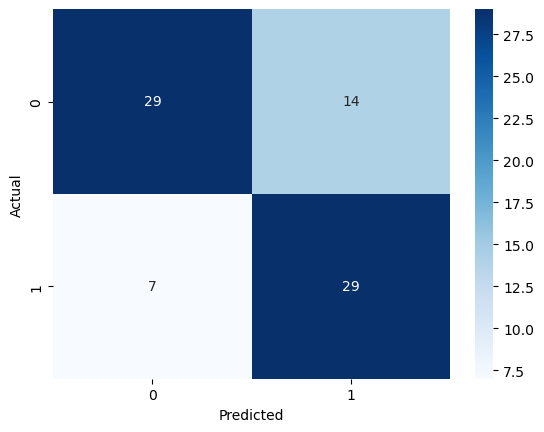


ROC AUC score: 0.74

Log loss: 9.18
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.71       0.75       45        
1          0.67       0.76       0.71       34        
macro avg  0.73       0.74       0.73       79        
weighted avg 0.74       0.73       0.74       79        

Confusion matrix:

[[32 13]
 [ 8 26]]


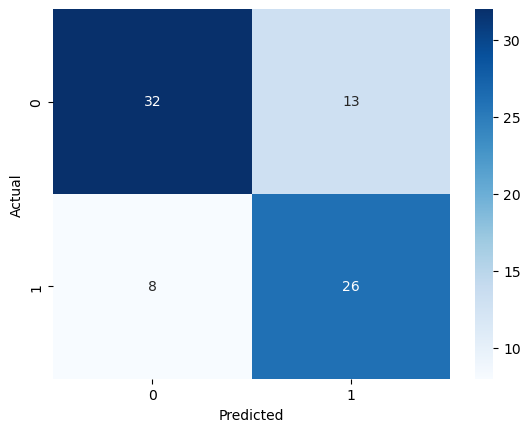


ROC AUC score: 0.74

Log loss: 9.18
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.76       0.74       42        
1          0.70       0.64       0.67       36        
macro avg  0.70       0.70       0.70       78        
weighted avg 0.70       0.71       0.70       78        

Confusion matrix:

[[32 10]
 [13 23]]


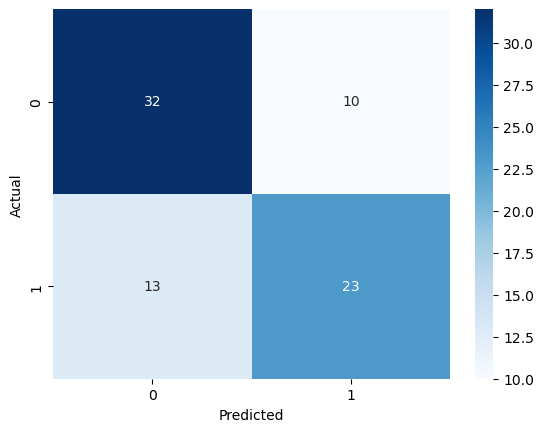


ROC AUC score: 0.70

Log loss: 10.18
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.87       0.85       47        
1          0.79       0.71       0.75       31        
macro avg  0.80       0.79       0.80       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[41  6]
 [ 9 22]]


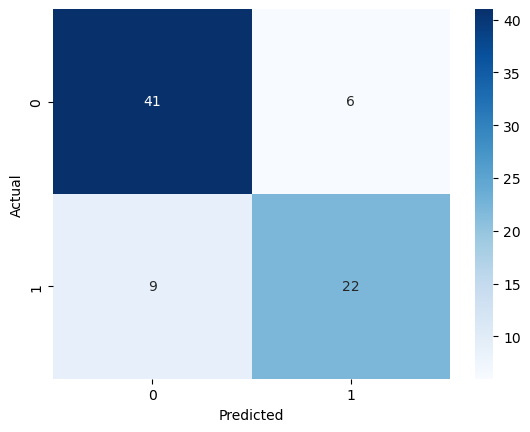


ROC AUC score: 0.79

Log loss: 6.64
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.66       0.79       0.72       34        
1          0.81       0.68       0.74       44        
macro avg  0.73       0.74       0.73       78        
weighted avg 0.74       0.73       0.73       78        

Confusion matrix:

[[27  7]
 [14 30]]


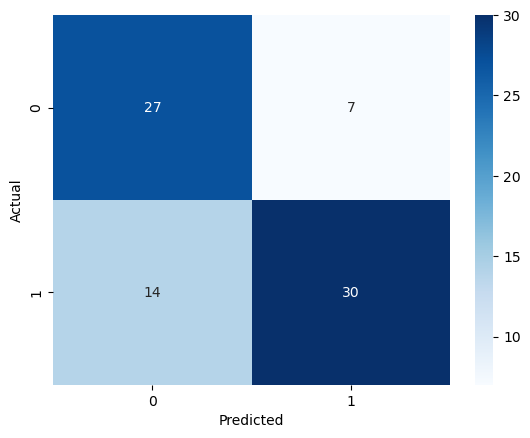


ROC AUC score: 0.74

Log loss: 9.30
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.74       0.74       34        
1          0.80       0.80       0.80       44        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[25  9]
 [ 9 35]]


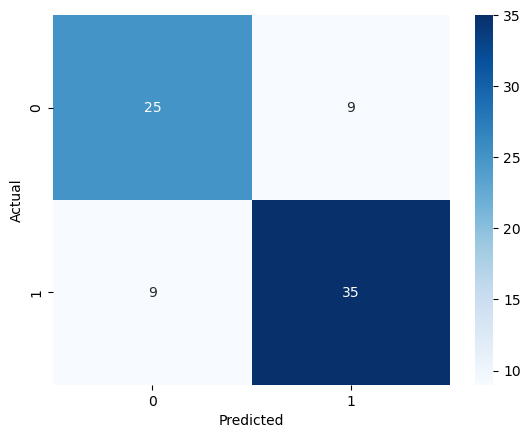


ROC AUC score: 0.77

Log loss: 7.97
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.67       0.74       0.70       35        
1          0.77       0.70       0.73       43        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.72       0.72       0.72       78        

Confusion matrix:

[[26  9]
 [13 30]]


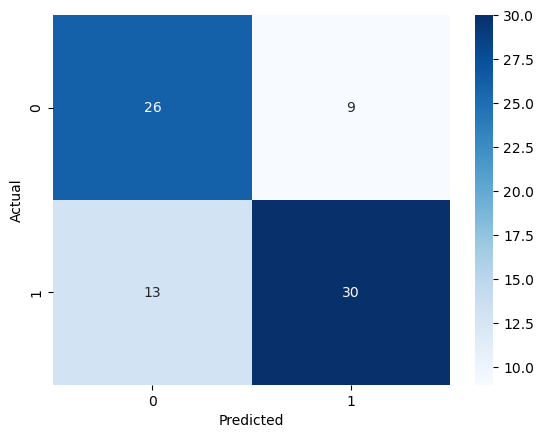


ROC AUC score: 0.72

Log loss: 9.74
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.83       0.81       36        
1          0.85       0.81       0.83       42        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.82       0.82       0.82       78        

Confusion matrix:

[[30  6]
 [ 8 34]]


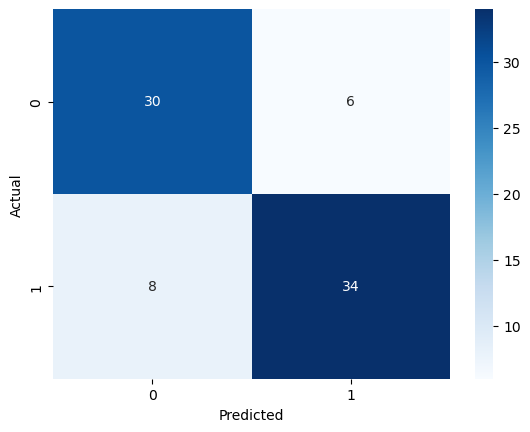


ROC AUC score: 0.82

Log loss: 6.20
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.65       0.75       0.70       32        
1          0.80       0.72       0.76       46        
macro avg  0.73       0.73       0.73       78        
weighted avg 0.74       0.73       0.73       78        

Confusion matrix:

[[24  8]
 [13 33]]


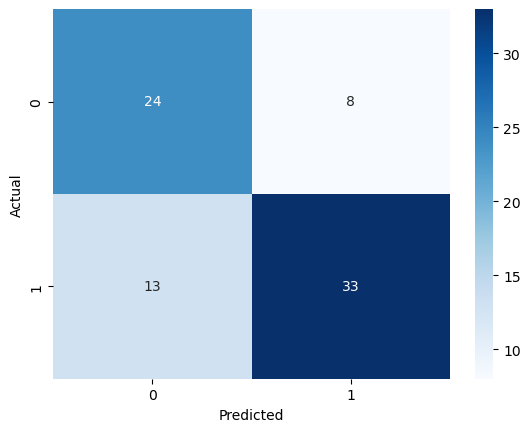


ROC AUC score: 0.73

Log loss: 9.30
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.79       0.80       43        
1          0.75       0.77       0.76       35        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[34  9]
 [ 8 27]]


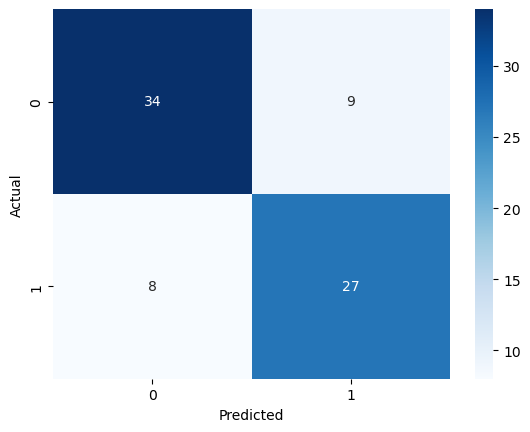


ROC AUC score: 0.78

Log loss: 7.53
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7475
Negative F1-score: 0.7533
Positive Recall: 0.7392
Negative Recall: 0.7666
Positive Precision: 0.7604
Negative Precision: 0.7445
Accuracy: 0.7532
ROC AUC Score: 0.7529


In [40]:
lr_model = sk.linear_model.LogisticRegression(max_iter= 350, C= 41813.24, class_weight = "balanced", 
                                              solver="saga", penalty="l1")

training_util(lr_model, all_features, label, feature_imp=False)

### Analysis and conclusion

<ul>
    <li>According to the results, the optimized model regularly outperformed the non-optimized model, as demonstrated by slightly higher F1-scores, AUC scores, and significantly smaller log losses. According to the confusion matrices, the improved model had less false positives and false negatives, which is normally desired in a classification task.</li>
    <li>Nonetheless, it's worth noting that the changes in performance between the two models are minor, and in several circumstances, the non-optimized model outperformed the optimized one (e.g., in fold 1 for precision of class 0). As a result, the variations in performance between the two models might be attributed to chance rather than statistical significance.</li>
    <li>Overall, it appears that hyperparameter optimization can lead to minor improvements in model performance, while the effect may be small, and the ideal hyperparameters may vary depending on the dataset and issue.</li>
</ul>

Even with tuned values, although the metrics are slightly higher, Logistic Regression cannot outperform untuned Random Forest (particularly when the values are maximal recall for positive and accuracy for negative). As a result, we are quite likely to use Random Forest as the final model for this problem.

---
### B) Tuning Random Forest
Tuning range

For Random Forest we can tune the following parameters (definition from sklearn documentation [9])
>**cpp_alpha** - Complexity parameter used for Minimal Cost-Complexity Pruning.<br>
**min_impurity_decrease** - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.<br>
**max_depth** - maximum depth of each tree<br>
**min_samples_split** - min number of samples needed to split a node<br>
**min_samples_leaf** - min number of samples required to be at leaf node

We will also be setting the n_estimator to 20 to improve tuning efficiency.

In [42]:
alpha_range = [0, 0.001, 0.01, 0.1]
max_depth = np.arange(1,101,1)
# Test out both int value and float values
min_samples_split = [2, 5, 10, 0.01, 0.05, 0.1, 0.2]
min_samples_leaf = [1, 2, 5, 10, 0.01, 0.05, 0.1, 0.2]
min_impurity_decrease = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

---
#### 1. Tuning ccp_alpha and min_impurity_decrease


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.85       0.84       47        
1          0.77       0.75       0.76       32        
macro avg  0.80       0.80       0.80       79        
weighted avg 0.81       0.81       0.81       79        

Confusion matrix:

[[40  7]
 [ 8 24]]


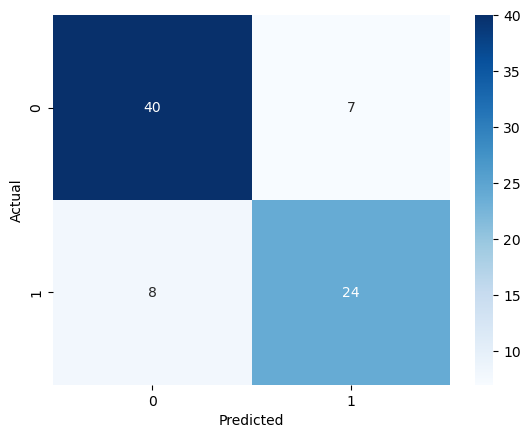


ROC AUC score: 0.80
best params:  {'ccp_alpha': 0.001, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.85       0.83       47        
1          0.77       0.72       0.74       32        
macro avg  0.79       0.78       0.79       79        
weighted avg 0.80       0.80       0.80       79        

Confusion matrix:

[[40  7]
 [ 9 23]]


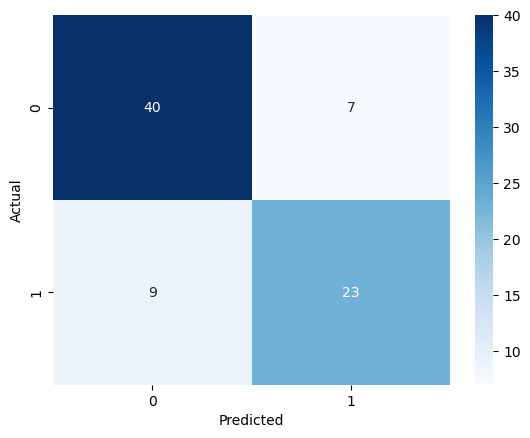


ROC AUC score: 0.78
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.64       0.71       45        
1          0.62       0.76       0.68       34        
macro avg  0.70       0.70       0.70       79        
weighted avg 0.71       0.70       0.70       79        

Confusion matrix:

[[29 16]
 [ 8 26]]


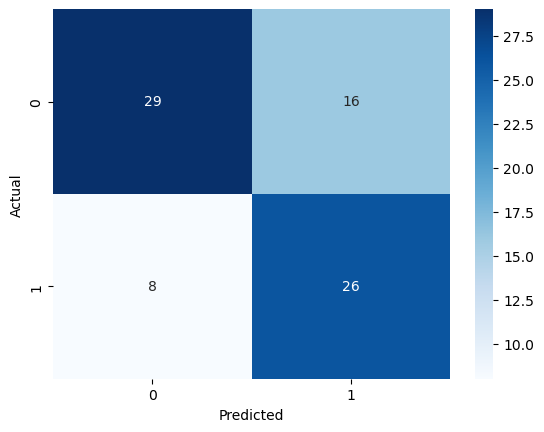


ROC AUC score: 0.70
best params:  {'ccp_alpha': 0, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.71       0.75       45        
1          0.67       0.76       0.71       34        
macro avg  0.73       0.74       0.73       79        
weighted avg 0.74       0.73       0.74       79        

Confusion matrix:

[[32 13]
 [ 8 26]]


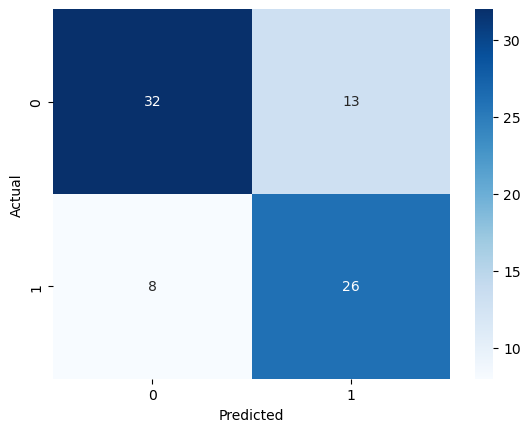


ROC AUC score: 0.74
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.66       0.79       0.72       39        
1          0.74       0.59       0.66       39        
macro avg  0.70       0.69       0.69       78        
weighted avg 0.70       0.69       0.69       78        

Confusion matrix:

[[31  8]
 [16 23]]


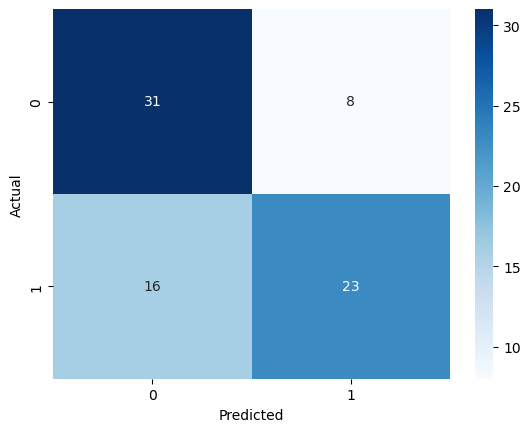


ROC AUC score: 0.69
best params:  {'ccp_alpha': 0, 'min_impurity_decrease': 0.001}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.74       0.76       39        
1          0.76       0.79       0.77       39        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[29 10]
 [ 8 31]]


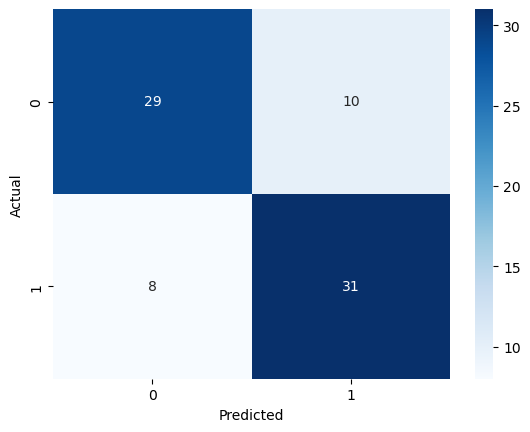


ROC AUC score: 0.77
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.76       0.75       38        
1          0.77       0.75       0.76       40        
macro avg  0.76       0.76       0.76       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[29  9]
 [10 30]]


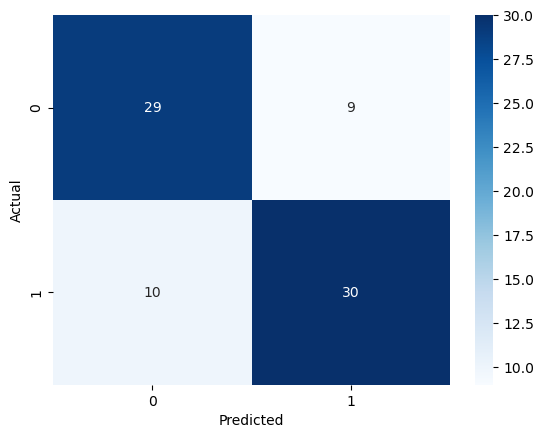


ROC AUC score: 0.76
best params:  {'ccp_alpha': 0.001, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.82       0.78       38        
1          0.81       0.75       0.78       40        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[31  7]
 [10 30]]


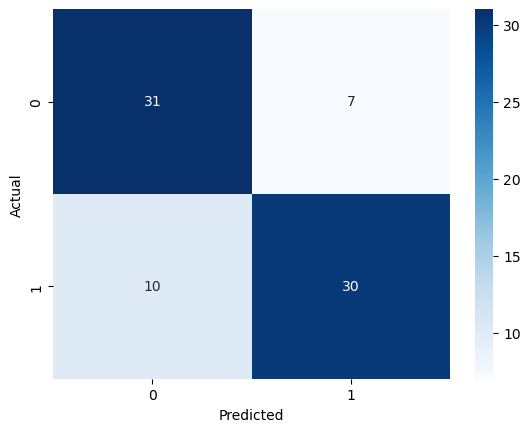


ROC AUC score: 0.78
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.84       0.82       0.83       38        
1          0.83       0.85       0.84       40        
macro avg  0.83       0.83       0.83       78        
weighted avg 0.83       0.83       0.83       78        

Confusion matrix:

[[31  7]
 [ 6 34]]


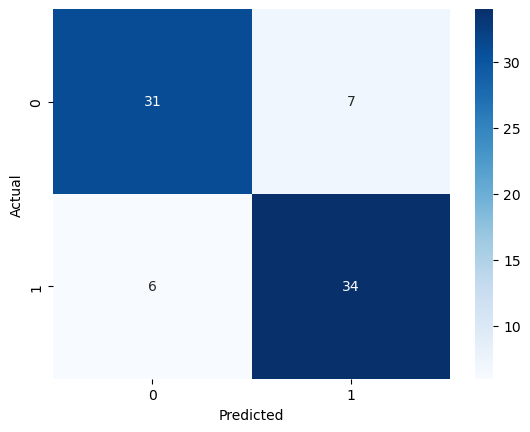


ROC AUC score: 0.83
best params:  {'ccp_alpha': 0, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.86       0.84       0.85       38        
1          0.85       0.88       0.86       40        
macro avg  0.86       0.86       0.86       78        
weighted avg 0.86       0.86       0.86       78        

Confusion matrix:

[[32  6]
 [ 5 35]]


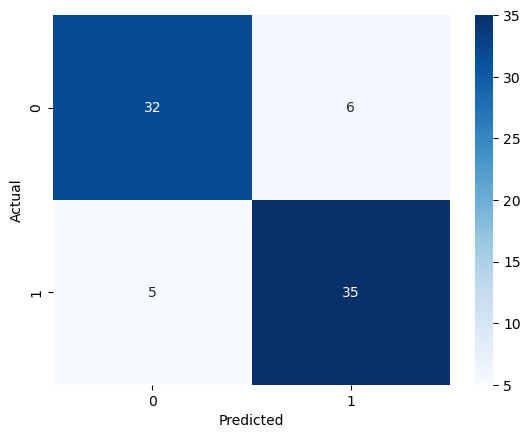


ROC AUC score: 0.86
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.87       0.75       0.80       44        
1          0.72       0.85       0.78       34        
macro avg  0.80       0.80       0.79       78        
weighted avg 0.81       0.79       0.80       78        

Confusion matrix:

[[33 11]
 [ 5 29]]


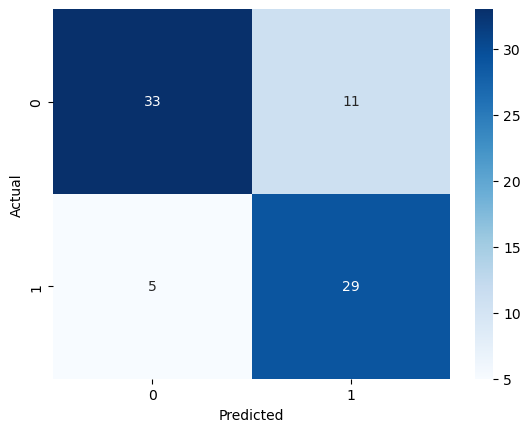


ROC AUC score: 0.80
best params:  {'ccp_alpha': 0, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.88       0.80       0.83       44        
1          0.76       0.85       0.81       34        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.83       0.82       0.82       78        

Confusion matrix:

[[35  9]
 [ 5 29]]


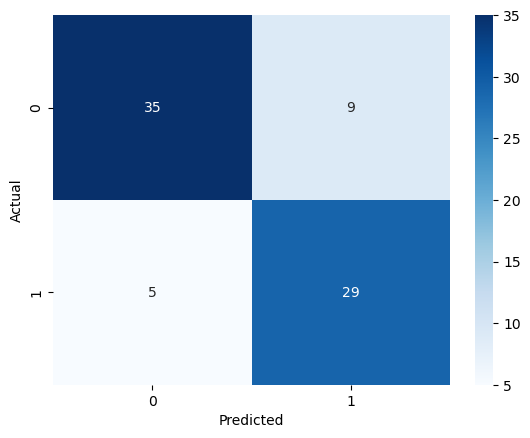


ROC AUC score: 0.82
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.69       0.69       0.69       32        
1          0.78       0.78       0.78       46        
macro avg  0.74       0.74       0.74       78        
weighted avg 0.74       0.74       0.74       78        

Confusion matrix:

[[22 10]
 [10 36]]


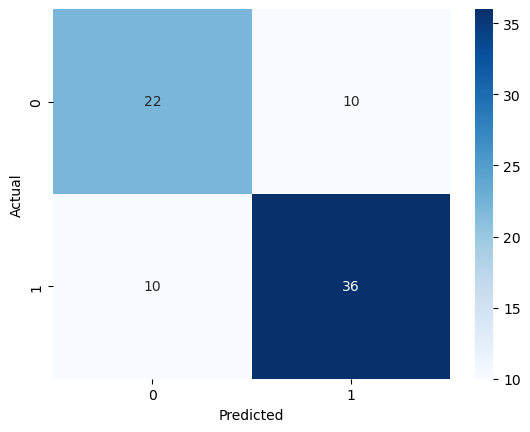


ROC AUC score: 0.74
best params:  {'ccp_alpha': 0, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.84       0.78       32        
1          0.88       0.78       0.83       46        
macro avg  0.80       0.81       0.81       78        
weighted avg 0.82       0.81       0.81       78        

Confusion matrix:

[[27  5]
 [10 36]]


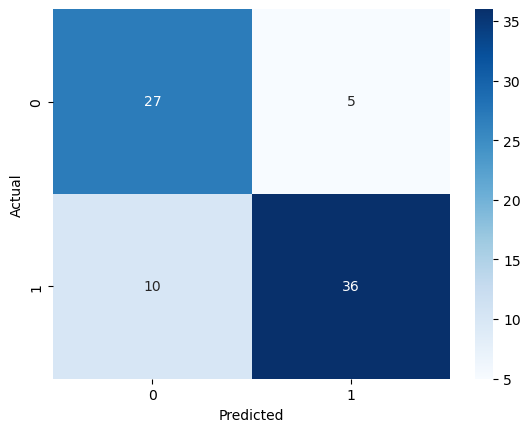


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.68       0.74       37        
1          0.74       0.85       0.80       41        
macro avg  0.78       0.76       0.77       78        
weighted avg 0.77       0.77       0.77       78        

Confusion matrix:

[[25 12]
 [ 6 35]]


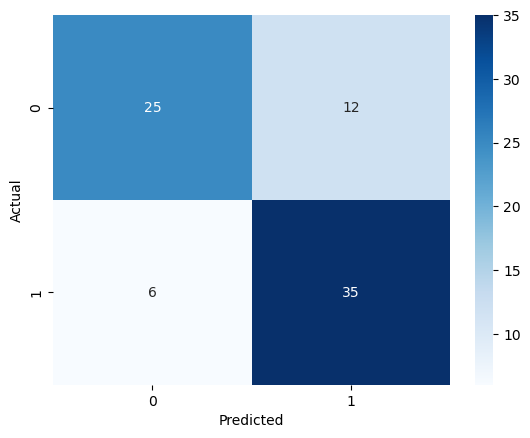


ROC AUC score: 0.76
best params:  {'ccp_alpha': 0.001, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.87       0.70       0.78       37        
1          0.77       0.90       0.83       41        
macro avg  0.82       0.80       0.80       78        
weighted avg 0.82       0.81       0.81       78        

Confusion matrix:

[[26 11]
 [ 4 37]]


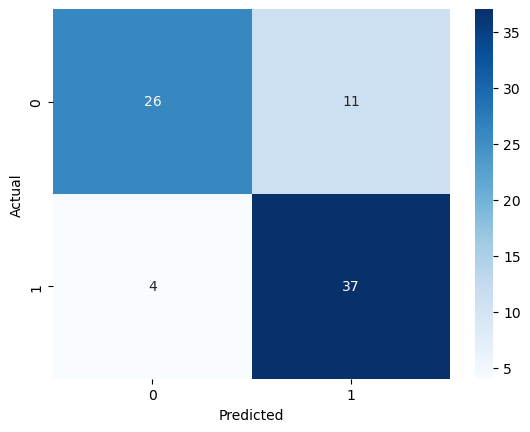


ROC AUC score: 0.80
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.90       0.80       0.85       35        
1          0.85       0.93       0.89       43        
macro avg  0.88       0.87       0.87       78        
weighted avg 0.87       0.87       0.87       78        

Confusion matrix:

[[28  7]
 [ 3 40]]


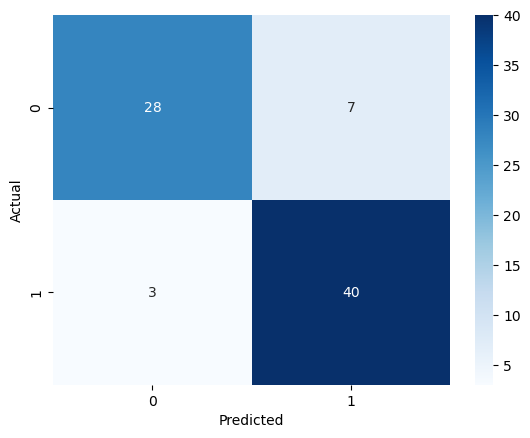


ROC AUC score: 0.87
best params:  {'ccp_alpha': 0.001, 'min_impurity_decrease': 0}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.88       0.86       0.87       35        
1          0.89       0.91       0.90       43        
macro avg  0.88       0.88       0.88       78        
weighted avg 0.88       0.88       0.88       78        

Confusion matrix:

[[30  5]
 [ 4 39]]


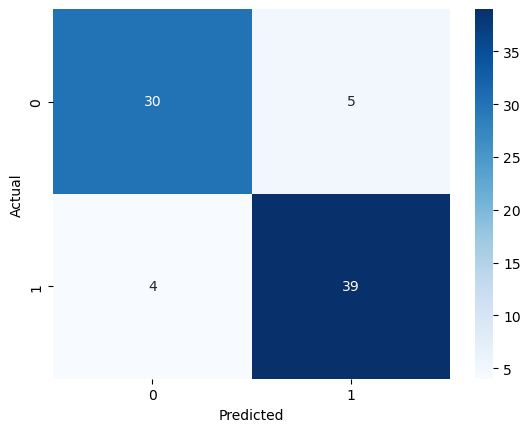


ROC AUC score: 0.88
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.73       0.89       0.80       36        
1          0.88       0.71       0.79       42        
macro avg  0.80       0.80       0.79       78        
weighted avg 0.81       0.79       0.79       78        

Confusion matrix:

[[32  4]
 [12 30]]


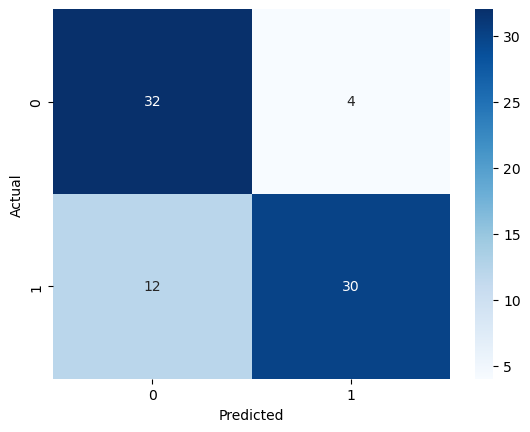


ROC AUC score: 0.80
best params:  {'ccp_alpha': 0.001, 'min_impurity_decrease': 0.001}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.86       0.84       36        
1          0.88       0.83       0.85       42        
macro avg  0.85       0.85       0.85       78        
weighted avg 0.85       0.85       0.85       78        

Confusion matrix:

[[31  5]
 [ 7 35]]


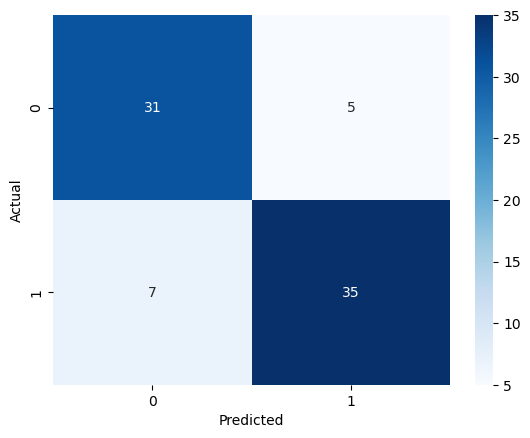


ROC AUC score: 0.85
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7742
Negative F1-score: 0.7726
Positive Recall: 0.7838
Negative Recall: 0.7671
Positive Precision: 0.7719
Negative Precision: 0.7851
Accuracy: 0.7763
ROC AUC Score: 0.7755


In [52]:
rf_model = RandomForestClassifier(n_estimators=20, ccp_alpha = 0.01, class_weight = "balanced")
param_range_map = {
"ccp_alpha": alpha_range,
"min_impurity_decrease":min_impurity_decrease
}
grid_search = sk.model_selection.GridSearchCV(rf_model,param_range_map)
training_util(rf_model, tree_all_features, label, grid_search=grid_search,tree=True, 
              feature_imp=False, show_result=True, show_avg=True)

### Analysis and conclusion

<ul>
    <li>The best params combinations that we get from this for <b>ccp_alpha</b> is 0 - 0.001 and for <b>min_impurity_decrease</b> is 0 - 0.001, so this will be the value that we will be using from now.</li>
</ul>

---
#### 2. Tune min_samples_split and min_samples_leaf


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.78       0.78       40        
1          0.77       0.77       0.77       39        
macro avg  0.77       0.77       0.77       79        
weighted avg 0.77       0.77       0.77       79        

Confusion matrix:

[[31  9]
 [ 9 30]]


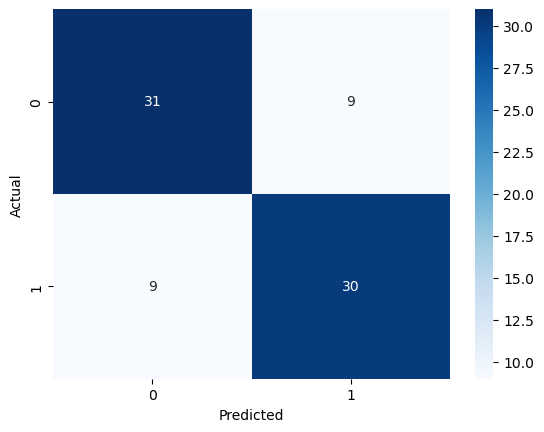


ROC AUC score: 0.77
best params:  {'min_samples_leaf': 0.01, 'min_samples_split': 2}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.78       0.79       40        
1          0.78       0.82       0.80       39        
macro avg  0.80       0.80       0.80       79        
weighted avg 0.80       0.80       0.80       79        

Confusion matrix:

[[31  9]
 [ 7 32]]


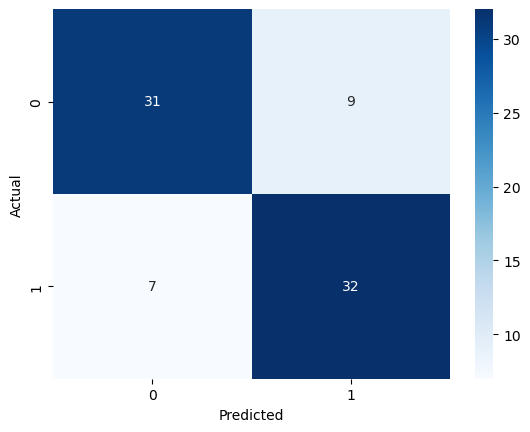


ROC AUC score: 0.80
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.80       0.80       40        
1          0.79       0.79       0.79       39        
macro avg  0.80       0.80       0.80       79        
weighted avg 0.80       0.80       0.80       79        

Confusion matrix:

[[32  8]
 [ 8 31]]


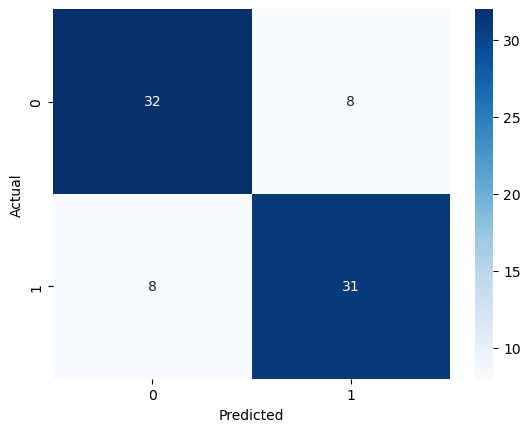


ROC AUC score: 0.80
best params:  {'min_samples_leaf': 1, 'min_samples_split': 0.01}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.84       0.80       0.82       40        
1          0.80       0.85       0.83       39        
macro avg  0.82       0.82       0.82       79        
weighted avg 0.82       0.82       0.82       79        

Confusion matrix:

[[32  8]
 [ 6 33]]


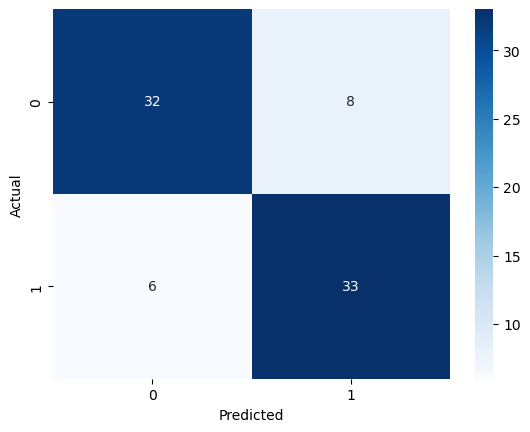


ROC AUC score: 0.82
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.89       0.76       0.82       42        
1          0.76       0.89       0.82       36        
macro avg  0.83       0.83       0.82       78        
weighted avg 0.83       0.82       0.82       78        

Confusion matrix:

[[32 10]
 [ 4 32]]


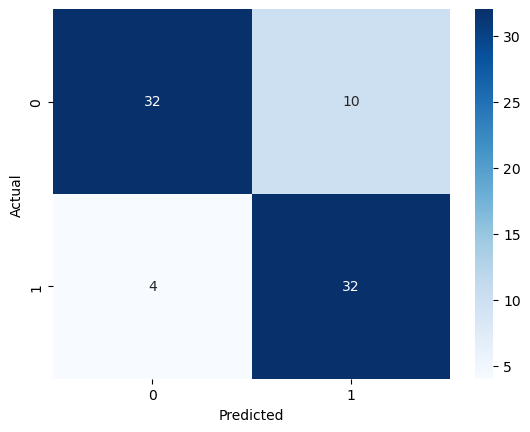


ROC AUC score: 0.83
best params:  {'min_samples_leaf': 1, 'min_samples_split': 2}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.87       0.81       0.84       42        
1          0.79       0.86       0.83       36        
macro avg  0.83       0.84       0.83       78        
weighted avg 0.84       0.83       0.83       78        

Confusion matrix:

[[34  8]
 [ 5 31]]


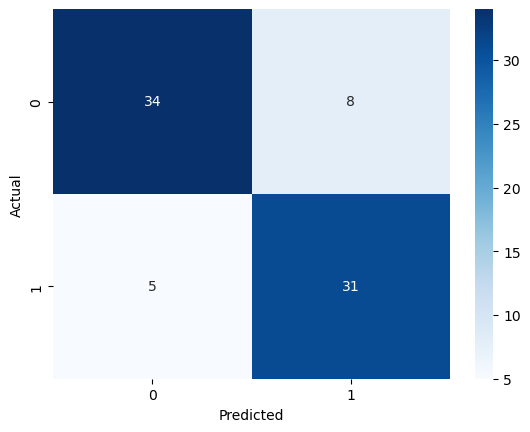


ROC AUC score: 0.84
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.74       0.75       34        
1          0.80       0.82       0.81       44        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[25  9]
 [ 8 36]]


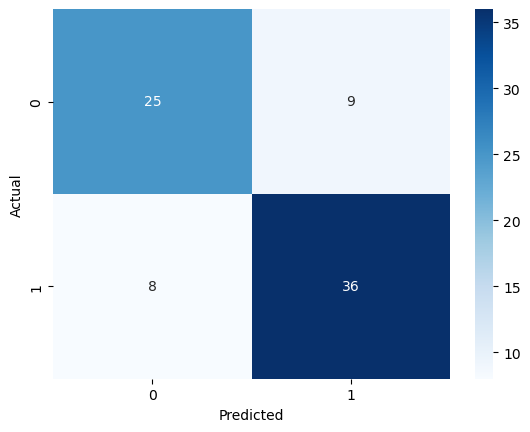


ROC AUC score: 0.78
best params:  {'min_samples_leaf': 1, 'min_samples_split': 5}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.76       0.76       34        
1          0.82       0.82       0.82       44        
macro avg  0.79       0.79       0.79       78        
weighted avg 0.79       0.79       0.79       78        

Confusion matrix:

[[26  8]
 [ 8 36]]


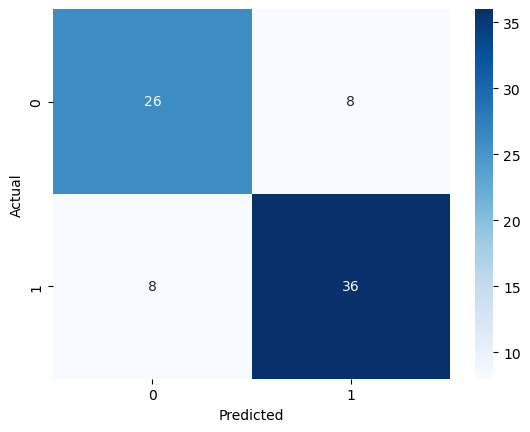


ROC AUC score: 0.79
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.76       0.78       38        
1          0.79       0.82       0.80       40        
macro avg  0.80       0.79       0.79       78        
weighted avg 0.80       0.79       0.79       78        

Confusion matrix:

[[29  9]
 [ 7 33]]


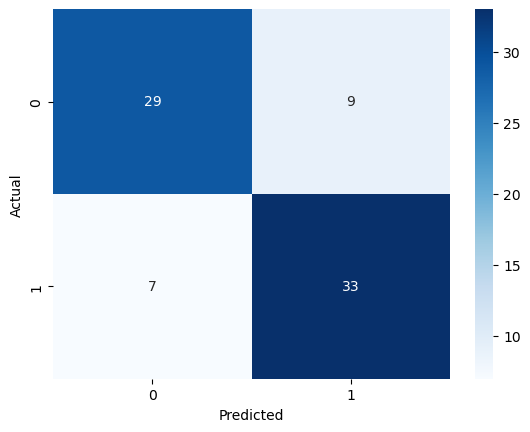


ROC AUC score: 0.79
best params:  {'min_samples_leaf': 2, 'min_samples_split': 2}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.90       0.74       0.81       38        
1          0.79       0.93       0.85       40        
macro avg  0.85       0.83       0.83       78        
weighted avg 0.84       0.83       0.83       78        

Confusion matrix:

[[28 10]
 [ 3 37]]


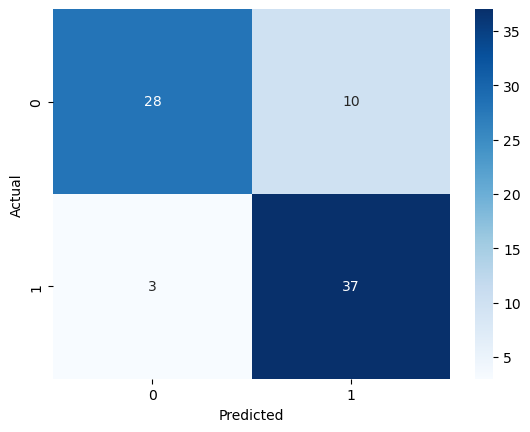


ROC AUC score: 0.83
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.88       0.71       0.78       41        
1          0.73       0.89       0.80       37        
macro avg  0.81       0.80       0.79       78        
weighted avg 0.81       0.79       0.79       78        

Confusion matrix:

[[29 12]
 [ 4 33]]


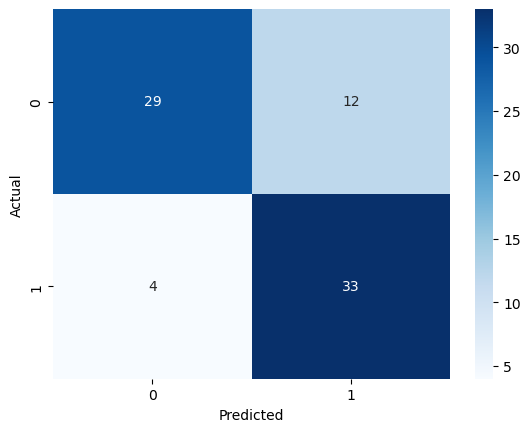


ROC AUC score: 0.80
best params:  {'min_samples_leaf': 1, 'min_samples_split': 0.01}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.71       0.76       41        
1          0.72       0.84       0.77       37        
macro avg  0.77       0.77       0.77       78        
weighted avg 0.78       0.77       0.77       78        

Confusion matrix:

[[29 12]
 [ 6 31]]


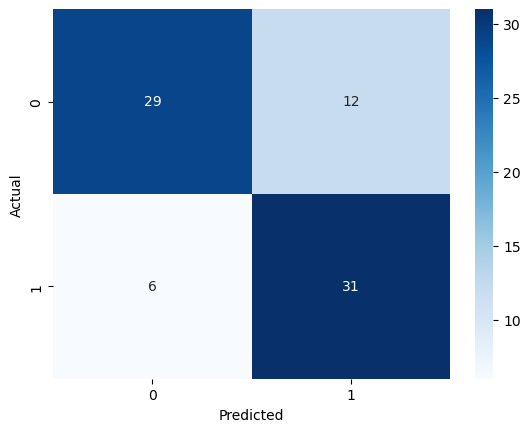


ROC AUC score: 0.77
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.88       0.80       42        
1          0.82       0.64       0.72       36        
macro avg  0.78       0.76       0.76       78        
weighted avg 0.78       0.77       0.76       78        

Confusion matrix:

[[37  5]
 [13 23]]


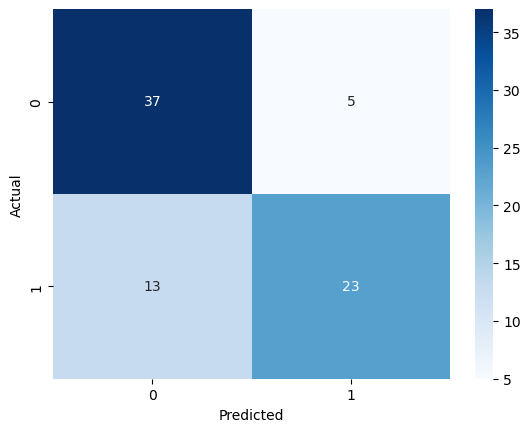


ROC AUC score: 0.76
best params:  {'min_samples_leaf': 1, 'min_samples_split': 5}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.74       0.88       0.80       42        
1          0.82       0.64       0.72       36        
macro avg  0.78       0.76       0.76       78        
weighted avg 0.78       0.77       0.76       78        

Confusion matrix:

[[37  5]
 [13 23]]


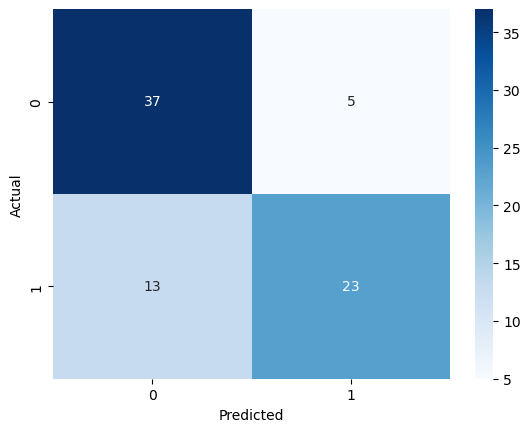


ROC AUC score: 0.76
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.76       0.77       37        
1          0.79       0.80       0.80       41        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[28  9]
 [ 8 33]]


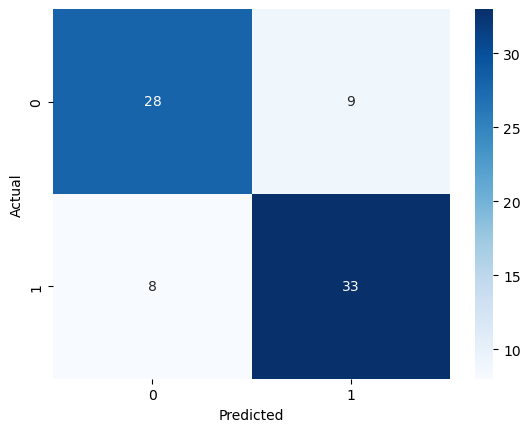


ROC AUC score: 0.78
best params:  {'min_samples_leaf': 1, 'min_samples_split': 2}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.78       0.77       37        
1          0.80       0.78       0.79       41        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[29  8]
 [ 9 32]]


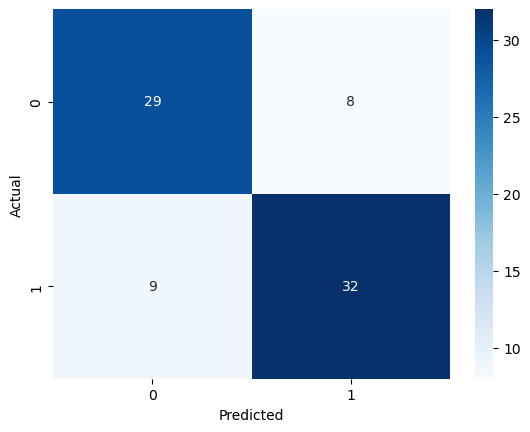


ROC AUC score: 0.78
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.82       0.77       0.80       43        
1          0.74       0.80       0.77       35        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.79       0.78       0.78       78        

Confusion matrix:

[[33 10]
 [ 7 28]]


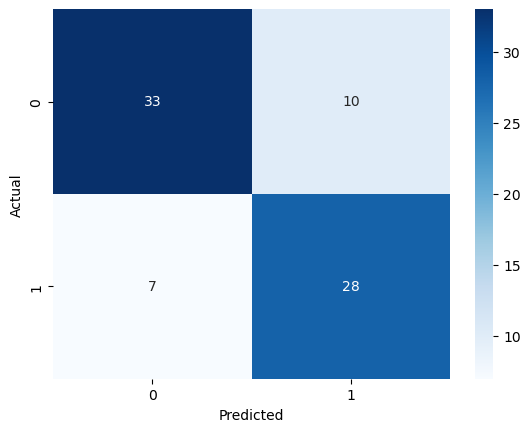


ROC AUC score: 0.78
best params:  {'min_samples_leaf': 1, 'min_samples_split': 2}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.87       0.77       0.81       43        
1          0.75       0.86       0.80       35        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.82       0.81       0.81       78        

Confusion matrix:

[[33 10]
 [ 5 30]]


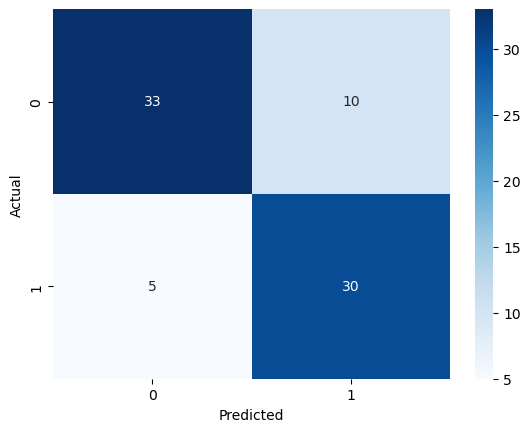


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.82       0.81       34        
1          0.86       0.84       0.85       44        
macro avg  0.83       0.83       0.83       78        
weighted avg 0.83       0.83       0.83       78        

Confusion matrix:

[[28  6]
 [ 7 37]]


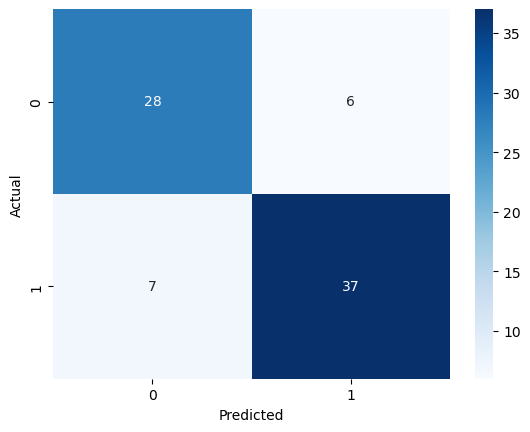


ROC AUC score: 0.83
best params:  {'min_samples_leaf': 2, 'min_samples_split': 10}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.74       0.72       34        
1          0.79       0.77       0.78       44        
macro avg  0.75       0.75       0.75       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[25  9]
 [10 34]]


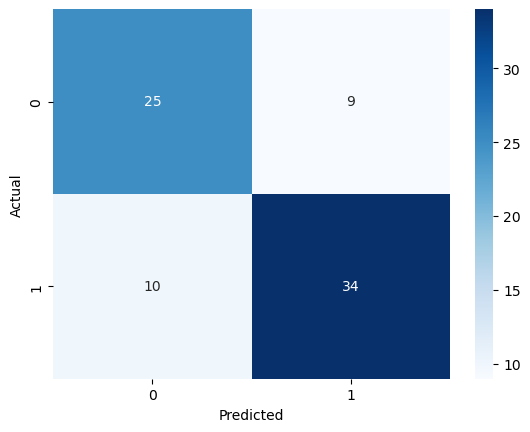


ROC AUC score: 0.75
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.7935
Negative F1-score: 0.7888
Positive Recall: 0.8073
Negative Recall: 0.7771
Positive Precision: 0.7850
Negative Precision: 0.8049
Accuracy: 0.7929
ROC AUC Score: 0.7922


In [49]:
rf_model = RandomForestClassifier(n_estimators=20, ccp_alpha = 0.001, min_impurity_decrease=0.001, class_weight = "balanced")
param_range_map = {
"min_samples_split": min_samples_split,
"min_samples_leaf": min_samples_leaf
}
grid_search = sk.model_selection.GridSearchCV(rf_model,param_range_map, 
                                              scoring=["f1", "precision", "recall", "accuracy"], refit="f1")

training_util(rf_model, tree_all_features, label, tree=True, grid_search=grid_search, 
              feature_imp=False, show_result=True, show_avg=True)

## Analysis and conclusion

Overall, the majority of the tweaked models outperformed the default model in some or all measures (since it also trying to balance out recall - precision to maximize F1).
The most advised parameter combinations are **min_samples_leaf** at 0.01 to 1 and **min_samples_split** at 0.01 to 5, which are the values to be utilized.

---
#### 3. Tune max_depth


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.84       0.78       0.81       40        
1          0.79       0.85       0.81       39        
macro avg  0.81       0.81       0.81       79        
weighted avg 0.81       0.81       0.81       79        

Confusion matrix:

[[31  9]
 [ 6 33]]


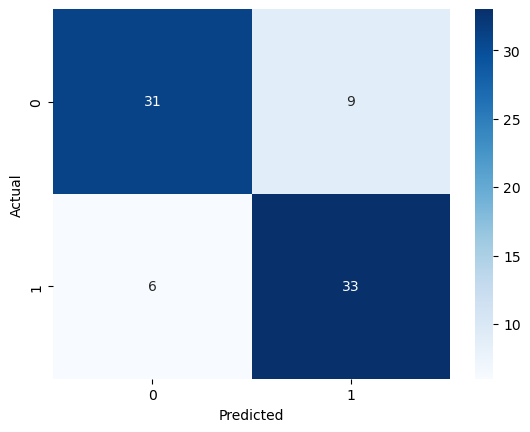


ROC AUC score: 0.81
best params:  {'max_depth': 97}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.75       0.78       40        
1          0.76       0.82       0.79       39        
macro avg  0.79       0.79       0.78       79        
weighted avg 0.79       0.78       0.78       79        

Confusion matrix:

[[30 10]
 [ 7 32]]


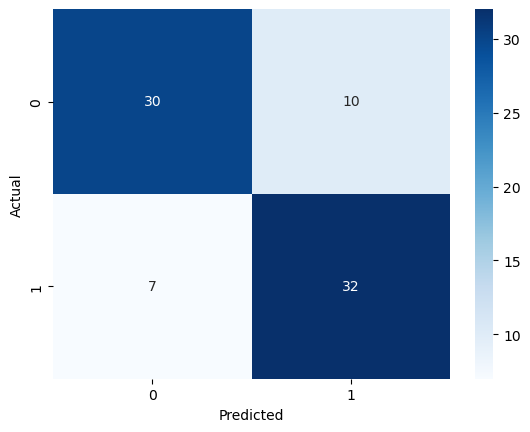


ROC AUC score: 0.79
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.71       0.71       0.71       38        
1          0.73       0.73       0.73       41        
macro avg  0.72       0.72       0.72       79        
weighted avg 0.72       0.72       0.72       79        

Confusion matrix:

[[27 11]
 [11 30]]


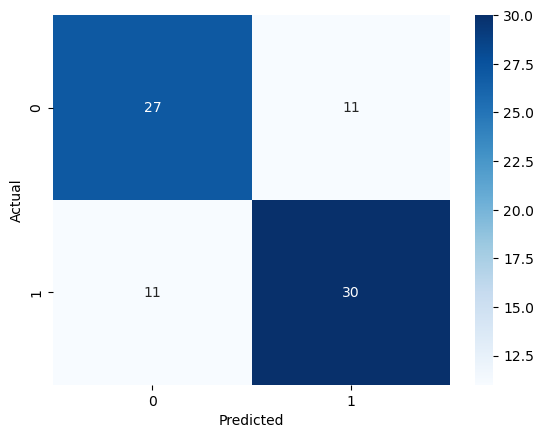


ROC AUC score: 0.72
best params:  {'max_depth': 67}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.72       0.68       0.70       38        
1          0.72       0.76       0.74       41        
macro avg  0.72       0.72       0.72       79        
weighted avg 0.72       0.72       0.72       79        

Confusion matrix:

[[26 12]
 [10 31]]


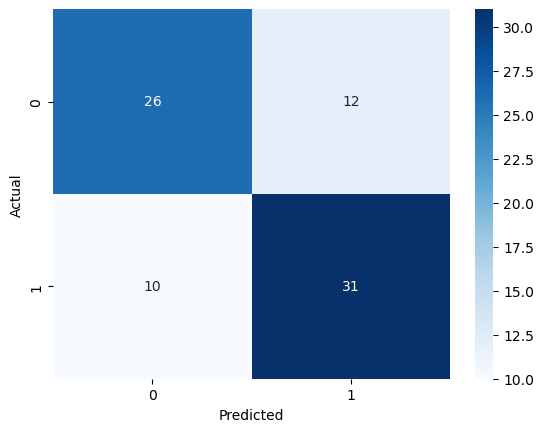


ROC AUC score: 0.72
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.88       0.83       34        
1          0.90       0.82       0.86       44        
macro avg  0.84       0.85       0.85       78        
weighted avg 0.85       0.85       0.85       78        

Confusion matrix:

[[30  4]
 [ 8 36]]


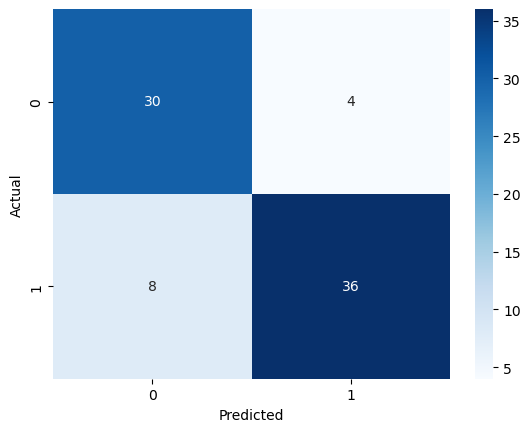


ROC AUC score: 0.85
best params:  {'max_depth': 16}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.82       0.80       34        
1          0.86       0.82       0.84       44        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.82       0.82       0.82       78        

Confusion matrix:

[[28  6]
 [ 8 36]]


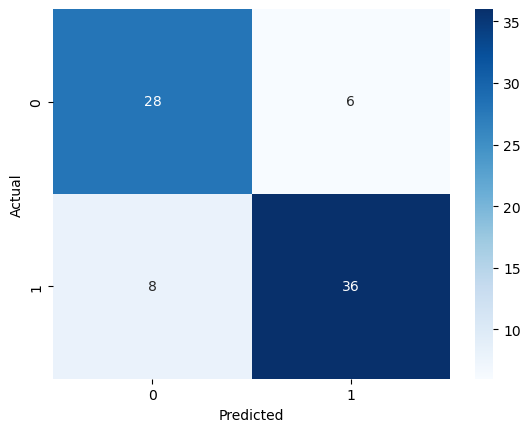


ROC AUC score: 0.82
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.88       0.76       0.81       37        
1          0.80       0.90       0.85       41        
macro avg  0.84       0.83       0.83       78        
weighted avg 0.84       0.83       0.83       78        

Confusion matrix:

[[28  9]
 [ 4 37]]


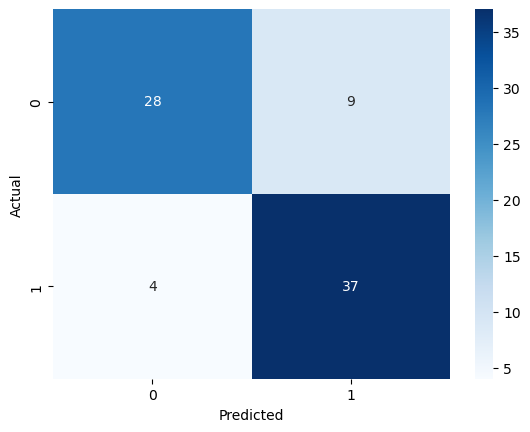


ROC AUC score: 0.83
best params:  {'max_depth': 32}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.84       0.73       0.78       37        
1          0.78       0.88       0.83       41        
macro avg  0.81       0.80       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[27 10]
 [ 5 36]]


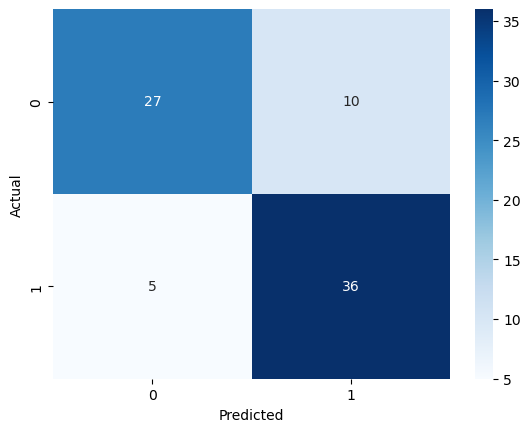


ROC AUC score: 0.80
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.85       0.88       0.86       40        
1          0.86       0.84       0.85       38        
macro avg  0.86       0.86       0.86       78        
weighted avg 0.86       0.86       0.86       78        

Confusion matrix:

[[35  5]
 [ 6 32]]


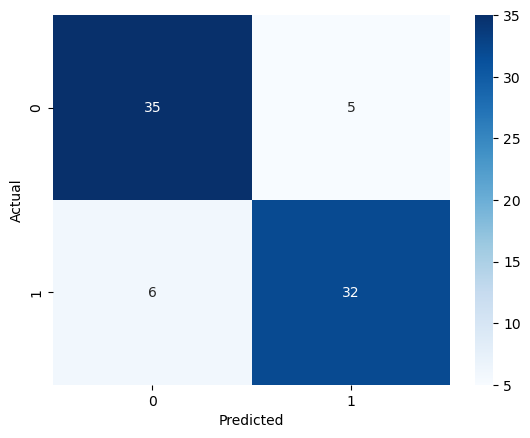


ROC AUC score: 0.86
best params:  {'max_depth': 33}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.78       0.78       40        
1          0.77       0.79       0.78       38        
macro avg  0.78       0.78       0.78       78        
weighted avg 0.78       0.78       0.78       78        

Confusion matrix:

[[31  9]
 [ 8 30]]


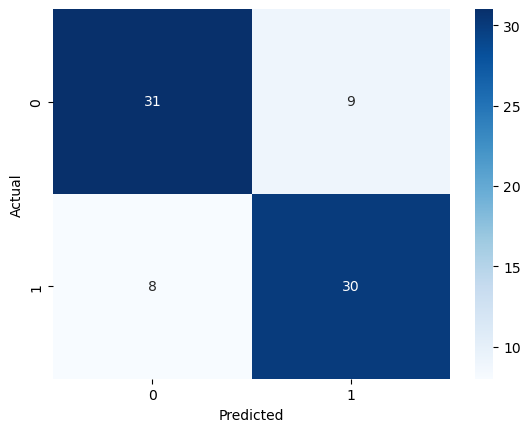


ROC AUC score: 0.78
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.83       0.83       41        
1          0.81       0.81       0.81       37        
macro avg  0.82       0.82       0.82       78        
weighted avg 0.82       0.82       0.82       78        

Confusion matrix:

[[34  7]
 [ 7 30]]


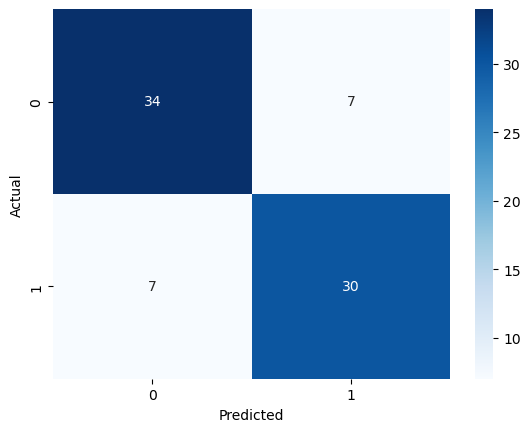


ROC AUC score: 0.82
best params:  {'max_depth': 28}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.83       0.82       41        
1          0.81       0.78       0.79       37        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[34  7]
 [ 8 29]]


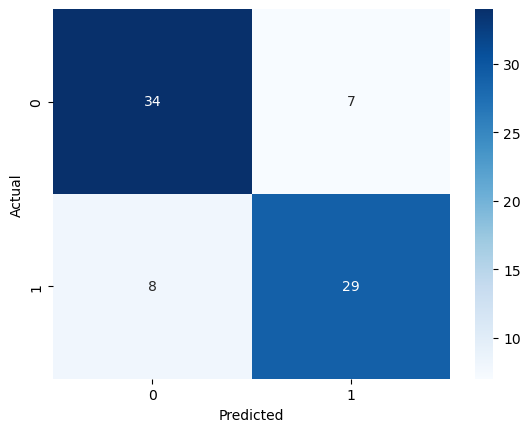


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.79       0.82       0.81       38        
1          0.82       0.80       0.81       40        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[31  7]
 [ 8 32]]


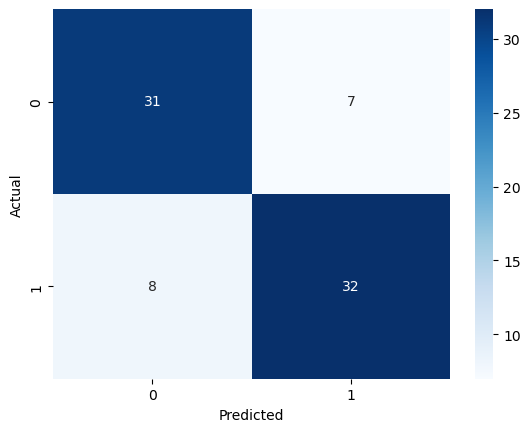


ROC AUC score: 0.81
best params:  {'max_depth': 32}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.85       0.74       0.79       38        
1          0.78       0.88       0.82       40        
macro avg  0.81       0.81       0.81       78        
weighted avg 0.81       0.81       0.81       78        

Confusion matrix:

[[28 10]
 [ 5 35]]


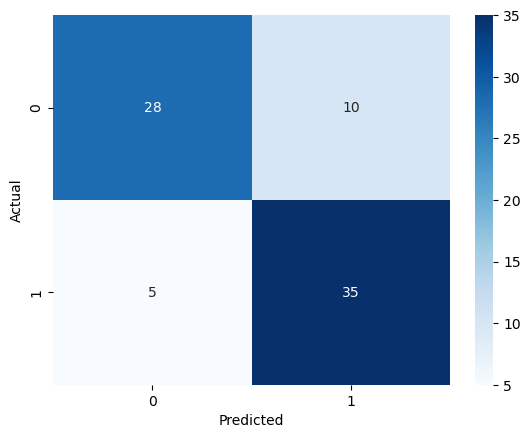


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.80       0.78       35        
1          0.83       0.79       0.81       43        
macro avg  0.79       0.80       0.79       78        
weighted avg 0.80       0.79       0.80       78        

Confusion matrix:

[[28  7]
 [ 9 34]]


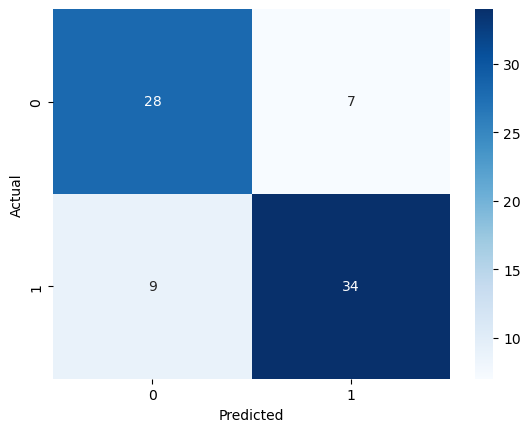


ROC AUC score: 0.80
best params:  {'max_depth': 45}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.69       0.75       35        
1          0.78       0.88       0.83       43        
macro avg  0.80       0.78       0.79       78        
weighted avg 0.80       0.79       0.79       78        

Confusion matrix:

[[24 11]
 [ 5 38]]


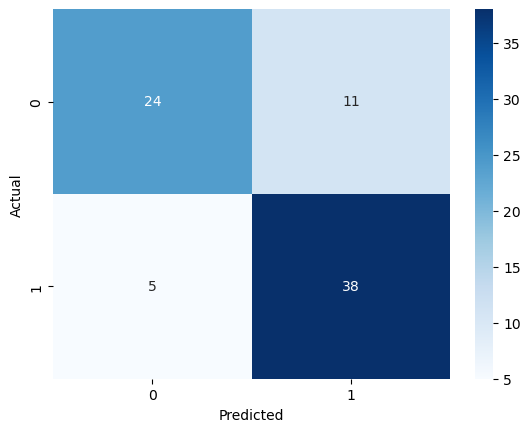


ROC AUC score: 0.78
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.90       0.83       0.86       42        
1          0.82       0.89       0.85       36        
macro avg  0.86       0.86       0.86       78        
weighted avg 0.86       0.86       0.86       78        

Confusion matrix:

[[35  7]
 [ 4 32]]


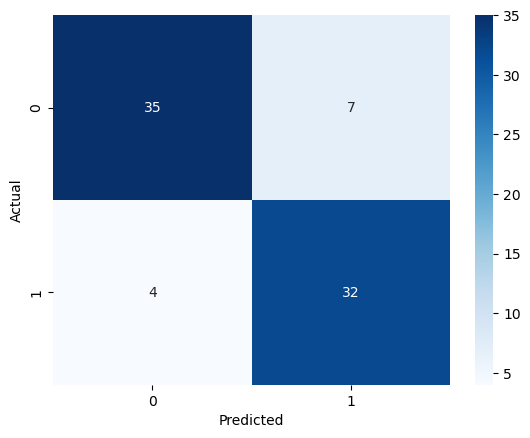


ROC AUC score: 0.86
best params:  {'max_depth': 97}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.86       0.71       0.78       42        
1          0.72       0.86       0.78       36        
macro avg  0.79       0.79       0.78       78        
weighted avg 0.79       0.78       0.78       78        

Confusion matrix:

[[30 12]
 [ 5 31]]


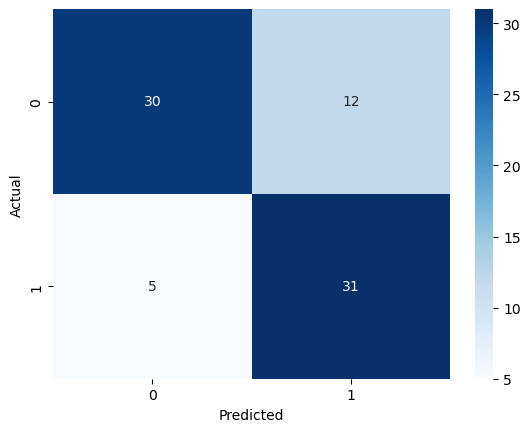


ROC AUC score: 0.79
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.78       0.76       0.77       46        
1          0.67       0.69       0.68       32        
macro avg  0.72       0.72       0.72       78        
weighted avg 0.73       0.73       0.73       78        

Confusion matrix:

[[35 11]
 [10 22]]


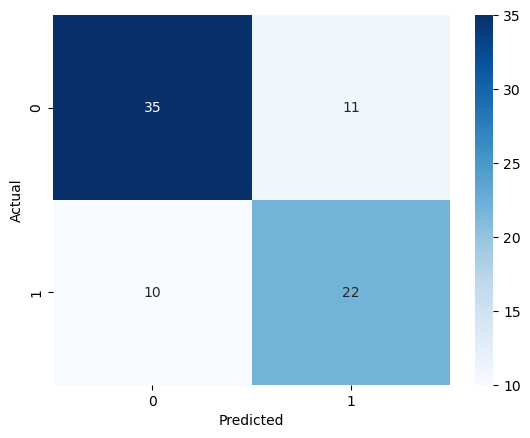


ROC AUC score: 0.72
best params:  {'max_depth': 47}

Result of optimized model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.80       0.78       0.79       46        
1          0.70       0.72       0.71       32        
macro avg  0.75       0.75       0.75       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[36 10]
 [ 9 23]]


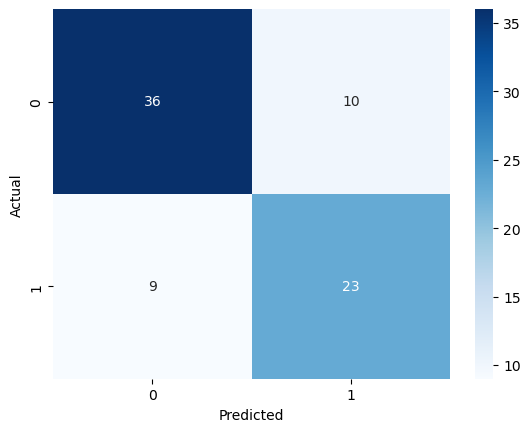


ROC AUC score: 0.75
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.8068
Negative F1-score: 0.8071
Positive Recall: 0.8118
Negative Recall: 0.8039
Positive Precision: 0.8034
Negative Precision: 0.8123
Accuracy: 0.8083
ROC AUC Score: 0.8079


In [53]:
rf_model = RandomForestClassifier(n_estimators=20, ccp_alpha = 0.001, min_impurity_decrease=0.001, min_samples_leaf=1, 
                                  min_samples_split = 5, class_weight = "balanced")
param_range_map = {
"max_depth":max_depth
}
grid_search = sk.model_selection.GridSearchCV(rf_model,param_range_map)
training_util(rf_model, tree_all_features, label, grid_search=grid_search, tree=True, 
              feature_imp=False, show_result=True, show_avg=True)

## Analysis and conclusion

Overall, the modification in **max_depth** has no impact because there is little to no difference between the tuned and un-tuned models. However, we will take the average of 10 folds which is **49**.

---
#### 4. Choose n_estimators

In order to achieve a balance between computational cost and model performance, a suitable value for **n_estimators** is selected. Unlike other parameters, there is no pre-determined range of values to use for Grid Search. Therefore, a traditional technique involving the use of a graph is utilized to show the correlation between **n_estimators** and the score. This helps in selecting an optimal value for **n_estimators**.

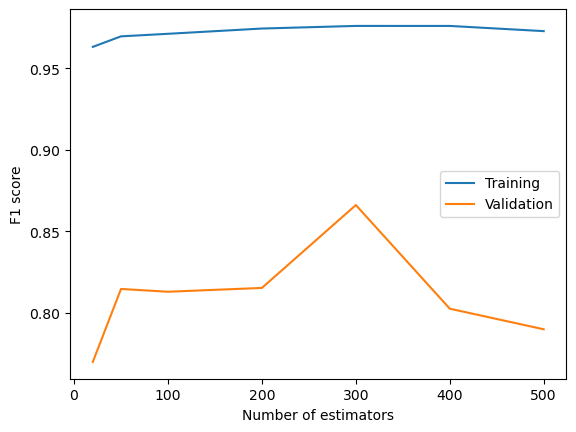

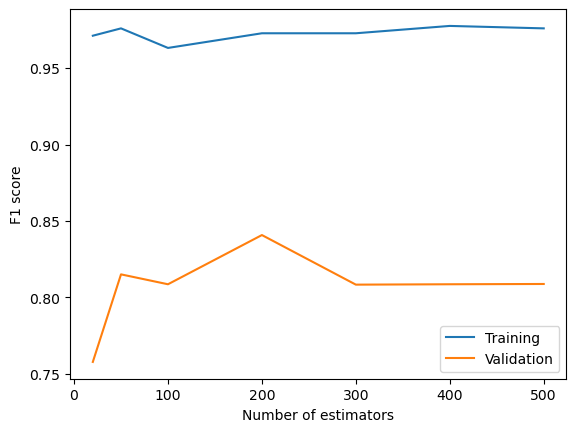

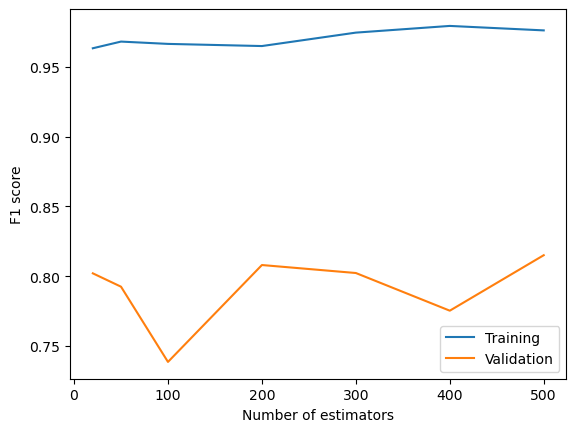

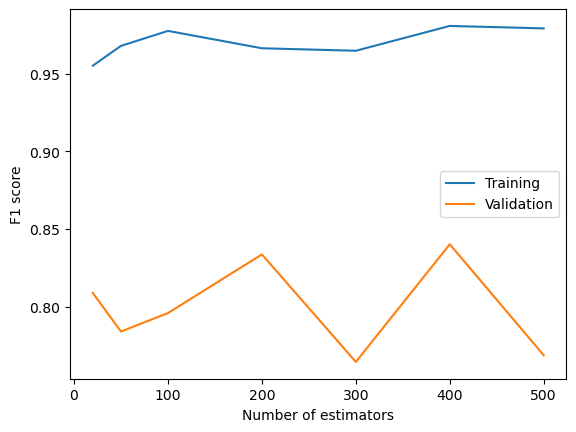

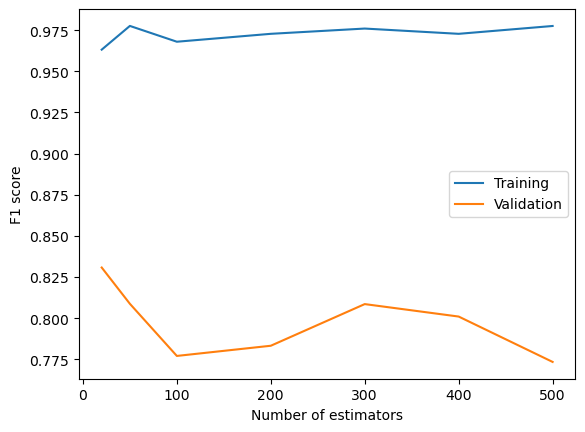

In [56]:
#draw 5 graphs for good measure
for i in range(5): 
    
    # Define n_estimators range
    n_estimators = [20, 50, 100, 200, 300, 400, 500]
    
    # create arrays for train and validation F1 scores
    train_f1 = np.zeros(len(n_estimators))
    val_f1 = np.zeros(len(n_estimators))
    
    for j, n in enumerate(n_estimators):
        # define model
        rf_model = RandomForestClassifier(n_estimators=n, ccp_alpha=0.001,
                                           class_weight="balanced", min_samples_leaf=1, 
                                           min_samples_split=5, min_impurity_decrease=0.001, 
                                           max_depth=49)
        # generate train and validate data
        x_train, x_val, y_train, y_val = sk.model_selection.train_test_split(tree_all_features, label, test_size=0.2)
        # feed data to model
        rf_model.fit(x_train, y_train)
        # predict using the train data and update F1 score in the array
        train_pred = rf_model.predict(x_train)
        train_f1[j] += f1_score(y_train, train_pred, average="macro")
        # predict using the validation data and update F1 score in the array
        val_pred = rf_model.predict(x_val)
        val_f1[j] += f1_score(y_val, val_pred, average="macro")

    # plot the results for this iteration
    plt.plot(n_estimators, train_f1, label='Training')
    plt.plot(n_estimators, val_f1, label='Validation')
    plt.ylabel("F1 score")
    plt.xlabel("Number of estimators")
    plt.legend()
    plt.show()

## Analysis and conclusion

For both the training and validation sets, the graphs depict the connection between the number of estimators and the F1 score. The graphs aid in determining the optimal number of estimators that result in the highest F1 score.

Despite the lack of an obvious pattern or correlation in any of the graphs, the F1 score for validation tends to range between **300** and **500**. The graphs show that the smallest number of estimators with the most consistent performance is **300**, hen this will be our choosen value.

---
#### 5. Final model evaluation

Finally, the model with all parameters from our experiments would be accessed via 10 folds.


>>FOLD 1/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.81       0.83       0.82       41        
1          0.81       0.79       0.80       38        
macro avg  0.81       0.81       0.81       79        
weighted avg 0.81       0.81       0.81       79        

Confusion matrix:

[[34  7]
 [ 8 30]]


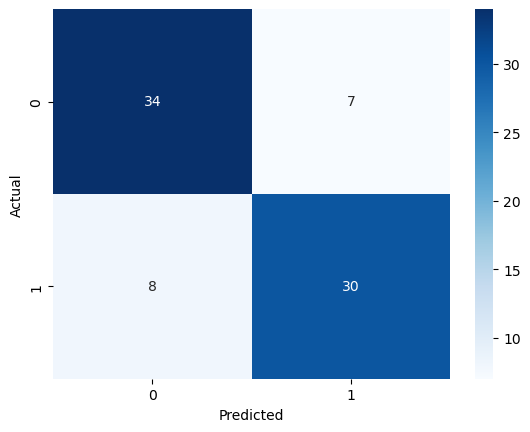


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 2/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.88       0.85       0.86       41        
1          0.85       0.87       0.86       38        
macro avg  0.86       0.86       0.86       79        
weighted avg 0.86       0.86       0.86       79        

Confusion matrix:

[[35  6]
 [ 5 33]]


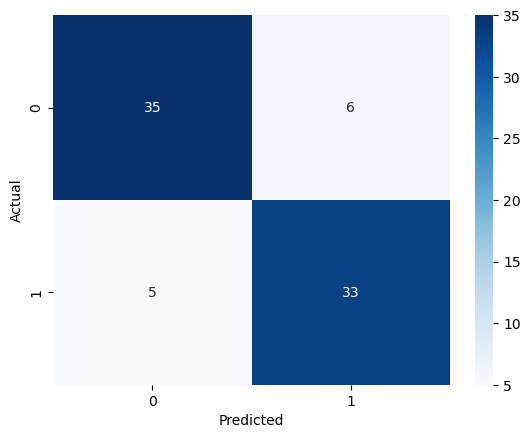


ROC AUC score: 0.86
------------------------------------------------------------

>>FOLD 3/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.90       0.76       0.82       49        
1          0.68       0.86       0.76       29        
macro avg  0.79       0.81       0.79       78        
weighted avg 0.82       0.79       0.80       78        

Confusion matrix:

[[37 12]
 [ 4 25]]


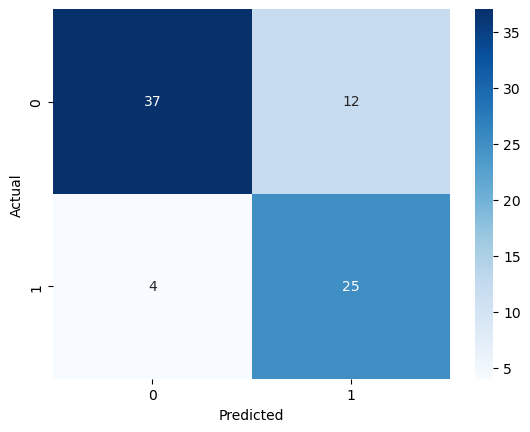


ROC AUC score: 0.81
------------------------------------------------------------

>>FOLD 4/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.81       0.78       36        
1          0.82       0.79       0.80       42        
macro avg  0.79       0.80       0.79       78        
weighted avg 0.80       0.79       0.80       78        

Confusion matrix:

[[29  7]
 [ 9 33]]


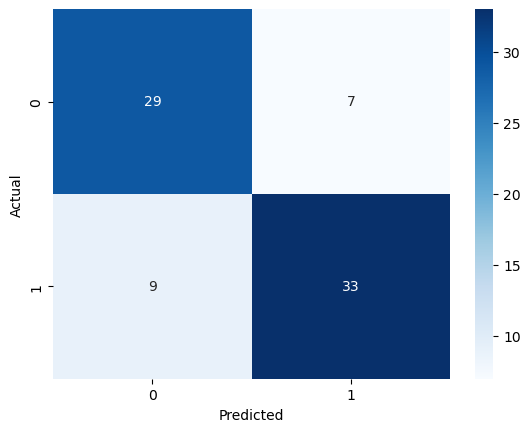


ROC AUC score: 0.80
------------------------------------------------------------

>>FOLD 5/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.70       0.76       0.73       34        
1          0.80       0.75       0.78       44        
macro avg  0.75       0.76       0.75       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[26  8]
 [11 33]]


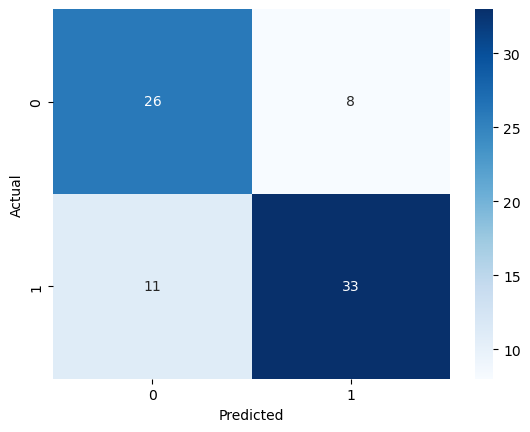


ROC AUC score: 0.76
------------------------------------------------------------

>>FOLD 6/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.85       0.67       0.75       43        
1          0.68       0.86       0.76       35        
macro avg  0.77       0.77       0.76       78        
weighted avg 0.78       0.76       0.76       78        

Confusion matrix:

[[29 14]
 [ 5 30]]


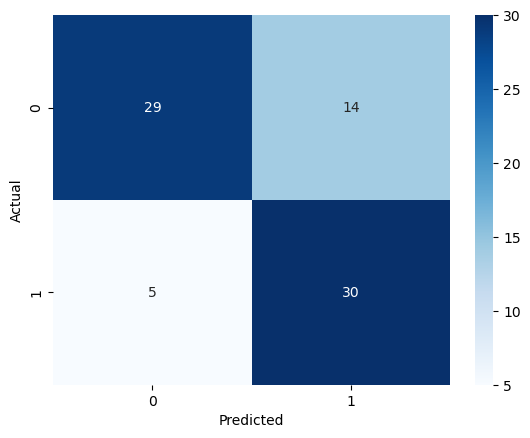


ROC AUC score: 0.77
------------------------------------------------------------

>>FOLD 7/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.83       0.81       0.82       31        
1          0.88       0.89       0.88       47        
macro avg  0.85       0.85       0.85       78        
weighted avg 0.86       0.86       0.86       78        

Confusion matrix:

[[25  6]
 [ 5 42]]


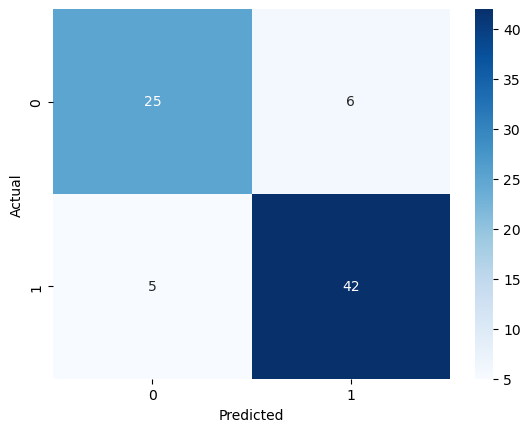


ROC AUC score: 0.85
------------------------------------------------------------

>>FOLD 8/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.76       0.78       0.77       41        
1          0.75       0.73       0.74       37        
macro avg  0.76       0.76       0.76       78        
weighted avg 0.76       0.76       0.76       78        

Confusion matrix:

[[32  9]
 [10 27]]


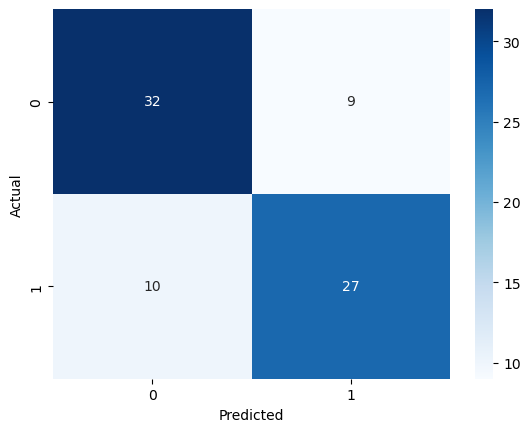


ROC AUC score: 0.76
------------------------------------------------------------

>>FOLD 9/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.92       0.85       0.88       39        
1          0.86       0.92       0.89       39        
macro avg  0.89       0.88       0.88       78        
weighted avg 0.89       0.88       0.88       78        

Confusion matrix:

[[33  6]
 [ 3 36]]


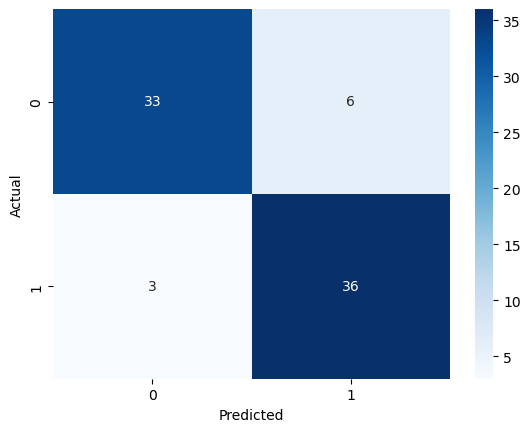


ROC AUC score: 0.88
------------------------------------------------------------

>>FOLD 10/10

Result of model
Classification report:

Label      Precision  Recall     F1-score   Support   
0          0.75       0.67       0.71       36        
1          0.74       0.81       0.77       42        
macro avg  0.74       0.74       0.74       78        
weighted avg 0.74       0.74       0.74       78        

Confusion matrix:

[[24 12]
 [ 8 34]]


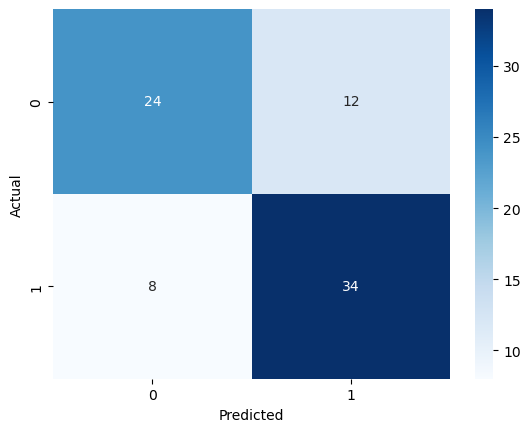


ROC AUC score: 0.74
------------------------------------------------------------
Completed validation

Average Result:
Positive F1-score: 0.8041
Negative F1-score: 0.7952
Positive Recall: 0.8269
Negative Recall: 0.7782
Positive Precision: 0.7866
Negative Precision: 0.8168
Accuracy: 0.8017
ROC AUC Score: 0.8026


Cross-validation scores: [0.73417722 0.86075949 0.67948718 0.66666667 0.78205128 0.88461538
 0.85897436 0.85897436 0.85897436 0.92307692]
Mean cross-validation score: 0.8107757221681272
Standard deviation of cross-validation scores: 0.08498710767380759


Cross-validation score: 0.81 +/- 0.08


In [130]:
final_rf_model = RandomForestClassifier(n_estimators=100, ccp_alpha=0.001,class_weight="balanced", min_samples_leaf=1, 
                                           min_samples_split=5, min_impurity_decrease=0.001, max_depth=49)

training_util(rf_model, tree_all_features, label, tree=True, feature_imp=False)

# perform cross-validation with 10 folds
scores = cross_val_score(final_rf_model, tree_all_features, label, cv=10)

# print the mean and standard deviation of the scores
print('\n')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())
print('\n')
print("Cross-validation score: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

---
### Ultimate Judgement and Analysis

#### Model Selection

The Random Forest model consistently outperformed the Logistic Regression model across all metrics, with notably higher averages. It also achieved a desirable outcome by minimizing False Negatives, and its ROC AUC and F1 scores were consistently high (around 80%), indicating a balance between positive and negative outcomes. Thus, the tuned Random Forest model was selected to predict the test set.

#### Advantages
<ul>
    <li>The final Random Forest model achieved a balance between Positive and Negative scores across all metrics.</li><br>
    <li>The precision for Negative and recall for Positive values, which were being maximized, were both over 80%, indicating that the model was not overfitting and could be used for unseen cases.</li><br>
    <li>The low False Negative values (high recall) and False Positive values (high precision) indicated that the Random Forest model was avoiding wrongly classifying a patient with Sepsis and not wasting resources, respectively.</li>
</ul>

#### Disadvantages
<ul>
    <li>The Random Forest model may not predict well with cases with higher Age, Plasma Glucose (PRG), Blood Work Result-2 (SK), Blood Work Result-3 (TS), and Blood Work Result-4 (BD2) due to several positively skewed features.</li><br>
</ul>

#### Future Improvements
Ultimately, every machine learning model can always be improved, and these are just a few potential areas for development in our model:

<ul>
    <li>Feature engineering: The present model made advantage of all accessible features with little to no feature engineering. In-depth examination may result in more effective feature selection or feature engineering strategies.</li><br>
    <li>Handling unbalanced data: Although the model uses class weight="balanced" to handle imbalanced data, alternative strategies like as oversampling or undersampling might potentially improve the model's performance.</li><br>
    <li>While the present model was optimized using a grid search, alternative optimization strategies such as random search or Bayesian optimization might potentially produce superior results.
</li><br>
    <li>Ensemble methods: Rather than depending on a single model, integrating numerous models using approaches like bagging, boosting, or stacking may result in more accurate predictions.
</li><br>
    <li>Domain-specific knowledge: Further domain-specific knowledge might aid in feature selection or model selection. Other datasets or medical literature might also be utilized to enhance the existing data and perhaps increase the accuracy of the model.
</li><br>
</ul>

---
## V - PREDICTING USING THE FINALIZED MODEL

### Test data preprocessing

Simularly to what we did for the Training data, the test data would be preprocessed in the same way.

In [133]:
# load test data_set
patient_test_df = pd.read_csv("Paitients_Files_Test.csv", delimiter=",")
# Drop Id and Insurrance
patient_test_df.drop(labels=["ID", "Insurance"], axis=1, inplace=True)
# print to make sure irrelevant columns is removed
patient_test_df.head(10)

PRG   PL  PR  SK   TS   M11    BD2  Age
0    1  109  38  18  120  23.1  0.407   26
1    1  108  88  19    0  27.1  0.400   24
2    6   96   0   0    0  23.7  0.190   28
3    1  124  74  36    0  27.8  0.100   30
4    7  150  78  29  126  35.2  0.692   54
5    4  183   0   0    0  28.4  0.212   36
6    1  124  60  32    0  35.8  0.514   21
7    1  181  78  42  293  40.0  1.258   22
8    1   92  62  25   41  19.5  0.482   25
9    0  152  82  39  272  41.5  0.270   27

### Predict with the finalized model

In [131]:
# Fit with train values
final_rf_model.fit(tree_all_features, label)

# Replace M11 0 values with mean
patient_test_df.replace(to_replace={'M11': 0}, value=patient_test_df["M11"].mean(), inplace=True)

# Predict
prediction = final_rf_model.predict(patient_test_df.to_numpy())

# Print number of positive and negative
print("Negative patients: ", (prediction==0).sum())
print("Positive patients: ", (prediction==1).sum())

Negative patients:  104
Positive patients:  65


### Save the predicted result

In [132]:
# Get the dataframe to add prediction
result_frame = pd.read_csv("S3927460_predictions.csv", delimiter=",")

# Update prediction column
result_frame["Sepssis"] = prediction

# Replace 0 and 1 with Negative and Positive
result_frame.replace(to_replace={'Sepssis': 0}, value='Negative', inplace=True)
result_frame.replace(to_replace={'Sepssis': 1}, value='Positive', inplace=True)

# Write to csv
result_frame.to_csv("S3927460_predictions.csv", sep=",", header=True , index =False)

---
## REFERENCES

[1] “Why is logistic regression particularly prone to overfitting in high dimensions?,” Cross Validated, Jun. 01, 2020. https://stats.stackexchange.com/questions/469799/why-is-logistic-regression-particularly-prone-to-overfitting-in-high-dimensions (accessed Apr. 12, 2023).

[2] K. Melcher, “Understanding Regularization for Logistic Regression | KNIME,” KNIME. https://www.knime.com/blog/regularization-for-logistic-regression-l1-l2-gauss-or-laplace (accessed Apr. 12, 2023).

[3] K. Pykes, “Fighting Overfitting With L1 or L2 Regularization: Which One Is Better? - neptune.ai,” neptune.ai, Jul. 22, 2022. https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization (accessed Apr. 12, 2023).

[4] “Post pruning decision trees with cost complexity pruning,” scikit-learn. https://scikit-learn/stable/auto_examples/tree/plot_cost_complexity_pruning.html (accessed Apr. 12, 2023).

[5] “Random Forest Hyperparameter Tuning in Python - GeeksforGeeks,” GeeksforGeeks, Dec. 28, 2022. https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/ (accessed Apr. 12, 2023).

[6]“2. Over-sampling — Version 0.10.1,” 2. Over-sampling — Version 0.10.1. https://imbalanced-learn.org/stable/over_sampling.html# (accessed Apr. 12, 2023).

[7] G. Malato, “Hyperparameter tuning. Grid search and random search | Your Data Teacher,” Your Data Teacher, May 19, 2021. https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/ (accessed Apr. 11, 2023).

[8] “sklearn.linear_model.LogisticRegression,” scikit-learn. https://scikit-learn/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (accessed Apr. 11, 2023).

[9] “sklearn.ensemble.RandomForestClassifier,” scikit-learn. https://scikit-learn/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (accessed Apr. 11, 2023).